<a href="https://colab.research.google.com/github/shamim-reja23/Ecg-Covid19-Classification/blob/main/ECG_Covid19_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import cv2
from tqdm import tqdm

# Input and output directories
input_dir = "drive/MyDrive/gwbz3fsgp8-1"
output_dir = "drive/MyDrive/pre-processed-data"
os.makedirs(output_dir, exist_ok=True)

# Preprocessing function
def preprocess_image(image_path, output_path, size=(224, 224)):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        print(f"Error: Unable to read image at {image_path}")
        return
    img = cv2.resize(img, size)  # Resize to fixed size
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    cv2.imwrite(output_path, img)  # Save preprocessed image

# Traverse all subfolders
for subfolder in os.listdir(input_dir):
    subfolder_path = os.path.join(input_dir, subfolder)
    if not os.path.isdir(subfolder_path):  # Skip non-folder items
        continue

    # Create corresponding output subfolder
    output_subfolder = os.path.join(output_dir, subfolder)
    os.makedirs(output_subfolder, exist_ok=True)

    # Process images in the subfolder
    for file_name in tqdm(os.listdir(subfolder_path), desc=f"Processing {subfolder}"):
        input_path = os.path.join(subfolder_path, file_name)
        output_path = os.path.join(output_subfolder, file_name)
        preprocess_image(input_path, output_path)


Processing ECG Images of Myocardial Infarction Patients (77): 100%|██████████| 74/74 [00:49<00:00,  1.51it/s]
Processing ECG Images of Patient that have abnormal heart beats (548): 100%|██████████| 546/546 [00:47<00:00, 11.47it/s]
Processing ECG Images of COVID-19 Patients (250): 100%|██████████| 250/250 [00:12<00:00, 20.57it/s]
Processing ECG Images of Patient that have History of MI (203): 100%|██████████| 203/203 [00:16<00:00, 12.52it/s]
Processing Normal Person ECG Images (859): 100%|██████████| 859/859 [02:29<00:00,  5.73it/s]


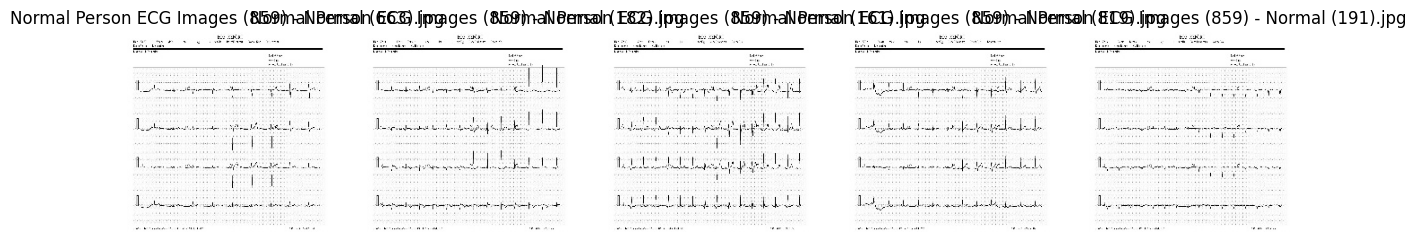

In [4]:
import matplotlib.pyplot as plt
import os
import random


# Function to display images from a class
def display_images_from_class(class_name, num_images=5):
    class_dir = os.path.join(output_dir, class_name)
    if not os.path.exists(class_dir):
        print(f"Class directory {class_dir} does not exist.")
        return

    # Get random images from the class directory
    image_files = random.sample(os.listdir(class_dir), min(num_images, len(os.listdir(class_dir))))

    plt.figure(figsize=(15, 5))
    for i, file_name in enumerate(image_files):
        img_path = os.path.join(class_dir, file_name)
        img = plt.imread(img_path)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap="gray")
        plt.title(f"{class_name} - {file_name}")
        plt.axis("off")

    plt.show()

# Example: Display images from the "Normal" class
display_images_from_class("Normal Person ECG Images (859)", num_images=5)


In [6]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from tqdm import tqdm
import os

# Load pretrained models
resnet_model = ResNet50(weights="imagenet", include_top=False, pooling="avg")
vgg16_model = VGG16(weights="imagenet", include_top=False, pooling="avg")

# Feature extraction function
def extract_features(model, image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()

# Collect valid image paths
image_paths = []
for root, _, files in os.walk(output_dir):
    for file_name in files:
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_paths.append(os.path.join(root, file_name))

# Extract features for all images
resnet_features = np.array([extract_features(resnet_model, path) for path in tqdm(image_paths, desc="ResNet Features")])
vgg16_features = np.array([extract_features(vgg16_model, path) for path in tqdm(image_paths, desc="VGG16 Features")])



ResNet Features:   0%|          | 0/1932 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step



ResNet Features:   0%|          | 1/1932 [00:02<1:26:46,  2.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:   0%|          | 2/1932 [00:02<40:15,  1.25s/it]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:   0%|          | 3/1932 [00:03<25:13,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:   0%|          | 4/1932 [00:03<18:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:   0%|          | 5/1932 [00:03<14:22,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:   0%|          | 6/1932 [00:03<11:58,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step



ResNet Features:   0%|          | 7/1932 [00:04<10:24,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:   0%|          | 8/1932 [00:04<09:23,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:   0%|          | 9/1932 [00:04<09:04,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:   1%|          | 10/1932 [00:04<08:39,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step



ResNet Features:   1%|          | 11/1932 [00:05<08:13,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:   1%|          | 12/1932 [00:05<08:00,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:   1%|          | 13/1932 [00:05<07:55,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:   1%|          | 14/1932 [00:05<07:49,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:   1%|          | 15/1932 [00:05<07:40,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:   1%|          | 16/1932 [00:06<07:36,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step



ResNet Features:   1%|          | 17/1932 [00:06<07:54,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:   1%|          | 18/1932 [00:06<07:45,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:   1%|          | 19/1932 [00:06<07:41,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step



ResNet Features:   1%|          | 20/1932 [00:07<09:00,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step



ResNet Features:   1%|          | 21/1932 [00:07<10:06,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step



ResNet Features:   1%|          | 22/1932 [00:08<10:42,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step



ResNet Features:   1%|          | 23/1932 [00:08<11:06,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step



ResNet Features:   1%|          | 24/1932 [00:08<11:24,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step



ResNet Features:   1%|▏         | 25/1932 [00:09<11:36,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step



ResNet Features:   1%|▏         | 26/1932 [00:09<11:46,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step



ResNet Features:   1%|▏         | 27/1932 [00:10<11:42,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step



ResNet Features:   1%|▏         | 28/1932 [00:10<11:44,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step



ResNet Features:   2%|▏         | 29/1932 [00:10<11:57,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step



ResNet Features:   2%|▏         | 30/1932 [00:11<12:12,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step



ResNet Features:   2%|▏         | 31/1932 [00:11<12:23,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step



ResNet Features:   2%|▏         | 32/1932 [00:11<12:27,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step



ResNet Features:   2%|▏         | 33/1932 [00:12<12:44,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step



ResNet Features:   2%|▏         | 34/1932 [00:12<13:00,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step



ResNet Features:   2%|▏         | 35/1932 [00:13<12:10,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:   2%|▏         | 36/1932 [00:13<10:44,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:   2%|▏         | 37/1932 [00:13<09:43,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step



ResNet Features:   2%|▏         | 38/1932 [00:13<09:11,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:   2%|▏         | 39/1932 [00:14<08:36,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:   2%|▏         | 40/1932 [00:14<08:13,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:   2%|▏         | 41/1932 [00:14<07:56,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:   2%|▏         | 42/1932 [00:14<07:46,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:   2%|▏         | 43/1932 [00:15<07:45,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:   2%|▏         | 44/1932 [00:15<07:39,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:   2%|▏         | 45/1932 [00:15<07:30,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:   2%|▏         | 46/1932 [00:15<07:31,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:   2%|▏         | 47/1932 [00:16<07:37,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:   2%|▏         | 48/1932 [00:16<07:33,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:   3%|▎         | 49/1932 [00:16<07:29,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:   3%|▎         | 50/1932 [00:16<07:26,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:   3%|▎         | 51/1932 [00:16<07:34,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:   3%|▎         | 52/1932 [00:17<07:30,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:   3%|▎         | 53/1932 [00:17<07:30,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:   3%|▎         | 54/1932 [00:17<07:28,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:   3%|▎         | 55/1932 [00:17<07:27,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:   3%|▎         | 56/1932 [00:18<07:34,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:   3%|▎         | 57/1932 [00:18<08:47,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:   3%|▎         | 58/1932 [00:18<08:24,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step



ResNet Features:   3%|▎         | 59/1932 [00:19<08:16,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:   3%|▎         | 60/1932 [00:19<08:03,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:   3%|▎         | 61/1932 [00:19<07:48,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:   3%|▎         | 62/1932 [00:19<07:40,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:   3%|▎         | 63/1932 [00:19<07:34,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:   3%|▎         | 64/1932 [00:20<07:33,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:   3%|▎         | 65/1932 [00:20<08:47,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:   3%|▎         | 66/1932 [00:20<08:18,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:   3%|▎         | 67/1932 [00:21<08:05,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:   4%|▎         | 68/1932 [00:21<07:48,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:   4%|▎         | 69/1932 [00:21<07:38,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:   4%|▎         | 70/1932 [00:21<07:33,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:   4%|▎         | 71/1932 [00:22<07:29,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step



ResNet Features:   4%|▎         | 72/1932 [00:22<08:01,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step



ResNet Features:   4%|▍         | 73/1932 [00:22<09:06,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step



ResNet Features:   4%|▍         | 74/1932 [00:23<09:47,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step



ResNet Features:   4%|▍         | 75/1932 [00:23<10:49,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step



ResNet Features:   4%|▍         | 76/1932 [00:23<11:17,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step



ResNet Features:   4%|▍         | 77/1932 [00:24<15:36,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step



ResNet Features:   4%|▍         | 78/1932 [00:25<17:56,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step



ResNet Features:   4%|▍         | 79/1932 [00:25<16:13,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step



ResNet Features:   4%|▍         | 80/1932 [00:26<16:52,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:   4%|▍         | 81/1932 [00:28<34:55,  1.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:   4%|▍         | 82/1932 [00:29<26:40,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:   4%|▍         | 83/1932 [00:29<20:58,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:   4%|▍         | 84/1932 [00:29<16:50,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:   4%|▍         | 85/1932 [00:29<13:59,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:   4%|▍         | 86/1932 [00:30<12:08,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:   5%|▍         | 87/1932 [00:30<10:38,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:   5%|▍         | 88/1932 [00:30<10:59,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:   5%|▍         | 89/1932 [00:31<09:55,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:   5%|▍         | 90/1932 [00:31<09:10,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:   5%|▍         | 91/1932 [00:31<08:39,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:   5%|▍         | 92/1932 [00:31<08:12,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:   5%|▍         | 93/1932 [00:32<07:52,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:   5%|▍         | 94/1932 [00:32<07:45,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step



ResNet Features:   5%|▍         | 95/1932 [00:32<07:33,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:   5%|▍         | 96/1932 [00:32<07:32,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:   5%|▌         | 97/1932 [00:32<07:38,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:   5%|▌         | 98/1932 [00:33<07:27,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:   5%|▌         | 99/1932 [00:33<07:20,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:   5%|▌         | 100/1932 [00:33<07:27,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:   5%|▌         | 101/1932 [00:33<07:18,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:   5%|▌         | 102/1932 [00:34<08:36,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step



ResNet Features:   5%|▌         | 103/1932 [00:34<08:04,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:   5%|▌         | 104/1932 [00:34<07:54,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:   5%|▌         | 105/1932 [00:35<07:41,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:   5%|▌         | 106/1932 [00:35<07:36,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:   6%|▌         | 107/1932 [00:35<07:30,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:   6%|▌         | 108/1932 [00:35<07:46,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step



ResNet Features:   6%|▌         | 109/1932 [00:36<07:57,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step



ResNet Features:   6%|▌         | 110/1932 [00:36<09:14,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step



ResNet Features:   6%|▌         | 111/1932 [00:36<11:06,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:   6%|▌         | 112/1932 [00:37<10:17,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:   6%|▌         | 113/1932 [00:37<09:20,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:   6%|▌         | 114/1932 [00:37<08:43,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step



ResNet Features:   6%|▌         | 115/1932 [00:38<08:39,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step



ResNet Features:   6%|▌         | 116/1932 [00:38<09:32,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step



ResNet Features:   6%|▌         | 117/1932 [00:38<10:28,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step



ResNet Features:   6%|▌         | 118/1932 [00:39<10:56,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step



ResNet Features:   6%|▌         | 119/1932 [00:39<11:04,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step



ResNet Features:   6%|▌         | 120/1932 [00:39<11:20,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step



ResNet Features:   6%|▋         | 121/1932 [00:40<11:23,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step



ResNet Features:   6%|▋         | 122/1932 [00:40<11:17,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step



ResNet Features:   6%|▋         | 123/1932 [00:41<11:19,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step



ResNet Features:   6%|▋         | 124/1932 [00:41<11:19,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step



ResNet Features:   6%|▋         | 125/1932 [00:41<11:25,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step



ResNet Features:   7%|▋         | 126/1932 [00:42<11:58,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step



ResNet Features:   7%|▋         | 127/1932 [00:42<11:36,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:   7%|▋         | 128/1932 [00:42<10:39,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:   7%|▋         | 129/1932 [00:43<09:38,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:   7%|▋         | 130/1932 [00:43<08:55,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:   7%|▋         | 131/1932 [00:43<08:21,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:   7%|▋         | 132/1932 [00:43<08:01,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:   7%|▋         | 133/1932 [00:44<07:55,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:   7%|▋         | 134/1932 [00:44<07:42,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:   7%|▋         | 135/1932 [00:44<07:28,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:   7%|▋         | 136/1932 [00:44<07:22,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:   7%|▋         | 137/1932 [00:45<07:15,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:   7%|▋         | 138/1932 [00:45<07:15,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:   7%|▋         | 139/1932 [00:45<07:13,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:   7%|▋         | 140/1932 [00:45<07:08,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:   7%|▋         | 141/1932 [00:46<07:06,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:   7%|▋         | 142/1932 [00:46<07:14,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:   7%|▋         | 143/1932 [00:46<07:09,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:   7%|▋         | 144/1932 [00:46<07:07,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:   8%|▊         | 145/1932 [00:47<07:09,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step



ResNet Features:   8%|▊         | 146/1932 [00:47<07:36,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:   8%|▊         | 147/1932 [00:47<07:26,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step



ResNet Features:   8%|▊         | 148/1932 [00:47<07:56,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step



ResNet Features:   8%|▊         | 149/1932 [00:48<09:21,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step



ResNet Features:   8%|▊         | 150/1932 [00:48<10:02,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:   8%|▊         | 151/1932 [00:48<09:12,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:   8%|▊         | 152/1932 [00:49<08:32,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:   8%|▊         | 153/1932 [00:49<08:10,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:   8%|▊         | 154/1932 [00:49<07:50,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:   8%|▊         | 155/1932 [00:49<07:34,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:   8%|▊         | 156/1932 [00:50<07:22,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step



ResNet Features:   8%|▊         | 157/1932 [00:50<07:12,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:   8%|▊         | 158/1932 [00:50<07:14,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:   8%|▊         | 159/1932 [00:50<07:10,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:   8%|▊         | 160/1932 [00:51<07:05,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:   8%|▊         | 161/1932 [00:51<07:04,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:   8%|▊         | 162/1932 [00:51<07:08,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:   8%|▊         | 163/1932 [00:51<07:05,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:   8%|▊         | 164/1932 [00:52<07:02,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:   9%|▊         | 165/1932 [00:52<07:17,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:   9%|▊         | 166/1932 [00:52<07:23,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:   9%|▊         | 167/1932 [00:52<07:19,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step



ResNet Features:   9%|▊         | 168/1932 [00:53<08:34,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step



ResNet Features:   9%|▊         | 169/1932 [00:53<09:30,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step



ResNet Features:   9%|▉         | 170/1932 [00:53<10:14,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step



ResNet Features:   9%|▉         | 171/1932 [00:54<10:20,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step



ResNet Features:   9%|▉         | 172/1932 [00:54<10:35,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step



ResNet Features:   9%|▉         | 173/1932 [00:55<10:39,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step



ResNet Features:   9%|▉         | 174/1932 [00:55<10:48,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step



ResNet Features:   9%|▉         | 175/1932 [00:55<11:00,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step



ResNet Features:   9%|▉         | 176/1932 [00:56<11:06,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step



ResNet Features:   9%|▉         | 177/1932 [00:56<11:14,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step



ResNet Features:   9%|▉         | 178/1932 [00:57<11:40,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step



ResNet Features:   9%|▉         | 179/1932 [00:57<11:49,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step



ResNet Features:   9%|▉         | 180/1932 [00:57<11:35,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step



ResNet Features:   9%|▉         | 181/1932 [00:58<11:32,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:   9%|▉         | 182/1932 [00:58<10:15,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:   9%|▉         | 183/1932 [00:58<09:28,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step



ResNet Features:  10%|▉         | 184/1932 [00:59<09:03,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step



ResNet Features:  10%|▉         | 185/1932 [00:59<08:55,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step



ResNet Features:  10%|▉         | 186/1932 [00:59<09:53,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step



ResNet Features:  10%|▉         | 187/1932 [01:00<10:36,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  10%|▉         | 188/1932 [01:00<09:45,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step



ResNet Features:  10%|▉         | 189/1932 [01:00<08:49,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  10%|▉         | 190/1932 [01:00<08:26,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  10%|▉         | 191/1932 [01:01<08:02,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  10%|▉         | 192/1932 [01:01<07:41,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  10%|▉         | 193/1932 [01:01<07:27,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  10%|█         | 194/1932 [01:01<07:19,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  10%|█         | 195/1932 [01:02<07:18,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step



ResNet Features:  10%|█         | 196/1932 [01:02<07:08,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  10%|█         | 197/1932 [01:02<07:05,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step



ResNet Features:  10%|█         | 198/1932 [01:02<06:56,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  10%|█         | 199/1932 [01:03<07:02,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  10%|█         | 200/1932 [01:03<06:59,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  10%|█         | 201/1932 [01:03<06:55,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  10%|█         | 202/1932 [01:03<06:57,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step



ResNet Features:  11%|█         | 203/1932 [01:04<07:09,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  11%|█         | 204/1932 [01:04<07:06,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  11%|█         | 205/1932 [01:04<07:03,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  11%|█         | 206/1932 [01:04<07:01,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  11%|█         | 207/1932 [01:05<07:00,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  11%|█         | 208/1932 [01:05<06:59,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  11%|█         | 209/1932 [01:05<08:09,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  11%|█         | 210/1932 [01:05<07:45,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  11%|█         | 211/1932 [01:06<07:36,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  11%|█         | 212/1932 [01:06<07:20,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step



ResNet Features:  11%|█         | 213/1932 [01:06<07:09,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  11%|█         | 214/1932 [01:06<07:18,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:  11%|█         | 215/1932 [01:07<07:18,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:  11%|█         | 216/1932 [01:07<07:12,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  11%|█         | 217/1932 [01:07<07:02,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  11%|█▏        | 218/1932 [01:07<07:00,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  11%|█▏        | 219/1932 [01:08<06:56,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step



ResNet Features:  11%|█▏        | 220/1932 [01:08<07:26,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step



ResNet Features:  11%|█▏        | 221/1932 [01:08<08:27,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step



ResNet Features:  11%|█▏        | 222/1932 [01:09<09:15,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step



ResNet Features:  12%|█▏        | 223/1932 [01:09<09:48,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step



ResNet Features:  12%|█▏        | 224/1932 [01:10<10:12,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step



ResNet Features:  12%|█▏        | 225/1932 [01:10<10:24,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step



ResNet Features:  12%|█▏        | 226/1932 [01:10<10:51,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step



ResNet Features:  12%|█▏        | 227/1932 [01:11<11:19,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step



ResNet Features:  12%|█▏        | 228/1932 [01:11<12:21,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step



ResNet Features:  12%|█▏        | 229/1932 [01:12<12:34,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step



ResNet Features:  12%|█▏        | 230/1932 [01:12<12:23,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step



ResNet Features:  12%|█▏        | 231/1932 [01:13<12:03,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step



ResNet Features:  12%|█▏        | 232/1932 [01:13<11:47,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step



ResNet Features:  12%|█▏        | 233/1932 [01:13<11:49,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step



ResNet Features:  12%|█▏        | 234/1932 [01:14<11:38,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  12%|█▏        | 235/1932 [01:14<10:35,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  12%|█▏        | 236/1932 [01:14<09:31,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  12%|█▏        | 237/1932 [01:15<08:42,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  12%|█▏        | 238/1932 [01:15<08:11,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step



ResNet Features:  12%|█▏        | 239/1932 [01:15<07:43,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step



ResNet Features:  12%|█▏        | 240/1932 [01:15<07:36,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  12%|█▏        | 241/1932 [01:16<07:28,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  13%|█▎        | 242/1932 [01:16<07:18,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  13%|█▎        | 243/1932 [01:16<07:11,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  13%|█▎        | 244/1932 [01:16<07:09,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  13%|█▎        | 245/1932 [01:17<07:01,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:  13%|█▎        | 246/1932 [01:17<06:53,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  13%|█▎        | 247/1932 [01:17<06:49,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  13%|█▎        | 248/1932 [01:17<06:50,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step



ResNet Features:  13%|█▎        | 249/1932 [01:17<06:45,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  13%|█▎        | 250/1932 [01:18<06:48,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  13%|█▎        | 251/1932 [01:18<06:47,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  13%|█▎        | 252/1932 [01:18<06:47,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  13%|█▎        | 253/1932 [01:18<06:57,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  13%|█▎        | 254/1932 [01:19<06:52,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  13%|█▎        | 255/1932 [01:19<06:52,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  13%|█▎        | 256/1932 [01:19<06:48,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  13%|█▎        | 257/1932 [01:20<07:55,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  13%|█▎        | 258/1932 [01:20<07:31,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  13%|█▎        | 259/1932 [01:20<07:17,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  13%|█▎        | 260/1932 [01:20<07:09,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  14%|█▎        | 261/1932 [01:21<07:13,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  14%|█▎        | 262/1932 [01:21<07:09,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  14%|█▎        | 263/1932 [01:21<10:17,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  14%|█▎        | 264/1932 [01:22<09:14,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  14%|█▎        | 265/1932 [01:22<08:26,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  14%|█▍        | 266/1932 [01:22<09:07,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step



ResNet Features:  14%|█▍        | 267/1932 [01:23<08:49,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  14%|█▍        | 268/1932 [01:23<08:19,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step



ResNet Features:  14%|█▍        | 269/1932 [01:23<08:35,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step



ResNet Features:  14%|█▍        | 270/1932 [01:24<09:16,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step



ResNet Features:  14%|█▍        | 271/1932 [01:24<09:52,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step



ResNet Features:  14%|█▍        | 272/1932 [01:24<10:04,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step



ResNet Features:  14%|█▍        | 273/1932 [01:25<10:17,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step



ResNet Features:  14%|█▍        | 274/1932 [01:25<10:22,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step



ResNet Features:  14%|█▍        | 275/1932 [01:26<10:40,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step



ResNet Features:  14%|█▍        | 276/1932 [01:26<10:50,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step



ResNet Features:  14%|█▍        | 277/1932 [01:26<10:55,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step



ResNet Features:  14%|█▍        | 278/1932 [01:27<11:06,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step



ResNet Features:  14%|█▍        | 279/1932 [01:27<11:00,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step



ResNet Features:  14%|█▍        | 280/1932 [01:28<10:55,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step



ResNet Features:  15%|█▍        | 281/1932 [01:28<10:52,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step



ResNet Features:  15%|█▍        | 282/1932 [01:28<11:09,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step



ResNet Features:  15%|█▍        | 283/1932 [01:29<11:14,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step



ResNet Features:  15%|█▍        | 284/1932 [01:29<10:55,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step



ResNet Features:  15%|█▍        | 285/1932 [01:30<10:43,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  15%|█▍        | 286/1932 [01:30<09:31,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  15%|█▍        | 287/1932 [01:30<08:44,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  15%|█▍        | 288/1932 [01:30<08:16,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  15%|█▍        | 289/1932 [01:31<07:48,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  15%|█▌        | 290/1932 [01:31<07:26,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  15%|█▌        | 291/1932 [01:31<07:18,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  15%|█▌        | 292/1932 [01:31<07:09,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  15%|█▌        | 293/1932 [01:32<07:04,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  15%|█▌        | 294/1932 [01:32<06:55,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  15%|█▌        | 295/1932 [01:32<06:56,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  15%|█▌        | 296/1932 [01:32<06:50,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  15%|█▌        | 297/1932 [01:33<06:45,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  15%|█▌        | 298/1932 [01:33<06:43,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  15%|█▌        | 299/1932 [01:33<06:49,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  16%|█▌        | 300/1932 [01:33<06:47,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  16%|█▌        | 301/1932 [01:34<06:42,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  16%|█▌        | 302/1932 [01:34<06:42,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  16%|█▌        | 303/1932 [01:34<06:46,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step



ResNet Features:  16%|█▌        | 304/1932 [01:34<06:56,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  16%|█▌        | 305/1932 [01:35<06:56,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step



ResNet Features:  16%|█▌        | 306/1932 [01:35<07:20,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step



ResNet Features:  16%|█▌        | 307/1932 [01:35<08:23,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step



ResNet Features:  16%|█▌        | 308/1932 [01:36<09:04,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step



ResNet Features:  16%|█▌        | 309/1932 [01:36<08:42,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  16%|█▌        | 310/1932 [01:36<08:13,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  16%|█▌        | 311/1932 [01:37<07:57,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  16%|█▌        | 312/1932 [01:37<07:34,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  16%|█▌        | 313/1932 [01:37<07:14,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  16%|█▋        | 314/1932 [01:37<07:09,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  16%|█▋        | 315/1932 [01:37<06:56,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  16%|█▋        | 316/1932 [01:38<06:48,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  16%|█▋        | 317/1932 [01:38<06:44,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  16%|█▋        | 318/1932 [01:38<06:54,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  17%|█▋        | 319/1932 [01:38<06:44,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step



ResNet Features:  17%|█▋        | 320/1932 [01:39<06:39,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  17%|█▋        | 321/1932 [01:39<06:34,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step



ResNet Features:  17%|█▋        | 322/1932 [01:39<06:44,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  17%|█▋        | 323/1932 [01:39<06:43,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step



ResNet Features:  17%|█▋        | 324/1932 [01:40<07:33,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step



ResNet Features:  17%|█▋        | 325/1932 [01:40<08:27,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step



ResNet Features:  17%|█▋        | 326/1932 [01:41<09:03,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step



ResNet Features:  17%|█▋        | 327/1932 [01:41<09:10,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step



ResNet Features:  17%|█▋        | 328/1932 [01:41<09:20,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step



ResNet Features:  17%|█▋        | 329/1932 [01:42<09:47,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step



ResNet Features:  17%|█▋        | 330/1932 [01:42<09:56,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step



ResNet Features:  17%|█▋        | 331/1932 [01:43<10:01,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step



ResNet Features:  17%|█▋        | 332/1932 [01:43<10:08,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step



ResNet Features:  17%|█▋        | 333/1932 [01:43<10:16,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step



ResNet Features:  17%|█▋        | 334/1932 [01:44<10:18,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step



ResNet Features:  17%|█▋        | 335/1932 [01:44<10:37,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step



ResNet Features:  17%|█▋        | 336/1932 [01:45<10:48,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step



ResNet Features:  17%|█▋        | 337/1932 [01:45<10:43,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:  17%|█▋        | 338/1932 [01:45<09:38,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  18%|█▊        | 339/1932 [01:45<08:42,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step



ResNet Features:  18%|█▊        | 340/1932 [01:46<08:09,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:  18%|█▊        | 341/1932 [01:46<07:36,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  18%|█▊        | 342/1932 [01:46<07:35,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  18%|█▊        | 343/1932 [01:47<07:29,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step



ResNet Features:  18%|█▊        | 344/1932 [01:47<08:32,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step



ResNet Features:  18%|█▊        | 345/1932 [01:47<09:17,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step



ResNet Features:  18%|█▊        | 346/1932 [01:48<08:46,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  18%|█▊        | 347/1932 [01:48<08:12,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  18%|█▊        | 348/1932 [01:48<07:40,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  18%|█▊        | 349/1932 [01:48<07:20,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  18%|█▊        | 350/1932 [01:49<07:04,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  18%|█▊        | 351/1932 [01:49<06:59,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  18%|█▊        | 352/1932 [01:49<06:50,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  18%|█▊        | 353/1932 [01:50<07:50,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  18%|█▊        | 354/1932 [01:50<07:24,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  18%|█▊        | 355/1932 [01:50<07:09,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  18%|█▊        | 356/1932 [01:50<06:59,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  18%|█▊        | 357/1932 [01:51<06:49,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  19%|█▊        | 358/1932 [01:51<06:42,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  19%|█▊        | 359/1932 [01:51<06:44,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  19%|█▊        | 360/1932 [01:51<06:39,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  19%|█▊        | 361/1932 [01:52<07:38,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  19%|█▊        | 362/1932 [01:52<07:19,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  19%|█▉        | 363/1932 [01:52<07:02,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  19%|█▉        | 364/1932 [01:52<06:49,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  19%|█▉        | 365/1932 [01:53<06:41,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  19%|█▉        | 366/1932 [01:53<06:36,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  19%|█▉        | 367/1932 [01:53<06:39,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  19%|█▉        | 368/1932 [01:53<06:34,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  19%|█▉        | 369/1932 [01:54<07:38,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  19%|█▉        | 370/1932 [01:54<07:18,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  19%|█▉        | 371/1932 [01:54<07:07,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  19%|█▉        | 372/1932 [01:55<06:54,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  19%|█▉        | 373/1932 [01:55<06:46,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  19%|█▉        | 374/1932 [01:55<06:48,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step



ResNet Features:  19%|█▉        | 375/1932 [01:55<07:53,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step



ResNet Features:  19%|█▉        | 376/1932 [01:56<08:33,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step



ResNet Features:  20%|█▉        | 377/1932 [01:56<08:58,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step



ResNet Features:  20%|█▉        | 378/1932 [01:57<09:17,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step



ResNet Features:  20%|█▉        | 379/1932 [01:57<09:22,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step



ResNet Features:  20%|█▉        | 380/1932 [01:57<09:36,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step



ResNet Features:  20%|█▉        | 381/1932 [01:58<09:53,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step



ResNet Features:  20%|█▉        | 382/1932 [01:58<10:23,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step



ResNet Features:  20%|█▉        | 383/1932 [01:59<10:44,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step



ResNet Features:  20%|█▉        | 384/1932 [01:59<11:03,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step



ResNet Features:  20%|█▉        | 385/1932 [02:00<11:55,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step



ResNet Features:  20%|█▉        | 386/1932 [02:00<11:56,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step



ResNet Features:  20%|██        | 387/1932 [02:01<11:27,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step



ResNet Features:  20%|██        | 388/1932 [02:01<10:59,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step



ResNet Features:  20%|██        | 389/1932 [02:01<10:38,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step



ResNet Features:  20%|██        | 390/1932 [02:02<10:41,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  20%|██        | 391/1932 [02:02<10:27,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  20%|██        | 392/1932 [02:02<09:10,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  20%|██        | 393/1932 [02:03<08:25,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:  20%|██        | 394/1932 [02:03<07:43,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  20%|██        | 395/1932 [02:03<07:23,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  20%|██        | 396/1932 [02:03<07:04,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  21%|██        | 397/1932 [02:04<07:01,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  21%|██        | 398/1932 [02:04<06:45,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  21%|██        | 399/1932 [02:04<06:37,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  21%|██        | 400/1932 [02:04<06:30,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  21%|██        | 401/1932 [02:05<06:35,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  21%|██        | 402/1932 [02:05<06:31,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  21%|██        | 403/1932 [02:05<06:32,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  21%|██        | 404/1932 [02:05<06:28,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  21%|██        | 405/1932 [02:06<06:29,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  21%|██        | 406/1932 [02:06<06:21,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  21%|██        | 407/1932 [02:06<07:28,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step



ResNet Features:  21%|██        | 408/1932 [02:07<07:20,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  21%|██        | 409/1932 [02:07<07:08,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  21%|██        | 410/1932 [02:07<06:50,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  21%|██▏       | 411/1932 [02:07<06:40,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  21%|██▏       | 412/1932 [02:08<06:33,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  21%|██▏       | 413/1932 [02:08<06:32,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step



ResNet Features:  21%|██▏       | 414/1932 [02:08<06:26,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  21%|██▏       | 415/1932 [02:08<06:21,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  22%|██▏       | 416/1932 [02:09<06:23,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  22%|██▏       | 417/1932 [02:09<06:25,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  22%|██▏       | 418/1932 [02:09<06:20,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  22%|██▏       | 419/1932 [02:09<06:18,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  22%|██▏       | 420/1932 [02:10<06:20,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  22%|██▏       | 421/1932 [02:10<06:25,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  22%|██▏       | 422/1932 [02:10<06:20,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step



ResNet Features:  22%|██▏       | 423/1932 [02:10<06:33,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  22%|██▏       | 424/1932 [02:11<06:37,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step



ResNet Features:  22%|██▏       | 425/1932 [02:11<07:36,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step



ResNet Features:  22%|██▏       | 426/1932 [02:11<08:23,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step



ResNet Features:  22%|██▏       | 427/1932 [02:12<08:59,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step



ResNet Features:  22%|██▏       | 428/1932 [02:12<09:17,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step



ResNet Features:  22%|██▏       | 429/1932 [02:13<09:34,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step



ResNet Features:  22%|██▏       | 430/1932 [02:13<09:42,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step



ResNet Features:  22%|██▏       | 431/1932 [02:13<09:58,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step



ResNet Features:  22%|██▏       | 432/1932 [02:14<09:55,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step



ResNet Features:  22%|██▏       | 433/1932 [02:14<09:46,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step



ResNet Features:  22%|██▏       | 434/1932 [02:15<09:51,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step



ResNet Features:  23%|██▎       | 435/1932 [02:15<09:54,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step



ResNet Features:  23%|██▎       | 436/1932 [02:15<09:57,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step



ResNet Features:  23%|██▎       | 437/1932 [02:16<09:56,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step



ResNet Features:  23%|██▎       | 438/1932 [02:16<10:15,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step



ResNet Features:  23%|██▎       | 439/1932 [02:17<10:04,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step



ResNet Features:  23%|██▎       | 440/1932 [02:17<09:56,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  23%|██▎       | 441/1932 [02:17<09:03,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  23%|██▎       | 442/1932 [02:18<08:13,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  23%|██▎       | 443/1932 [02:18<07:38,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  23%|██▎       | 444/1932 [02:18<07:18,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  23%|██▎       | 445/1932 [02:18<06:57,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  23%|██▎       | 446/1932 [02:19<06:42,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  23%|██▎       | 447/1932 [02:19<06:33,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  23%|██▎       | 448/1932 [02:19<06:28,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  23%|██▎       | 449/1932 [02:19<06:18,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  23%|██▎       | 450/1932 [02:20<06:18,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  23%|██▎       | 451/1932 [02:20<06:17,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  23%|██▎       | 452/1932 [02:20<06:15,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  23%|██▎       | 453/1932 [02:20<06:17,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  23%|██▎       | 454/1932 [02:21<06:15,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  24%|██▎       | 455/1932 [02:21<06:17,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  24%|██▎       | 456/1932 [02:21<06:18,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  24%|██▎       | 457/1932 [02:21<06:24,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  24%|██▎       | 458/1932 [02:22<06:22,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  24%|██▍       | 459/1932 [02:22<06:17,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step



ResNet Features:  24%|██▍       | 460/1932 [02:22<06:32,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step



ResNet Features:  24%|██▍       | 461/1932 [02:23<06:43,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step



ResNet Features:  24%|██▍       | 462/1932 [02:23<07:43,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step



ResNet Features:  24%|██▍       | 463/1932 [02:23<08:13,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step



ResNet Features:  24%|██▍       | 464/1932 [02:24<08:27,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  24%|██▍       | 465/1932 [02:24<07:45,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  24%|██▍       | 466/1932 [02:24<07:12,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  24%|██▍       | 467/1932 [02:24<07:00,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  24%|██▍       | 468/1932 [02:25<06:45,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  24%|██▍       | 469/1932 [02:25<06:34,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  24%|██▍       | 470/1932 [02:25<06:24,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  24%|██▍       | 471/1932 [02:25<06:25,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  24%|██▍       | 472/1932 [02:26<06:22,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:  24%|██▍       | 473/1932 [02:26<06:14,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  25%|██▍       | 474/1932 [02:26<06:10,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step



ResNet Features:  25%|██▍       | 475/1932 [02:27<06:18,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  25%|██▍       | 476/1932 [02:27<06:13,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:  25%|██▍       | 477/1932 [02:27<06:09,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step



ResNet Features:  25%|██▍       | 478/1932 [02:27<06:20,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step



ResNet Features:  25%|██▍       | 479/1932 [02:28<07:36,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step



ResNet Features:  25%|██▍       | 480/1932 [02:28<08:17,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step



ResNet Features:  25%|██▍       | 481/1932 [02:29<08:43,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step



ResNet Features:  25%|██▍       | 482/1932 [02:29<08:58,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step



ResNet Features:  25%|██▌       | 483/1932 [02:29<08:57,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step



ResNet Features:  25%|██▌       | 484/1932 [02:30<09:09,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step



ResNet Features:  25%|██▌       | 485/1932 [02:30<09:29,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step



ResNet Features:  25%|██▌       | 486/1932 [02:31<09:22,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step



ResNet Features:  25%|██▌       | 487/1932 [02:31<09:39,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step



ResNet Features:  25%|██▌       | 488/1932 [02:31<09:38,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step



ResNet Features:  25%|██▌       | 489/1932 [02:32<09:46,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step



ResNet Features:  25%|██▌       | 490/1932 [02:32<09:42,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  25%|██▌       | 491/1932 [02:32<08:43,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  25%|██▌       | 492/1932 [02:33<07:55,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step



ResNet Features:  26%|██▌       | 493/1932 [02:33<07:34,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  26%|██▌       | 494/1932 [02:33<07:08,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  26%|██▌       | 495/1932 [02:33<06:45,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  26%|██▌       | 496/1932 [02:34<06:32,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:  26%|██▌       | 497/1932 [02:34<06:40,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step



ResNet Features:  26%|██▌       | 498/1932 [02:34<06:38,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step



ResNet Features:  26%|██▌       | 499/1932 [02:35<07:35,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step



ResNet Features:  26%|██▌       | 500/1932 [02:35<08:27,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  26%|██▌       | 501/1932 [02:35<08:01,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  26%|██▌       | 502/1932 [02:36<07:22,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  26%|██▌       | 503/1932 [02:36<07:07,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  26%|██▌       | 504/1932 [02:36<06:47,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  26%|██▌       | 505/1932 [02:36<06:32,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  26%|██▌       | 506/1932 [02:37<06:35,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  26%|██▌       | 507/1932 [02:37<06:29,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:  26%|██▋       | 508/1932 [02:37<06:19,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  26%|██▋       | 509/1932 [02:37<06:13,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  26%|██▋       | 510/1932 [02:38<06:09,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  26%|██▋       | 511/1932 [02:38<06:06,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  27%|██▋       | 512/1932 [02:38<06:05,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  27%|██▋       | 513/1932 [02:39<06:04,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  27%|██▋       | 514/1932 [02:39<06:00,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  27%|██▋       | 515/1932 [02:39<06:03,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  27%|██▋       | 516/1932 [02:39<06:02,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  27%|██▋       | 517/1932 [02:40<06:58,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  27%|██▋       | 518/1932 [02:40<06:38,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step



ResNet Features:  27%|██▋       | 519/1932 [02:40<06:35,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  27%|██▋       | 520/1932 [02:40<06:21,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  27%|██▋       | 521/1932 [02:41<06:13,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  27%|██▋       | 522/1932 [02:41<06:07,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  27%|██▋       | 523/1932 [02:41<06:06,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  27%|██▋       | 524/1932 [02:41<06:00,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  27%|██▋       | 525/1932 [02:42<05:58,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:  27%|██▋       | 526/1932 [02:42<05:54,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  27%|██▋       | 527/1932 [02:42<06:02,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step



ResNet Features:  27%|██▋       | 528/1932 [02:43<07:12,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step



ResNet Features:  27%|██▋       | 529/1932 [02:43<07:56,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step



ResNet Features:  27%|██▋       | 530/1932 [02:43<08:35,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step



ResNet Features:  27%|██▋       | 531/1932 [02:44<09:06,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step



ResNet Features:  28%|██▊       | 532/1932 [02:44<09:20,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step



ResNet Features:  28%|██▊       | 533/1932 [02:45<09:24,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step



ResNet Features:  28%|██▊       | 534/1932 [02:45<09:19,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step



ResNet Features:  28%|██▊       | 535/1932 [02:46<09:25,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step



ResNet Features:  28%|██▊       | 536/1932 [02:46<09:33,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step



ResNet Features:  28%|██▊       | 537/1932 [02:47<10:09,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step



ResNet Features:  28%|██▊       | 538/1932 [02:47<10:28,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step



ResNet Features:  28%|██▊       | 539/1932 [02:48<12:54,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  28%|██▊       | 540/1932 [02:48<10:45,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  28%|██▊       | 541/1932 [02:48<09:17,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  28%|██▊       | 542/1932 [02:49<08:14,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  28%|██▊       | 543/1932 [02:49<07:40,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  28%|██▊       | 544/1932 [02:49<07:04,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  28%|██▊       | 545/1932 [02:49<06:41,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  28%|██▊       | 546/1932 [02:50<06:29,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  28%|██▊       | 547/1932 [02:50<06:23,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  28%|██▊       | 548/1932 [02:50<06:13,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  28%|██▊       | 549/1932 [02:50<06:05,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  28%|██▊       | 550/1932 [02:51<05:59,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  29%|██▊       | 551/1932 [02:51<06:03,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  29%|██▊       | 552/1932 [02:51<05:59,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  29%|██▊       | 553/1932 [02:51<05:53,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:  29%|██▊       | 554/1932 [02:52<05:52,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  29%|██▊       | 555/1932 [02:52<05:56,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  29%|██▉       | 556/1932 [02:52<05:54,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  29%|██▉       | 557/1932 [02:52<05:52,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  29%|██▉       | 558/1932 [02:53<05:52,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  29%|██▉       | 559/1932 [02:53<05:52,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  29%|██▉       | 560/1932 [02:53<05:49,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  29%|██▉       | 561/1932 [02:53<05:52,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  29%|██▉       | 562/1932 [02:54<05:52,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  29%|██▉       | 563/1932 [02:54<05:59,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  29%|██▉       | 564/1932 [02:54<05:57,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  29%|██▉       | 565/1932 [02:54<05:55,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  29%|██▉       | 566/1932 [02:55<05:55,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  29%|██▉       | 567/1932 [02:55<06:01,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  29%|██▉       | 568/1932 [02:55<05:55,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  29%|██▉       | 569/1932 [02:56<05:54,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  30%|██▉       | 570/1932 [02:56<05:54,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  30%|██▉       | 571/1932 [02:56<05:59,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  30%|██▉       | 572/1932 [02:56<05:54,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  30%|██▉       | 573/1932 [02:57<05:52,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  30%|██▉       | 574/1932 [02:57<05:47,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  30%|██▉       | 575/1932 [02:57<06:01,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  30%|██▉       | 576/1932 [02:57<05:58,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  30%|██▉       | 577/1932 [02:58<05:51,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step



ResNet Features:  30%|██▉       | 578/1932 [02:58<06:24,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step



ResNet Features:  30%|██▉       | 579/1932 [02:58<07:21,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step



ResNet Features:  30%|███       | 580/1932 [02:59<08:30,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step



ResNet Features:  30%|███       | 581/1932 [02:59<09:30,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step



ResNet Features:  30%|███       | 582/1932 [03:00<09:56,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step



ResNet Features:  30%|███       | 583/1932 [03:00<10:18,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step



ResNet Features:  30%|███       | 584/1932 [03:01<10:07,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step



ResNet Features:  30%|███       | 585/1932 [03:01<09:42,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step



ResNet Features:  30%|███       | 586/1932 [03:02<09:29,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step



ResNet Features:  30%|███       | 587/1932 [03:02<09:19,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step



ResNet Features:  30%|███       | 588/1932 [03:02<09:13,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step



ResNet Features:  30%|███       | 589/1932 [03:03<09:08,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step



ResNet Features:  31%|███       | 590/1932 [03:03<09:18,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step



ResNet Features:  31%|███       | 591/1932 [03:04<09:13,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  31%|███       | 592/1932 [03:04<08:28,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  31%|███       | 593/1932 [03:04<07:39,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  31%|███       | 594/1932 [03:04<07:05,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  31%|███       | 595/1932 [03:05<06:38,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  31%|███       | 596/1932 [03:05<06:20,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  31%|███       | 597/1932 [03:05<06:05,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  31%|███       | 598/1932 [03:05<06:00,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  31%|███       | 599/1932 [03:06<05:58,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  31%|███       | 600/1932 [03:06<05:50,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  31%|███       | 601/1932 [03:06<05:47,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  31%|███       | 602/1932 [03:07<05:49,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  31%|███       | 603/1932 [03:07<06:01,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  31%|███▏      | 604/1932 [03:07<05:56,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  31%|███▏      | 605/1932 [03:07<05:51,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  31%|███▏      | 606/1932 [03:08<05:53,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  31%|███▏      | 607/1932 [03:08<05:50,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  31%|███▏      | 608/1932 [03:08<05:43,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  32%|███▏      | 609/1932 [03:08<05:42,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  32%|███▏      | 610/1932 [03:09<05:44,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  32%|███▏      | 611/1932 [03:09<05:42,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  32%|███▏      | 612/1932 [03:09<05:46,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  32%|███▏      | 613/1932 [03:09<05:44,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  32%|███▏      | 614/1932 [03:10<05:47,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  32%|███▏      | 615/1932 [03:10<05:46,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  32%|███▏      | 616/1932 [03:10<06:36,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step



ResNet Features:  32%|███▏      | 617/1932 [03:11<06:31,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step



ResNet Features:  32%|███▏      | 618/1932 [03:11<06:21,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step



ResNet Features:  32%|███▏      | 619/1932 [03:11<06:41,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step



ResNet Features:  32%|███▏      | 620/1932 [03:12<07:34,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step



ResNet Features:  32%|███▏      | 621/1932 [03:12<07:59,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  32%|███▏      | 622/1932 [03:12<07:24,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  32%|███▏      | 623/1932 [03:13<06:52,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  32%|███▏      | 624/1932 [03:13<06:34,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  32%|███▏      | 625/1932 [03:13<06:13,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  32%|███▏      | 626/1932 [03:13<06:01,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  32%|███▏      | 627/1932 [03:14<05:52,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step



ResNet Features:  33%|███▎      | 628/1932 [03:14<06:31,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step



ResNet Features:  33%|███▎      | 629/1932 [03:14<07:05,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step



ResNet Features:  33%|███▎      | 630/1932 [03:15<07:44,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step



ResNet Features:  33%|███▎      | 631/1932 [03:15<07:49,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step



ResNet Features:  33%|███▎      | 632/1932 [03:16<07:50,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step



ResNet Features:  33%|███▎      | 633/1932 [03:16<07:57,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step



ResNet Features:  33%|███▎      | 634/1932 [03:16<08:00,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step



ResNet Features:  33%|███▎      | 635/1932 [03:17<08:17,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step



ResNet Features:  33%|███▎      | 636/1932 [03:17<08:35,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step



ResNet Features:  33%|███▎      | 637/1932 [03:18<08:35,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step



ResNet Features:  33%|███▎      | 638/1932 [03:18<08:44,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step



ResNet Features:  33%|███▎      | 639/1932 [03:18<08:41,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step



ResNet Features:  33%|███▎      | 640/1932 [03:19<08:39,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step



ResNet Features:  33%|███▎      | 641/1932 [03:19<08:33,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step



ResNet Features:  33%|███▎      | 642/1932 [03:20<08:30,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  33%|███▎      | 643/1932 [03:20<07:36,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:  33%|███▎      | 644/1932 [03:20<06:58,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  33%|███▎      | 645/1932 [03:20<06:34,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:  33%|███▎      | 646/1932 [03:21<06:12,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  33%|███▎      | 647/1932 [03:21<05:57,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  34%|███▎      | 648/1932 [03:21<05:50,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:  34%|███▎      | 649/1932 [03:21<05:48,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  34%|███▎      | 650/1932 [03:22<05:43,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  34%|███▎      | 651/1932 [03:22<05:41,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  34%|███▎      | 652/1932 [03:22<05:35,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  34%|███▍      | 653/1932 [03:22<05:53,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step



ResNet Features:  34%|███▍      | 654/1932 [03:23<05:56,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step



ResNet Features:  34%|███▍      | 655/1932 [03:23<06:41,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step



ResNet Features:  34%|███▍      | 656/1932 [03:24<07:28,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step



ResNet Features:  34%|███▍      | 657/1932 [03:24<07:33,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  34%|███▍      | 658/1932 [03:24<06:51,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  34%|███▍      | 659/1932 [03:24<06:34,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  34%|███▍      | 660/1932 [03:25<06:17,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  34%|███▍      | 661/1932 [03:25<06:04,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  34%|███▍      | 662/1932 [03:25<05:51,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  34%|███▍      | 663/1932 [03:26<05:47,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  34%|███▍      | 664/1932 [03:26<05:40,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  34%|███▍      | 665/1932 [03:26<05:35,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  34%|███▍      | 666/1932 [03:26<05:31,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  35%|███▍      | 667/1932 [03:27<05:33,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  35%|███▍      | 668/1932 [03:27<05:32,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:  35%|███▍      | 669/1932 [03:27<05:25,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  35%|███▍      | 670/1932 [03:27<05:24,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step



ResNet Features:  35%|███▍      | 671/1932 [03:28<05:29,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  35%|███▍      | 672/1932 [03:28<05:26,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  35%|███▍      | 673/1932 [03:28<05:23,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  35%|███▍      | 674/1932 [03:28<05:24,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  35%|███▍      | 675/1932 [03:29<05:24,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  35%|███▍      | 676/1932 [03:29<05:24,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  35%|███▌      | 677/1932 [03:29<05:20,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  35%|███▌      | 678/1932 [03:29<05:21,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step



ResNet Features:  35%|███▌      | 679/1932 [03:30<05:57,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step



ResNet Features:  35%|███▌      | 680/1932 [03:30<06:43,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step



ResNet Features:  35%|███▌      | 681/1932 [03:31<07:14,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step



ResNet Features:  35%|███▌      | 682/1932 [03:31<07:42,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step



ResNet Features:  35%|███▌      | 683/1932 [03:31<08:11,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step



ResNet Features:  35%|███▌      | 684/1932 [03:32<08:18,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step



ResNet Features:  35%|███▌      | 685/1932 [03:32<08:35,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step



ResNet Features:  36%|███▌      | 686/1932 [03:33<08:39,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step



ResNet Features:  36%|███▌      | 687/1932 [03:33<08:40,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step



ResNet Features:  36%|███▌      | 688/1932 [03:34<08:41,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step



ResNet Features:  36%|███▌      | 689/1932 [03:34<08:53,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step



ResNet Features:  36%|███▌      | 690/1932 [03:34<09:05,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step



ResNet Features:  36%|███▌      | 691/1932 [03:35<09:15,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step



ResNet Features:  36%|███▌      | 692/1932 [03:35<08:53,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step



ResNet Features:  36%|███▌      | 693/1932 [03:36<08:39,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step



ResNet Features:  36%|███▌      | 694/1932 [03:36<08:14,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  36%|███▌      | 695/1932 [03:36<07:22,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  36%|███▌      | 696/1932 [03:37<06:46,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step



ResNet Features:  36%|███▌      | 697/1932 [03:37<06:30,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  36%|███▌      | 698/1932 [03:37<06:14,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  36%|███▌      | 699/1932 [03:37<05:57,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  36%|███▌      | 700/1932 [03:38<05:44,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  36%|███▋      | 701/1932 [03:38<05:36,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  36%|███▋      | 702/1932 [03:38<06:26,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  36%|███▋      | 703/1932 [03:39<06:00,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  36%|███▋      | 704/1932 [03:39<05:44,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  36%|███▋      | 705/1932 [03:39<05:40,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  37%|███▋      | 706/1932 [03:39<05:32,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  37%|███▋      | 707/1932 [03:40<05:29,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  37%|███▋      | 708/1932 [03:40<05:27,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:  37%|███▋      | 709/1932 [03:40<05:28,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  37%|███▋      | 710/1932 [03:40<05:24,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  37%|███▋      | 711/1932 [03:41<05:20,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  37%|███▋      | 712/1932 [03:41<05:18,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  37%|███▋      | 713/1932 [03:41<05:20,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  37%|███▋      | 714/1932 [03:41<05:19,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  37%|███▋      | 715/1932 [03:42<05:18,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  37%|███▋      | 716/1932 [03:42<05:16,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  37%|███▋      | 717/1932 [03:42<05:20,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  37%|███▋      | 718/1932 [03:43<05:17,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  37%|███▋      | 719/1932 [03:43<05:19,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  37%|███▋      | 720/1932 [03:43<05:18,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  37%|███▋      | 721/1932 [03:43<05:21,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  37%|███▋      | 722/1932 [03:44<05:18,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  37%|███▋      | 723/1932 [03:44<05:16,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  37%|███▋      | 724/1932 [03:44<05:14,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  38%|███▊      | 725/1932 [03:44<05:15,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  38%|███▊      | 726/1932 [03:45<05:17,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  38%|███▊      | 727/1932 [03:45<05:13,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step



ResNet Features:  38%|███▊      | 728/1932 [03:45<05:29,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step



ResNet Features:  38%|███▊      | 729/1932 [03:46<06:10,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step



ResNet Features:  38%|███▊      | 730/1932 [03:46<06:39,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step



ResNet Features:  38%|███▊      | 731/1932 [03:46<07:35,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step



ResNet Features:  38%|███▊      | 732/1932 [03:47<07:37,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step



ResNet Features:  38%|███▊      | 733/1932 [03:47<08:07,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step



ResNet Features:  38%|███▊      | 734/1932 [03:48<10:31,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step



ResNet Features:  38%|███▊      | 735/1932 [03:48<09:43,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step



ResNet Features:  38%|███▊      | 736/1932 [03:49<09:16,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step



ResNet Features:  38%|███▊      | 737/1932 [03:49<08:48,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step



ResNet Features:  38%|███▊      | 738/1932 [03:50<08:36,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step



ResNet Features:  38%|███▊      | 739/1932 [03:50<08:28,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step



ResNet Features:  38%|███▊      | 740/1932 [03:51<08:24,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step



ResNet Features:  38%|███▊      | 741/1932 [03:51<08:11,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step



ResNet Features:  38%|███▊      | 742/1932 [03:51<07:59,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step



ResNet Features:  38%|███▊      | 743/1932 [03:52<07:45,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  39%|███▊      | 744/1932 [03:52<07:03,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  39%|███▊      | 745/1932 [03:52<06:29,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  39%|███▊      | 746/1932 [03:52<06:04,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  39%|███▊      | 747/1932 [03:53<05:50,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  39%|███▊      | 748/1932 [03:53<05:46,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  39%|███▉      | 749/1932 [03:53<05:33,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  39%|███▉      | 750/1932 [03:54<05:27,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  39%|███▉      | 751/1932 [03:54<05:20,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  39%|███▉      | 752/1932 [03:54<05:21,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  39%|███▉      | 753/1932 [03:54<05:15,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  39%|███▉      | 754/1932 [03:55<05:09,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  39%|███▉      | 755/1932 [03:55<05:11,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  39%|███▉      | 756/1932 [03:55<05:17,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  39%|███▉      | 757/1932 [03:55<05:16,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  39%|███▉      | 758/1932 [03:56<05:15,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  39%|███▉      | 759/1932 [03:56<05:14,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  39%|███▉      | 760/1932 [03:56<05:12,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  39%|███▉      | 761/1932 [03:56<05:09,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  39%|███▉      | 762/1932 [03:57<05:11,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  39%|███▉      | 763/1932 [03:57<05:10,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  40%|███▉      | 764/1932 [03:57<05:05,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  40%|███▉      | 765/1932 [03:57<05:04,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  40%|███▉      | 766/1932 [03:58<05:02,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  40%|███▉      | 767/1932 [03:58<05:08,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step



ResNet Features:  40%|███▉      | 768/1932 [03:58<05:18,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step



ResNet Features:  40%|███▉      | 769/1932 [03:59<06:06,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step



ResNet Features:  40%|███▉      | 770/1932 [03:59<06:40,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step



ResNet Features:  40%|███▉      | 771/1932 [04:00<06:54,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step



ResNet Features:  40%|███▉      | 772/1932 [04:00<07:12,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  40%|████      | 773/1932 [04:00<06:38,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  40%|████      | 774/1932 [04:00<06:05,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  40%|████      | 775/1932 [04:01<05:51,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  40%|████      | 776/1932 [04:01<05:35,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  40%|████      | 777/1932 [04:01<05:26,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  40%|████      | 778/1932 [04:02<05:17,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step



ResNet Features:  40%|████      | 779/1932 [04:02<06:01,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step



ResNet Features:  40%|████      | 780/1932 [04:02<06:44,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step



ResNet Features:  40%|████      | 781/1932 [04:03<06:55,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step



ResNet Features:  40%|████      | 782/1932 [04:03<07:06,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step



ResNet Features:  41%|████      | 783/1932 [04:04<07:18,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step



ResNet Features:  41%|████      | 784/1932 [04:04<07:39,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step



ResNet Features:  41%|████      | 785/1932 [04:04<07:44,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step



ResNet Features:  41%|████      | 786/1932 [04:05<07:49,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step



ResNet Features:  41%|████      | 787/1932 [04:05<07:53,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step



ResNet Features:  41%|████      | 788/1932 [04:06<08:03,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step



ResNet Features:  41%|████      | 789/1932 [04:06<07:55,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step



ResNet Features:  41%|████      | 790/1932 [04:06<07:48,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step



ResNet Features:  41%|████      | 791/1932 [04:07<07:46,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step



ResNet Features:  41%|████      | 792/1932 [04:07<07:46,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  41%|████      | 793/1932 [04:08<07:05,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  41%|████      | 794/1932 [04:08<06:28,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  41%|████      | 795/1932 [04:08<06:01,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  41%|████      | 796/1932 [04:08<05:41,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step



ResNet Features:  41%|████▏     | 797/1932 [04:09<05:33,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  41%|████▏     | 798/1932 [04:09<05:21,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  41%|████▏     | 799/1932 [04:09<05:11,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  41%|████▏     | 800/1932 [04:09<05:05,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step



ResNet Features:  41%|████▏     | 801/1932 [04:10<05:05,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  42%|████▏     | 802/1932 [04:10<05:00,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:  42%|████▏     | 803/1932 [04:10<05:15,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step



ResNet Features:  42%|████▏     | 804/1932 [04:11<05:28,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step



ResNet Features:  42%|████▏     | 805/1932 [04:11<06:31,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step



ResNet Features:  42%|████▏     | 806/1932 [04:12<07:03,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  42%|████▏     | 807/1932 [04:12<06:31,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  42%|████▏     | 808/1932 [04:12<06:02,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  42%|████▏     | 809/1932 [04:12<05:42,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  42%|████▏     | 810/1932 [04:13<05:26,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  42%|████▏     | 811/1932 [04:13<05:20,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  42%|████▏     | 812/1932 [04:13<05:10,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  42%|████▏     | 813/1932 [04:13<05:03,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  42%|████▏     | 814/1932 [04:14<05:01,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step



ResNet Features:  42%|████▏     | 815/1932 [04:14<05:09,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  42%|████▏     | 816/1932 [04:14<05:04,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  42%|████▏     | 817/1932 [04:14<05:03,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  42%|████▏     | 818/1932 [04:15<05:01,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  42%|████▏     | 819/1932 [04:15<05:02,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  42%|████▏     | 820/1932 [04:15<05:00,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  42%|████▏     | 821/1932 [04:16<04:57,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  43%|████▎     | 822/1932 [04:16<04:54,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  43%|████▎     | 823/1932 [04:16<05:00,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  43%|████▎     | 824/1932 [04:16<04:57,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  43%|████▎     | 825/1932 [04:17<04:54,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  43%|████▎     | 826/1932 [04:17<04:49,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  43%|████▎     | 827/1932 [04:17<04:55,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  43%|████▎     | 828/1932 [04:17<04:54,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step



ResNet Features:  43%|████▎     | 829/1932 [04:18<05:38,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step



ResNet Features:  43%|████▎     | 830/1932 [04:19<08:03,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step



ResNet Features:  43%|████▎     | 831/1932 [04:19<07:54,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step



ResNet Features:  43%|████▎     | 832/1932 [04:19<07:52,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step



ResNet Features:  43%|████▎     | 833/1932 [04:20<07:33,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step



ResNet Features:  43%|████▎     | 834/1932 [04:20<07:23,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step



ResNet Features:  43%|████▎     | 835/1932 [04:21<07:13,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step



ResNet Features:  43%|████▎     | 836/1932 [04:21<07:10,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step



ResNet Features:  43%|████▎     | 837/1932 [04:21<07:16,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step



ResNet Features:  43%|████▎     | 838/1932 [04:22<07:29,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step



ResNet Features:  43%|████▎     | 839/1932 [04:22<07:48,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step



ResNet Features:  43%|████▎     | 840/1932 [04:23<08:07,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step



ResNet Features:  44%|████▎     | 841/1932 [04:23<08:28,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step



ResNet Features:  44%|████▎     | 842/1932 [04:24<08:47,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  44%|████▎     | 843/1932 [04:24<07:46,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  44%|████▎     | 844/1932 [04:24<06:52,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step



ResNet Features:  44%|████▎     | 845/1932 [04:25<06:17,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  44%|████▍     | 846/1932 [04:25<05:48,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  44%|████▍     | 847/1932 [04:25<05:29,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  44%|████▍     | 848/1932 [04:25<05:13,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  44%|████▍     | 849/1932 [04:26<05:07,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  44%|████▍     | 850/1932 [04:26<04:56,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  44%|████▍     | 851/1932 [04:26<04:53,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  44%|████▍     | 852/1932 [04:26<04:49,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step



ResNet Features:  44%|████▍     | 853/1932 [04:27<04:51,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  44%|████▍     | 854/1932 [04:27<04:49,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  44%|████▍     | 855/1932 [04:27<04:51,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  44%|████▍     | 856/1932 [04:28<04:49,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:  44%|████▍     | 857/1932 [04:28<05:35,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  44%|████▍     | 858/1932 [04:28<05:14,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  44%|████▍     | 859/1932 [04:28<05:05,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  45%|████▍     | 860/1932 [04:29<05:01,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step



ResNet Features:  45%|████▍     | 861/1932 [04:29<04:50,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  45%|████▍     | 862/1932 [04:29<04:48,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  45%|████▍     | 863/1932 [04:29<04:48,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step



ResNet Features:  45%|████▍     | 864/1932 [04:30<05:33,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  45%|████▍     | 865/1932 [04:30<05:16,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  45%|████▍     | 866/1932 [04:30<05:11,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  45%|████▍     | 867/1932 [04:31<05:06,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  45%|████▍     | 868/1932 [04:31<04:55,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  45%|████▍     | 869/1932 [04:31<04:55,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  45%|████▌     | 870/1932 [04:32<04:49,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step



ResNet Features:  45%|████▌     | 871/1932 [04:32<04:49,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  45%|████▌     | 872/1932 [04:32<04:44,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  45%|████▌     | 873/1932 [04:32<04:43,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  45%|████▌     | 874/1932 [04:33<04:39,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  45%|████▌     | 875/1932 [04:33<04:43,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  45%|████▌     | 876/1932 [04:33<04:42,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  45%|████▌     | 877/1932 [04:33<04:41,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step



ResNet Features:  45%|████▌     | 878/1932 [04:34<04:56,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step



ResNet Features:  45%|████▌     | 879/1932 [04:34<05:53,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step



ResNet Features:  46%|████▌     | 880/1932 [04:35<06:33,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step



ResNet Features:  46%|████▌     | 881/1932 [04:35<07:07,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step



ResNet Features:  46%|████▌     | 882/1932 [04:36<07:12,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step



ResNet Features:  46%|████▌     | 883/1932 [04:36<07:12,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step



ResNet Features:  46%|████▌     | 884/1932 [04:36<07:33,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step



ResNet Features:  46%|████▌     | 885/1932 [04:37<07:37,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step



ResNet Features:  46%|████▌     | 886/1932 [04:37<07:40,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step



ResNet Features:  46%|████▌     | 887/1932 [04:38<07:37,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step



ResNet Features:  46%|████▌     | 888/1932 [04:38<07:28,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step



ResNet Features:  46%|████▌     | 889/1932 [04:39<07:17,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step



ResNet Features:  46%|████▌     | 890/1932 [04:39<07:24,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step



ResNet Features:  46%|████▌     | 891/1932 [04:39<07:28,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step



ResNet Features:  46%|████▌     | 892/1932 [04:40<07:31,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step



ResNet Features:  46%|████▌     | 893/1932 [04:40<07:05,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  46%|████▋     | 894/1932 [04:40<06:19,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  46%|████▋     | 895/1932 [04:41<05:45,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  46%|████▋     | 896/1932 [04:41<05:21,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  46%|████▋     | 897/1932 [04:41<05:10,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  46%|████▋     | 898/1932 [04:42<05:01,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  47%|████▋     | 899/1932 [04:42<04:55,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  47%|████▋     | 900/1932 [04:42<04:47,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  47%|████▋     | 901/1932 [04:42<04:48,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  47%|████▋     | 902/1932 [04:43<04:44,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  47%|████▋     | 903/1932 [04:43<04:37,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  47%|████▋     | 904/1932 [04:43<04:35,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  47%|████▋     | 905/1932 [04:43<04:37,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  47%|████▋     | 906/1932 [04:44<04:35,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step



ResNet Features:  47%|████▋     | 907/1932 [04:44<04:34,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  47%|████▋     | 908/1932 [04:44<04:33,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  47%|████▋     | 909/1932 [04:44<04:33,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  47%|████▋     | 910/1932 [04:45<04:30,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  47%|████▋     | 911/1932 [04:45<04:28,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  47%|████▋     | 912/1932 [04:45<04:27,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  47%|████▋     | 913/1932 [04:46<04:34,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  47%|████▋     | 914/1932 [04:46<04:33,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  47%|████▋     | 915/1932 [04:46<04:28,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  47%|████▋     | 916/1932 [04:46<04:28,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  47%|████▋     | 917/1932 [04:47<04:37,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step



ResNet Features:  48%|████▊     | 918/1932 [04:47<04:41,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step



ResNet Features:  48%|████▊     | 919/1932 [04:47<04:43,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step



ResNet Features:  48%|████▊     | 920/1932 [04:48<05:29,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step



ResNet Features:  48%|████▊     | 921/1932 [04:48<05:53,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step



ResNet Features:  48%|████▊     | 922/1932 [04:48<06:00,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step



ResNet Features:  48%|████▊     | 923/1932 [04:49<05:38,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  48%|████▊     | 924/1932 [04:49<05:14,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  48%|████▊     | 925/1932 [04:49<05:00,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  48%|████▊     | 926/1932 [04:49<04:47,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step



ResNet Features:  48%|████▊     | 927/1932 [04:50<04:46,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  48%|████▊     | 928/1932 [04:50<04:41,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step



ResNet Features:  48%|████▊     | 929/1932 [04:50<05:14,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step



ResNet Features:  48%|████▊     | 930/1932 [04:51<05:56,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step



ResNet Features:  48%|████▊     | 931/1932 [04:51<06:14,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step



ResNet Features:  48%|████▊     | 932/1932 [04:52<06:22,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step



ResNet Features:  48%|████▊     | 933/1932 [04:52<06:28,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step



ResNet Features:  48%|████▊     | 934/1932 [04:53<06:35,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step



ResNet Features:  48%|████▊     | 935/1932 [04:53<06:44,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step



ResNet Features:  48%|████▊     | 936/1932 [04:53<06:43,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step



ResNet Features:  48%|████▊     | 937/1932 [04:54<06:40,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step



ResNet Features:  49%|████▊     | 938/1932 [04:54<06:50,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step



ResNet Features:  49%|████▊     | 939/1932 [04:55<06:49,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step



ResNet Features:  49%|████▊     | 940/1932 [04:55<06:43,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step



ResNet Features:  49%|████▊     | 941/1932 [04:55<06:37,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step



ResNet Features:  49%|████▉     | 942/1932 [04:56<06:50,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  49%|████▉     | 943/1932 [04:56<06:09,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  49%|████▉     | 944/1932 [04:56<05:35,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:  49%|████▉     | 945/1932 [04:57<05:14,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  49%|████▉     | 946/1932 [04:57<04:56,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step



ResNet Features:  49%|████▉     | 947/1932 [04:57<04:50,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:  49%|████▉     | 948/1932 [04:57<04:42,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  49%|████▉     | 949/1932 [04:58<04:35,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  49%|████▉     | 950/1932 [04:58<04:28,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  49%|████▉     | 951/1932 [04:58<04:31,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step



ResNet Features:  49%|████▉     | 952/1932 [04:59<04:34,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  49%|████▉     | 953/1932 [04:59<04:41,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step



ResNet Features:  49%|████▉     | 954/1932 [04:59<04:47,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step



ResNet Features:  49%|████▉     | 955/1932 [05:00<05:29,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step



ResNet Features:  49%|████▉     | 956/1932 [05:00<05:55,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step



ResNet Features:  50%|████▉     | 957/1932 [05:00<05:47,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  50%|████▉     | 958/1932 [05:01<05:21,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  50%|████▉     | 959/1932 [05:01<05:42,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  50%|████▉     | 960/1932 [05:01<05:15,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  50%|████▉     | 961/1932 [05:02<04:59,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  50%|████▉     | 962/1932 [05:02<04:46,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  50%|████▉     | 963/1932 [05:02<04:36,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  50%|████▉     | 964/1932 [05:02<04:34,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  50%|████▉     | 965/1932 [05:03<04:31,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  50%|█████     | 966/1932 [05:03<04:27,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  50%|█████     | 967/1932 [05:03<04:22,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  50%|█████     | 968/1932 [05:03<04:25,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  50%|█████     | 969/1932 [05:04<04:23,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  50%|█████     | 970/1932 [05:04<04:20,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  50%|█████     | 971/1932 [05:04<04:18,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  50%|█████     | 972/1932 [05:05<04:27,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  50%|█████     | 973/1932 [05:05<04:21,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  50%|█████     | 974/1932 [05:05<04:18,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  50%|█████     | 975/1932 [05:05<04:16,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  51%|█████     | 976/1932 [05:06<04:21,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step



ResNet Features:  51%|█████     | 977/1932 [05:06<04:57,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step



ResNet Features:  51%|█████     | 978/1932 [05:06<05:15,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step



ResNet Features:  51%|█████     | 979/1932 [05:07<05:43,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step



ResNet Features:  51%|█████     | 980/1932 [05:07<06:04,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step



ResNet Features:  51%|█████     | 981/1932 [05:08<06:15,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step



ResNet Features:  51%|█████     | 982/1932 [05:08<06:34,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step



ResNet Features:  51%|█████     | 983/1932 [05:09<06:37,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step



ResNet Features:  51%|█████     | 984/1932 [05:09<06:33,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step



ResNet Features:  51%|█████     | 985/1932 [05:09<06:36,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step



ResNet Features:  51%|█████     | 986/1932 [05:10<06:30,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step



ResNet Features:  51%|█████     | 987/1932 [05:10<06:25,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step



ResNet Features:  51%|█████     | 988/1932 [05:11<06:28,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step



ResNet Features:  51%|█████     | 989/1932 [05:11<06:34,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step



ResNet Features:  51%|█████     | 990/1932 [05:12<06:42,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step



ResNet Features:  51%|█████▏    | 991/1932 [05:12<06:55,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step



ResNet Features:  51%|█████▏    | 992/1932 [05:12<06:59,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step



ResNet Features:  51%|█████▏    | 993/1932 [05:13<06:17,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  51%|█████▏    | 994/1932 [05:13<05:39,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  52%|█████▏    | 995/1932 [05:13<05:13,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  52%|█████▏    | 996/1932 [05:14<04:54,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  52%|█████▏    | 997/1932 [05:14<04:40,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step



ResNet Features:  52%|█████▏    | 998/1932 [05:14<04:36,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  52%|█████▏    | 999/1932 [05:14<04:27,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  52%|█████▏    | 1000/1932 [05:15<04:21,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  52%|█████▏    | 1001/1932 [05:15<04:17,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  52%|█████▏    | 1002/1932 [05:15<04:20,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  52%|█████▏    | 1003/1932 [05:15<04:15,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  52%|█████▏    | 1004/1932 [05:16<04:11,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  52%|█████▏    | 1005/1932 [05:16<04:08,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  52%|█████▏    | 1006/1932 [05:16<04:12,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  52%|█████▏    | 1007/1932 [05:17<04:11,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  52%|█████▏    | 1008/1932 [05:17<04:09,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  52%|█████▏    | 1009/1932 [05:17<04:06,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  52%|█████▏    | 1010/1932 [05:17<04:11,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  52%|█████▏    | 1011/1932 [05:18<04:11,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  52%|█████▏    | 1012/1932 [05:18<04:09,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  52%|█████▏    | 1013/1932 [05:18<04:08,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  52%|█████▏    | 1014/1932 [05:18<04:09,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  53%|█████▎    | 1015/1932 [05:19<04:04,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  53%|█████▎    | 1016/1932 [05:19<04:04,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step



ResNet Features:  53%|█████▎    | 1017/1932 [05:19<04:06,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  53%|█████▎    | 1018/1932 [05:19<04:00,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  53%|█████▎    | 1019/1932 [05:20<04:02,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  53%|█████▎    | 1020/1932 [05:20<04:04,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  53%|█████▎    | 1021/1932 [05:20<04:06,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  53%|█████▎    | 1022/1932 [05:21<04:04,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  53%|█████▎    | 1023/1932 [05:21<04:02,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  53%|█████▎    | 1024/1932 [05:21<03:59,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  53%|█████▎    | 1025/1932 [05:21<04:03,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  53%|█████▎    | 1026/1932 [05:22<04:00,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  53%|█████▎    | 1027/1932 [05:22<04:00,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  53%|█████▎    | 1028/1932 [05:22<03:58,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step



ResNet Features:  53%|█████▎    | 1029/1932 [05:23<04:29,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step



ResNet Features:  53%|█████▎    | 1030/1932 [05:23<05:09,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step



ResNet Features:  53%|█████▎    | 1031/1932 [05:23<05:46,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step



ResNet Features:  53%|█████▎    | 1032/1932 [05:24<07:47,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step



ResNet Features:  53%|█████▎    | 1033/1932 [05:25<07:25,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step



ResNet Features:  54%|█████▎    | 1034/1932 [05:25<07:27,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step



ResNet Features:  54%|█████▎    | 1035/1932 [05:26<07:03,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step



ResNet Features:  54%|█████▎    | 1036/1932 [05:26<06:41,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step



ResNet Features:  54%|█████▎    | 1037/1932 [05:26<06:32,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step



ResNet Features:  54%|█████▎    | 1038/1932 [05:27<06:28,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step



ResNet Features:  54%|█████▍    | 1039/1932 [05:27<06:31,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step



ResNet Features:  54%|█████▍    | 1040/1932 [05:28<06:21,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step



ResNet Features:  54%|█████▍    | 1041/1932 [05:28<06:25,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step



ResNet Features:  54%|█████▍    | 1042/1932 [05:29<06:07,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step



ResNet Features:  54%|█████▍    | 1043/1932 [05:29<05:52,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  54%|█████▍    | 1044/1932 [05:29<05:17,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  54%|█████▍    | 1045/1932 [05:29<04:52,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  54%|█████▍    | 1046/1932 [05:30<04:37,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  54%|█████▍    | 1047/1932 [05:30<04:26,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  54%|█████▍    | 1048/1932 [05:30<04:18,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  54%|█████▍    | 1049/1932 [05:31<04:12,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  54%|█████▍    | 1050/1932 [05:31<04:05,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step



ResNet Features:  54%|█████▍    | 1051/1932 [05:31<04:04,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  54%|█████▍    | 1052/1932 [05:31<04:00,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  55%|█████▍    | 1053/1932 [05:32<03:55,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  55%|█████▍    | 1054/1932 [05:32<03:53,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  55%|█████▍    | 1055/1932 [05:32<03:58,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  55%|█████▍    | 1056/1932 [05:32<03:55,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  55%|█████▍    | 1057/1932 [05:33<03:55,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  55%|█████▍    | 1058/1932 [05:33<03:54,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  55%|█████▍    | 1059/1932 [05:33<04:00,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  55%|█████▍    | 1060/1932 [05:33<03:56,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  55%|█████▍    | 1061/1932 [05:34<03:56,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step



ResNet Features:  55%|█████▍    | 1062/1932 [05:34<03:53,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:  55%|█████▌    | 1063/1932 [05:34<03:56,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step



ResNet Features:  55%|█████▌    | 1064/1932 [05:35<03:53,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  55%|█████▌    | 1065/1932 [05:35<04:27,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step



ResNet Features:  55%|█████▌    | 1066/1932 [05:35<04:31,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step



ResNet Features:  55%|█████▌    | 1067/1932 [05:36<04:25,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step



ResNet Features:  55%|█████▌    | 1068/1932 [05:36<05:01,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step



ResNet Features:  55%|█████▌    | 1069/1932 [05:36<05:19,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step



ResNet Features:  55%|█████▌    | 1070/1932 [05:37<05:36,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  55%|█████▌    | 1071/1932 [05:37<05:07,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step



ResNet Features:  55%|█████▌    | 1072/1932 [05:37<04:54,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  56%|█████▌    | 1073/1932 [05:38<04:34,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  56%|█████▌    | 1074/1932 [05:38<04:20,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  56%|█████▌    | 1075/1932 [05:38<04:11,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  56%|█████▌    | 1076/1932 [05:39<04:06,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step



ResNet Features:  56%|█████▌    | 1077/1932 [05:39<04:07,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step



ResNet Features:  56%|█████▌    | 1078/1932 [05:39<04:35,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step



ResNet Features:  56%|█████▌    | 1079/1932 [05:40<04:59,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step



ResNet Features:  56%|█████▌    | 1080/1932 [05:40<05:06,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step



ResNet Features:  56%|█████▌    | 1081/1932 [05:40<05:23,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step



ResNet Features:  56%|█████▌    | 1082/1932 [05:41<05:29,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step



ResNet Features:  56%|█████▌    | 1083/1932 [05:41<05:55,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step



ResNet Features:  56%|█████▌    | 1084/1932 [05:42<05:55,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step



ResNet Features:  56%|█████▌    | 1085/1932 [05:42<05:52,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step



ResNet Features:  56%|█████▌    | 1086/1932 [05:43<05:56,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step



ResNet Features:  56%|█████▋    | 1087/1932 [05:43<05:53,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step



ResNet Features:  56%|█████▋    | 1088/1932 [05:43<05:53,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step



ResNet Features:  56%|█████▋    | 1089/1932 [05:44<05:53,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step



ResNet Features:  56%|█████▋    | 1090/1932 [05:44<05:53,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step



ResNet Features:  56%|█████▋    | 1091/1932 [05:45<06:00,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  57%|█████▋    | 1092/1932 [05:45<05:23,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  57%|█████▋    | 1093/1932 [05:45<04:54,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  57%|█████▋    | 1094/1932 [05:46<04:35,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  57%|█████▋    | 1095/1932 [05:46<04:22,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  57%|█████▋    | 1096/1932 [05:46<04:11,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  57%|█████▋    | 1097/1932 [05:46<04:03,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  57%|█████▋    | 1098/1932 [05:47<03:56,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  57%|█████▋    | 1099/1932 [05:47<03:54,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  57%|█████▋    | 1100/1932 [05:47<04:29,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step



ResNet Features:  57%|█████▋    | 1101/1932 [05:48<04:27,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step



ResNet Features:  57%|█████▋    | 1102/1932 [05:48<04:50,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step



ResNet Features:  57%|█████▋    | 1103/1932 [05:48<04:59,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step



ResNet Features:  57%|█████▋    | 1104/1932 [05:49<05:07,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  57%|█████▋    | 1105/1932 [05:49<04:44,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  57%|█████▋    | 1106/1932 [05:49<04:26,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step



ResNet Features:  57%|█████▋    | 1107/1932 [05:50<04:15,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  57%|█████▋    | 1108/1932 [05:50<04:02,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  57%|█████▋    | 1109/1932 [05:50<04:34,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step



ResNet Features:  57%|█████▋    | 1110/1932 [05:51<04:18,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  58%|█████▊    | 1111/1932 [05:51<04:04,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  58%|█████▊    | 1112/1932 [05:51<04:00,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  58%|█████▊    | 1113/1932 [05:51<03:53,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  58%|█████▊    | 1114/1932 [05:52<03:47,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  58%|█████▊    | 1115/1932 [05:52<03:44,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  58%|█████▊    | 1116/1932 [05:52<03:45,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  58%|█████▊    | 1117/1932 [05:53<03:45,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  58%|█████▊    | 1118/1932 [05:53<03:42,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  58%|█████▊    | 1119/1932 [05:53<03:40,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  58%|█████▊    | 1120/1932 [05:53<03:47,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  58%|█████▊    | 1121/1932 [05:54<03:44,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  58%|█████▊    | 1122/1932 [05:54<03:41,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  58%|█████▊    | 1123/1932 [05:54<03:39,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  58%|█████▊    | 1124/1932 [05:54<03:40,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  58%|█████▊    | 1125/1932 [05:55<03:37,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step



ResNet Features:  58%|█████▊    | 1126/1932 [05:55<04:04,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step



ResNet Features:  58%|█████▊    | 1127/1932 [05:56<04:40,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step



ResNet Features:  58%|█████▊    | 1128/1932 [05:56<04:54,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step



ResNet Features:  58%|█████▊    | 1129/1932 [05:56<05:16,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step



ResNet Features:  58%|█████▊    | 1130/1932 [05:57<05:18,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step



ResNet Features:  59%|█████▊    | 1131/1932 [05:57<05:30,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step



ResNet Features:  59%|█████▊    | 1132/1932 [05:58<05:43,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step



ResNet Features:  59%|█████▊    | 1133/1932 [05:58<05:37,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step



ResNet Features:  59%|█████▊    | 1134/1932 [05:59<05:44,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step



ResNet Features:  59%|█████▊    | 1135/1932 [05:59<05:43,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step



ResNet Features:  59%|█████▉    | 1136/1932 [05:59<05:50,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step



ResNet Features:  59%|█████▉    | 1137/1932 [06:00<06:09,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step



ResNet Features:  59%|█████▉    | 1138/1932 [06:01<06:23,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step



ResNet Features:  59%|█████▉    | 1139/1932 [06:01<06:28,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step



ResNet Features:  59%|█████▉    | 1140/1932 [06:01<06:18,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  59%|█████▉    | 1141/1932 [06:02<05:29,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  59%|█████▉    | 1142/1932 [06:02<04:54,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  59%|█████▉    | 1143/1932 [06:02<04:29,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  59%|█████▉    | 1144/1932 [06:03<04:12,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  59%|█████▉    | 1145/1932 [06:03<04:04,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  59%|█████▉    | 1146/1932 [06:03<03:54,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  59%|█████▉    | 1147/1932 [06:03<03:48,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  59%|█████▉    | 1148/1932 [06:04<03:42,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  59%|█████▉    | 1149/1932 [06:04<03:41,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  60%|█████▉    | 1150/1932 [06:04<03:36,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  60%|█████▉    | 1151/1932 [06:04<03:35,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  60%|█████▉    | 1152/1932 [06:05<03:33,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  60%|█████▉    | 1153/1932 [06:05<03:35,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  60%|█████▉    | 1154/1932 [06:05<03:32,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  60%|█████▉    | 1155/1932 [06:06<03:31,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  60%|█████▉    | 1156/1932 [06:06<03:29,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  60%|█████▉    | 1157/1932 [06:06<03:33,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  60%|█████▉    | 1158/1932 [06:06<03:32,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  60%|█████▉    | 1159/1932 [06:07<03:31,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  60%|██████    | 1160/1932 [06:07<03:30,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  60%|██████    | 1161/1932 [06:07<03:31,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step



ResNet Features:  60%|██████    | 1162/1932 [06:08<03:36,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  60%|██████    | 1163/1932 [06:08<03:34,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  60%|██████    | 1164/1932 [06:08<03:35,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  60%|██████    | 1165/1932 [06:08<03:31,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  60%|██████    | 1166/1932 [06:09<03:32,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  60%|██████    | 1167/1932 [06:09<03:29,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step



ResNet Features:  60%|██████    | 1168/1932 [06:09<03:30,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  61%|██████    | 1169/1932 [06:09<03:28,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step



ResNet Features:  61%|██████    | 1170/1932 [06:10<03:28,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step



ResNet Features:  61%|██████    | 1171/1932 [06:10<03:26,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step



ResNet Features:  61%|██████    | 1172/1932 [06:10<03:28,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  61%|██████    | 1173/1932 [06:11<03:25,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  61%|██████    | 1174/1932 [06:11<03:24,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step



ResNet Features:  61%|██████    | 1175/1932 [06:11<03:41,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step



ResNet Features:  61%|██████    | 1176/1932 [06:12<04:15,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step



ResNet Features:  61%|██████    | 1177/1932 [06:12<04:51,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step



ResNet Features:  61%|██████    | 1178/1932 [06:13<05:08,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step



ResNet Features:  61%|██████    | 1179/1932 [06:13<05:12,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step



ResNet Features:  61%|██████    | 1180/1932 [06:13<05:10,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step



ResNet Features:  61%|██████    | 1181/1932 [06:14<05:12,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step



ResNet Features:  61%|██████    | 1182/1932 [06:14<05:13,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step



ResNet Features:  61%|██████    | 1183/1932 [06:15<05:14,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step



ResNet Features:  61%|██████▏   | 1184/1932 [06:15<05:17,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step



ResNet Features:  61%|██████▏   | 1185/1932 [06:15<05:15,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step



ResNet Features:  61%|██████▏   | 1186/1932 [06:16<05:09,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step



ResNet Features:  61%|██████▏   | 1187/1932 [06:16<05:19,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step



ResNet Features:  61%|██████▏   | 1188/1932 [06:17<05:20,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step



ResNet Features:  62%|██████▏   | 1189/1932 [06:17<05:11,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step



ResNet Features:  62%|██████▏   | 1190/1932 [06:18<04:59,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step



ResNet Features:  62%|██████▏   | 1191/1932 [06:18<05:01,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step



ResNet Features:  62%|██████▏   | 1192/1932 [06:18<04:59,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:  62%|██████▏   | 1193/1932 [06:19<04:33,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  62%|██████▏   | 1194/1932 [06:19<04:14,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  62%|██████▏   | 1195/1932 [06:19<03:54,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  62%|██████▏   | 1196/1932 [06:19<03:43,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  62%|██████▏   | 1197/1932 [06:20<03:33,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  62%|██████▏   | 1198/1932 [06:20<03:32,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step



ResNet Features:  62%|██████▏   | 1199/1932 [06:20<03:27,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  62%|██████▏   | 1200/1932 [06:21<03:24,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  62%|██████▏   | 1201/1932 [06:21<03:23,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  62%|██████▏   | 1202/1932 [06:21<03:24,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  62%|██████▏   | 1203/1932 [06:21<03:21,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  62%|██████▏   | 1204/1932 [06:22<03:19,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  62%|██████▏   | 1205/1932 [06:22<03:20,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  62%|██████▏   | 1206/1932 [06:22<03:19,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  62%|██████▏   | 1207/1932 [06:22<03:16,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  63%|██████▎   | 1208/1932 [06:23<03:14,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step



ResNet Features:  63%|██████▎   | 1209/1932 [06:23<03:18,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  63%|██████▎   | 1210/1932 [06:23<03:14,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  63%|██████▎   | 1211/1932 [06:24<03:16,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  63%|██████▎   | 1212/1932 [06:24<03:15,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step



ResNet Features:  63%|██████▎   | 1213/1932 [06:24<03:20,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step



ResNet Features:  63%|██████▎   | 1214/1932 [06:24<03:26,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step



ResNet Features:  63%|██████▎   | 1215/1932 [06:25<03:29,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step



ResNet Features:  63%|██████▎   | 1216/1932 [06:25<03:56,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step



ResNet Features:  63%|██████▎   | 1217/1932 [06:26<04:18,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step



ResNet Features:  63%|██████▎   | 1218/1932 [06:26<04:27,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  63%|██████▎   | 1219/1932 [06:26<04:07,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  63%|██████▎   | 1220/1932 [06:27<03:50,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  63%|██████▎   | 1221/1932 [06:27<03:37,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:  63%|██████▎   | 1222/1932 [06:27<03:30,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  63%|██████▎   | 1223/1932 [06:27<03:27,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  63%|██████▎   | 1224/1932 [06:28<03:22,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  63%|██████▎   | 1225/1932 [06:28<03:18,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step



ResNet Features:  63%|██████▎   | 1226/1932 [06:28<03:20,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step



ResNet Features:  64%|██████▎   | 1227/1932 [06:28<03:20,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step



ResNet Features:  64%|██████▎   | 1228/1932 [06:29<03:53,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step



ResNet Features:  64%|██████▎   | 1229/1932 [06:29<04:05,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step



ResNet Features:  64%|██████▎   | 1230/1932 [06:30<04:10,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step



ResNet Features:  64%|██████▎   | 1231/1932 [06:30<04:27,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step



ResNet Features:  64%|██████▍   | 1232/1932 [06:31<04:28,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step



ResNet Features:  64%|██████▍   | 1233/1932 [06:31<04:23,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step



ResNet Features:  64%|██████▍   | 1234/1932 [06:31<04:20,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step



ResNet Features:  64%|██████▍   | 1235/1932 [06:32<04:34,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step



ResNet Features:  64%|██████▍   | 1236/1932 [06:32<04:41,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step



ResNet Features:  64%|██████▍   | 1237/1932 [06:33<04:49,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step



ResNet Features:  64%|██████▍   | 1238/1932 [06:33<04:53,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step



ResNet Features:  64%|██████▍   | 1239/1932 [06:33<04:53,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step



ResNet Features:  64%|██████▍   | 1240/1932 [06:34<05:05,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step



ResNet Features:  64%|██████▍   | 1241/1932 [06:34<04:59,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  64%|██████▍   | 1242/1932 [06:35<04:26,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  64%|██████▍   | 1243/1932 [06:35<04:01,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  64%|██████▍   | 1244/1932 [06:35<03:43,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step



ResNet Features:  64%|██████▍   | 1245/1932 [06:35<03:31,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step



ResNet Features:  64%|██████▍   | 1246/1932 [06:36<03:25,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  65%|██████▍   | 1247/1932 [06:36<03:18,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step



ResNet Features:  65%|██████▍   | 1248/1932 [06:36<03:22,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step



ResNet Features:  65%|██████▍   | 1249/1932 [06:37<03:25,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step



ResNet Features:  65%|██████▍   | 1250/1932 [06:37<03:49,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step



ResNet Features:  65%|██████▍   | 1251/1932 [06:37<04:03,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step



ResNet Features:  65%|██████▍   | 1252/1932 [06:38<04:25,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step



ResNet Features:  65%|██████▍   | 1253/1932 [06:38<04:09,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  65%|██████▍   | 1254/1932 [06:38<03:49,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  65%|██████▍   | 1255/1932 [06:39<03:36,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  65%|██████▌   | 1256/1932 [06:39<03:28,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  65%|██████▌   | 1257/1932 [06:39<03:20,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  65%|██████▌   | 1258/1932 [06:40<03:15,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  65%|██████▌   | 1259/1932 [06:40<03:11,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  65%|██████▌   | 1260/1932 [06:40<03:11,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  65%|██████▌   | 1261/1932 [06:40<03:09,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  65%|██████▌   | 1262/1932 [06:41<03:05,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step



ResNet Features:  65%|██████▌   | 1263/1932 [06:41<03:07,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:  65%|██████▌   | 1264/1932 [06:41<03:07,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  65%|██████▌   | 1265/1932 [06:41<03:05,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  66%|██████▌   | 1266/1932 [06:42<03:04,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step



ResNet Features:  66%|██████▌   | 1267/1932 [06:42<03:06,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  66%|██████▌   | 1268/1932 [06:42<03:03,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  66%|██████▌   | 1269/1932 [06:43<03:03,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  66%|██████▌   | 1270/1932 [06:43<03:00,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  66%|██████▌   | 1271/1932 [06:43<03:02,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  66%|██████▌   | 1272/1932 [06:43<03:01,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  66%|██████▌   | 1273/1932 [06:44<03:01,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  66%|██████▌   | 1274/1932 [06:44<03:00,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  66%|██████▌   | 1275/1932 [06:44<03:02,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step



ResNet Features:  66%|██████▌   | 1276/1932 [06:45<03:24,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step



ResNet Features:  66%|██████▌   | 1277/1932 [06:45<03:57,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step



ResNet Features:  66%|██████▌   | 1278/1932 [06:46<04:14,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step



ResNet Features:  66%|██████▌   | 1279/1932 [06:46<04:29,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step



ResNet Features:  66%|██████▋   | 1280/1932 [06:46<04:28,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step



ResNet Features:  66%|██████▋   | 1281/1932 [06:47<04:30,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step



ResNet Features:  66%|██████▋   | 1282/1932 [06:47<04:34,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step



ResNet Features:  66%|██████▋   | 1283/1932 [06:48<04:31,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step



ResNet Features:  66%|██████▋   | 1284/1932 [06:48<04:38,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step



ResNet Features:  67%|██████▋   | 1285/1932 [06:49<04:46,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step



ResNet Features:  67%|██████▋   | 1286/1932 [06:49<04:58,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step



ResNet Features:  67%|██████▋   | 1287/1932 [06:50<04:51,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step



ResNet Features:  67%|██████▋   | 1288/1932 [06:50<04:54,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step



ResNet Features:  67%|██████▋   | 1289/1932 [06:50<04:52,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step



ResNet Features:  67%|██████▋   | 1290/1932 [06:51<04:46,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  67%|██████▋   | 1291/1932 [06:51<04:11,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  67%|██████▋   | 1292/1932 [06:51<03:48,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  67%|██████▋   | 1293/1932 [06:52<03:35,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  67%|██████▋   | 1294/1932 [06:52<03:22,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  67%|██████▋   | 1295/1932 [06:52<03:15,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  67%|██████▋   | 1296/1932 [06:53<03:09,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step



ResNet Features:  67%|██████▋   | 1297/1932 [06:53<03:07,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  67%|██████▋   | 1298/1932 [06:53<03:02,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  67%|██████▋   | 1299/1932 [06:53<02:57,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:  67%|██████▋   | 1300/1932 [06:54<02:55,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  67%|██████▋   | 1301/1932 [06:54<02:55,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  67%|██████▋   | 1302/1932 [06:54<02:54,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step



ResNet Features:  67%|██████▋   | 1303/1932 [06:55<02:54,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step



ResNet Features:  67%|██████▋   | 1304/1932 [06:55<02:57,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  68%|██████▊   | 1305/1932 [06:55<02:55,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  68%|██████▊   | 1306/1932 [06:55<02:52,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  68%|██████▊   | 1307/1932 [06:56<02:55,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  68%|██████▊   | 1308/1932 [06:56<02:55,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  68%|██████▊   | 1309/1932 [06:56<02:53,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  68%|██████▊   | 1310/1932 [06:56<02:54,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step



ResNet Features:  68%|██████▊   | 1311/1932 [06:57<02:54,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step



ResNet Features:  68%|██████▊   | 1312/1932 [06:57<02:55,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  68%|██████▊   | 1313/1932 [06:57<02:54,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step



ResNet Features:  68%|██████▊   | 1314/1932 [06:58<02:52,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step



ResNet Features:  68%|██████▊   | 1315/1932 [06:58<02:53,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  68%|██████▊   | 1316/1932 [06:58<02:49,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step



ResNet Features:  68%|██████▊   | 1317/1932 [06:58<02:48,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step



ResNet Features:  68%|██████▊   | 1318/1932 [06:59<02:50,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  68%|██████▊   | 1319/1932 [06:59<02:52,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:  68%|██████▊   | 1320/1932 [06:59<02:50,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  68%|██████▊   | 1321/1932 [07:00<02:50,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  68%|██████▊   | 1322/1932 [07:00<02:48,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step



ResNet Features:  68%|██████▊   | 1323/1932 [07:00<02:49,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step



ResNet Features:  69%|██████▊   | 1324/1932 [07:00<02:48,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  69%|██████▊   | 1325/1932 [07:01<02:52,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step



ResNet Features:  69%|██████▊   | 1326/1932 [07:01<03:04,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step



ResNet Features:  69%|██████▊   | 1327/1932 [07:01<03:31,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step



ResNet Features:  69%|██████▊   | 1328/1932 [07:02<03:41,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step



ResNet Features:  69%|██████▉   | 1329/1932 [07:02<03:57,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step



ResNet Features:  69%|██████▉   | 1330/1932 [07:03<05:09,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step



ResNet Features:  69%|██████▉   | 1331/1932 [07:04<04:56,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step



ResNet Features:  69%|██████▉   | 1332/1932 [07:04<04:40,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step



ResNet Features:  69%|██████▉   | 1333/1932 [07:04<04:38,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step



ResNet Features:  69%|██████▉   | 1334/1932 [07:05<04:32,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step



ResNet Features:  69%|██████▉   | 1335/1932 [07:05<04:24,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step



ResNet Features:  69%|██████▉   | 1336/1932 [07:06<04:23,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step



ResNet Features:  69%|██████▉   | 1337/1932 [07:06<04:25,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step



ResNet Features:  69%|██████▉   | 1338/1932 [07:07<04:32,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step



ResNet Features:  69%|██████▉   | 1339/1932 [07:07<04:23,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step



ResNet Features:  69%|██████▉   | 1340/1932 [07:07<04:05,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step



ResNet Features:  69%|██████▉   | 1341/1932 [07:08<03:48,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  69%|██████▉   | 1342/1932 [07:08<03:26,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  70%|██████▉   | 1343/1932 [07:08<03:13,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step



ResNet Features:  70%|██████▉   | 1344/1932 [07:09<03:05,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  70%|██████▉   | 1345/1932 [07:09<02:57,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  70%|██████▉   | 1346/1932 [07:09<02:50,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  70%|██████▉   | 1347/1932 [07:09<02:48,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step



ResNet Features:  70%|██████▉   | 1348/1932 [07:10<02:50,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  70%|██████▉   | 1349/1932 [07:10<02:46,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  70%|██████▉   | 1350/1932 [07:10<02:44,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  70%|██████▉   | 1351/1932 [07:11<02:41,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step



ResNet Features:  70%|██████▉   | 1352/1932 [07:11<02:44,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  70%|███████   | 1353/1932 [07:11<02:41,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  70%|███████   | 1354/1932 [07:11<02:38,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  70%|███████   | 1355/1932 [07:12<02:38,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  70%|███████   | 1356/1932 [07:12<02:40,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  70%|███████   | 1357/1932 [07:12<02:39,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  70%|███████   | 1358/1932 [07:12<02:39,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step



ResNet Features:  70%|███████   | 1359/1932 [07:13<02:41,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  70%|███████   | 1360/1932 [07:13<02:39,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step



ResNet Features:  70%|███████   | 1361/1932 [07:13<02:45,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step



ResNet Features:  70%|███████   | 1362/1932 [07:14<02:45,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step



ResNet Features:  71%|███████   | 1363/1932 [07:14<03:05,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step



ResNet Features:  71%|███████   | 1364/1932 [07:15<03:28,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step



ResNet Features:  71%|███████   | 1365/1932 [07:15<03:35,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  71%|███████   | 1366/1932 [07:15<03:15,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  71%|███████   | 1367/1932 [07:15<03:03,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:  71%|███████   | 1368/1932 [07:16<02:54,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step



ResNet Features:  71%|███████   | 1369/1932 [07:16<02:50,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  71%|███████   | 1370/1932 [07:16<02:44,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  71%|███████   | 1371/1932 [07:17<02:40,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  71%|███████   | 1372/1932 [07:17<02:37,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step



ResNet Features:  71%|███████   | 1373/1932 [07:17<02:39,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step



ResNet Features:  71%|███████   | 1374/1932 [07:17<02:42,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step



ResNet Features:  71%|███████   | 1375/1932 [07:18<02:56,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step



ResNet Features:  71%|███████   | 1376/1932 [07:18<03:19,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step



ResNet Features:  71%|███████▏  | 1377/1932 [07:19<03:35,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step



ResNet Features:  71%|███████▏  | 1378/1932 [07:19<03:49,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step



ResNet Features:  71%|███████▏  | 1379/1932 [07:20<03:57,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step



ResNet Features:  71%|███████▏  | 1380/1932 [07:20<03:48,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step



ResNet Features:  71%|███████▏  | 1381/1932 [07:20<03:48,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step



ResNet Features:  72%|███████▏  | 1382/1932 [07:21<03:54,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step



ResNet Features:  72%|███████▏  | 1383/1932 [07:21<03:53,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step



ResNet Features:  72%|███████▏  | 1384/1932 [07:22<03:47,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step



ResNet Features:  72%|███████▏  | 1385/1932 [07:22<03:48,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step



ResNet Features:  72%|███████▏  | 1386/1932 [07:23<03:56,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step



ResNet Features:  72%|███████▏  | 1387/1932 [07:23<03:50,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  72%|███████▏  | 1388/1932 [07:23<03:26,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  72%|███████▏  | 1389/1932 [07:24<03:10,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  72%|███████▏  | 1390/1932 [07:24<02:57,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  72%|███████▏  | 1391/1932 [07:24<02:49,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  72%|███████▏  | 1392/1932 [07:24<02:44,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  72%|███████▏  | 1393/1932 [07:25<02:40,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step



ResNet Features:  72%|███████▏  | 1394/1932 [07:25<02:35,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step



ResNet Features:  72%|███████▏  | 1395/1932 [07:25<02:39,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step



ResNet Features:  72%|███████▏  | 1396/1932 [07:26<02:42,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step



ResNet Features:  72%|███████▏  | 1397/1932 [07:26<03:05,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step



ResNet Features:  72%|███████▏  | 1398/1932 [07:26<03:19,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step



ResNet Features:  72%|███████▏  | 1399/1932 [07:27<03:19,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  72%|███████▏  | 1400/1932 [07:27<03:02,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  73%|███████▎  | 1401/1932 [07:27<02:50,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step



ResNet Features:  73%|███████▎  | 1402/1932 [07:28<02:44,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  73%|███████▎  | 1403/1932 [07:28<02:38,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  73%|███████▎  | 1404/1932 [07:28<02:33,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  73%|███████▎  | 1405/1932 [07:28<02:29,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step



ResNet Features:  73%|███████▎  | 1406/1932 [07:29<02:31,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step



ResNet Features:  73%|███████▎  | 1407/1932 [07:29<02:29,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  73%|███████▎  | 1408/1932 [07:29<02:28,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step



ResNet Features:  73%|███████▎  | 1409/1932 [07:30<02:29,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  73%|███████▎  | 1410/1932 [07:30<02:28,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  73%|███████▎  | 1411/1932 [07:30<02:26,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  73%|███████▎  | 1412/1932 [07:30<02:24,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step



ResNet Features:  73%|███████▎  | 1413/1932 [07:31<02:26,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  73%|███████▎  | 1414/1932 [07:31<02:23,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  73%|███████▎  | 1415/1932 [07:31<02:23,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  73%|███████▎  | 1416/1932 [07:32<02:22,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step



ResNet Features:  73%|███████▎  | 1417/1932 [07:32<02:24,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  73%|███████▎  | 1418/1932 [07:32<02:21,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  73%|███████▎  | 1419/1932 [07:32<02:22,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  73%|███████▎  | 1420/1932 [07:33<02:21,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step



ResNet Features:  74%|███████▎  | 1421/1932 [07:33<02:25,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step



ResNet Features:  74%|███████▎  | 1422/1932 [07:33<02:46,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step



ResNet Features:  74%|███████▎  | 1423/1932 [07:34<03:07,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step



ResNet Features:  74%|███████▎  | 1424/1932 [07:34<03:18,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step



ResNet Features:  74%|███████▍  | 1425/1932 [07:35<03:25,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step



ResNet Features:  74%|███████▍  | 1426/1932 [07:35<03:31,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step



ResNet Features:  74%|███████▍  | 1427/1932 [07:36<03:35,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step



ResNet Features:  74%|███████▍  | 1428/1932 [07:36<03:43,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step



ResNet Features:  74%|███████▍  | 1429/1932 [07:37<03:43,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step



ResNet Features:  74%|███████▍  | 1430/1932 [07:37<03:41,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step



ResNet Features:  74%|███████▍  | 1431/1932 [07:38<03:47,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step



ResNet Features:  74%|███████▍  | 1432/1932 [07:38<03:56,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step



ResNet Features:  74%|███████▍  | 1433/1932 [07:39<04:06,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step



ResNet Features:  74%|███████▍  | 1434/1932 [07:39<04:54,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  74%|███████▍  | 1435/1932 [07:40<04:04,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:  74%|███████▍  | 1436/1932 [07:40<03:30,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  74%|███████▍  | 1437/1932 [07:40<03:07,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step



ResNet Features:  74%|███████▍  | 1438/1932 [07:40<02:54,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  74%|███████▍  | 1439/1932 [07:41<02:41,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  75%|███████▍  | 1440/1932 [07:41<02:32,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  75%|███████▍  | 1441/1932 [07:41<02:26,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  75%|███████▍  | 1442/1932 [07:42<02:25,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step



ResNet Features:  75%|███████▍  | 1443/1932 [07:42<02:21,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  75%|███████▍  | 1444/1932 [07:42<02:18,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  75%|███████▍  | 1445/1932 [07:42<02:16,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step



ResNet Features:  75%|███████▍  | 1446/1932 [07:43<02:18,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step



ResNet Features:  75%|███████▍  | 1447/1932 [07:43<02:17,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  75%|███████▍  | 1448/1932 [07:43<02:16,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step



ResNet Features:  75%|███████▌  | 1449/1932 [07:44<02:17,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  75%|███████▌  | 1450/1932 [07:44<02:14,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:  75%|███████▌  | 1451/1932 [07:44<02:14,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step



ResNet Features:  75%|███████▌  | 1452/1932 [07:44<02:13,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step



ResNet Features:  75%|███████▌  | 1453/1932 [07:45<02:16,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  75%|███████▌  | 1454/1932 [07:45<02:15,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  75%|███████▌  | 1455/1932 [07:45<02:13,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step



ResNet Features:  75%|███████▌  | 1456/1932 [07:45<02:13,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  75%|███████▌  | 1457/1932 [07:46<02:15,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:  75%|███████▌  | 1458/1932 [07:46<02:14,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  76%|███████▌  | 1459/1932 [07:46<02:12,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  76%|███████▌  | 1460/1932 [07:47<02:12,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  76%|███████▌  | 1461/1932 [07:47<02:11,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  76%|███████▌  | 1462/1932 [07:47<02:09,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step



ResNet Features:  76%|███████▌  | 1463/1932 [07:47<02:09,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step



ResNet Features:  76%|███████▌  | 1464/1932 [07:48<02:11,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  76%|███████▌  | 1465/1932 [07:48<02:09,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  76%|███████▌  | 1466/1932 [07:48<02:08,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  76%|███████▌  | 1467/1932 [07:49<02:08,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step



ResNet Features:  76%|███████▌  | 1468/1932 [07:49<02:11,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  76%|███████▌  | 1469/1932 [07:49<02:09,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step



ResNet Features:  76%|███████▌  | 1470/1932 [07:49<02:13,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step



ResNet Features:  76%|███████▌  | 1471/1932 [07:50<02:37,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step



ResNet Features:  76%|███████▌  | 1472/1932 [07:50<02:56,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step



ResNet Features:  76%|███████▌  | 1473/1932 [07:51<03:05,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step



ResNet Features:  76%|███████▋  | 1474/1932 [07:51<03:11,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step



ResNet Features:  76%|███████▋  | 1475/1932 [07:52<03:27,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step



ResNet Features:  76%|███████▋  | 1476/1932 [07:52<03:29,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step



ResNet Features:  76%|███████▋  | 1477/1932 [07:53<03:27,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step



ResNet Features:  77%|███████▋  | 1478/1932 [07:53<03:29,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step



ResNet Features:  77%|███████▋  | 1479/1932 [07:54<03:28,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step



ResNet Features:  77%|███████▋  | 1480/1932 [07:54<03:23,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step



ResNet Features:  77%|███████▋  | 1481/1932 [07:55<03:22,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step



ResNet Features:  77%|███████▋  | 1482/1932 [07:55<03:24,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step



ResNet Features:  77%|███████▋  | 1483/1932 [07:55<03:25,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step



ResNet Features:  77%|███████▋  | 1484/1932 [07:56<03:19,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step



ResNet Features:  77%|███████▋  | 1485/1932 [07:56<03:13,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step



ResNet Features:  77%|███████▋  | 1486/1932 [07:57<03:12,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  77%|███████▋  | 1487/1932 [07:57<02:52,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  77%|███████▋  | 1488/1932 [07:57<02:38,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step



ResNet Features:  77%|███████▋  | 1489/1932 [07:58<02:29,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step



ResNet Features:  77%|███████▋  | 1490/1932 [07:58<02:21,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  77%|███████▋  | 1491/1932 [07:58<02:15,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step



ResNet Features:  77%|███████▋  | 1492/1932 [07:58<02:13,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step



ResNet Features:  77%|███████▋  | 1493/1932 [07:59<02:13,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  77%|███████▋  | 1494/1932 [07:59<02:10,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  77%|███████▋  | 1495/1932 [07:59<02:06,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step



ResNet Features:  77%|███████▋  | 1496/1932 [08:00<02:07,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step



ResNet Features:  77%|███████▋  | 1497/1932 [08:00<02:05,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:  78%|███████▊  | 1498/1932 [08:00<02:02,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  78%|███████▊  | 1499/1932 [08:00<02:02,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  78%|███████▊  | 1500/1932 [08:01<02:04,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  78%|███████▊  | 1501/1932 [08:01<02:03,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  78%|███████▊  | 1502/1932 [08:01<02:02,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step



ResNet Features:  78%|███████▊  | 1503/1932 [08:02<02:02,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step



ResNet Features:  78%|███████▊  | 1504/1932 [08:02<02:01,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step



ResNet Features:  78%|███████▊  | 1505/1932 [08:02<02:00,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  78%|███████▊  | 1506/1932 [08:02<01:58,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step



ResNet Features:  78%|███████▊  | 1507/1932 [08:03<02:05,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step



ResNet Features:  78%|███████▊  | 1508/1932 [08:03<02:05,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step



ResNet Features:  78%|███████▊  | 1509/1932 [08:03<02:21,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step



ResNet Features:  78%|███████▊  | 1510/1932 [08:04<02:32,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step



ResNet Features:  78%|███████▊  | 1511/1932 [08:04<02:41,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  78%|███████▊  | 1512/1932 [08:05<02:28,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step



ResNet Features:  78%|███████▊  | 1513/1932 [08:05<02:21,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  78%|███████▊  | 1514/1932 [08:05<02:14,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step



ResNet Features:  78%|███████▊  | 1515/1932 [08:05<02:09,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step



ResNet Features:  78%|███████▊  | 1516/1932 [08:06<02:07,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step



ResNet Features:  79%|███████▊  | 1517/1932 [08:06<02:03,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  79%|███████▊  | 1518/1932 [08:06<02:00,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step



ResNet Features:  79%|███████▊  | 1519/1932 [08:07<01:58,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step



ResNet Features:  79%|███████▊  | 1520/1932 [08:07<02:07,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step



ResNet Features:  79%|███████▊  | 1521/1932 [08:07<02:19,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step



ResNet Features:  79%|███████▉  | 1522/1932 [08:08<02:30,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step



ResNet Features:  79%|███████▉  | 1523/1932 [08:08<02:41,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step



ResNet Features:  79%|███████▉  | 1524/1932 [08:09<02:49,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step



ResNet Features:  79%|███████▉  | 1525/1932 [08:09<02:46,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step



ResNet Features:  79%|███████▉  | 1526/1932 [08:10<02:55,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step



ResNet Features:  79%|███████▉  | 1527/1932 [08:10<02:58,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step



ResNet Features:  79%|███████▉  | 1528/1932 [08:10<02:55,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step



ResNet Features:  79%|███████▉  | 1529/1932 [08:11<02:54,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step



ResNet Features:  79%|███████▉  | 1530/1932 [08:11<02:55,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step



ResNet Features:  79%|███████▉  | 1531/1932 [08:12<02:56,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step



ResNet Features:  79%|███████▉  | 1532/1932 [08:13<03:35,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step



ResNet Features:  79%|███████▉  | 1533/1932 [08:13<03:00,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step



ResNet Features:  79%|███████▉  | 1534/1932 [08:13<02:39,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  79%|███████▉  | 1535/1932 [08:13<02:26,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  80%|███████▉  | 1536/1932 [08:14<02:15,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step



ResNet Features:  80%|███████▉  | 1537/1932 [08:14<02:07,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step



ResNet Features:  80%|███████▉  | 1538/1932 [08:14<02:03,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step



ResNet Features:  80%|███████▉  | 1539/1932 [08:15<02:03,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  80%|███████▉  | 1540/1932 [08:15<01:59,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step



ResNet Features:  80%|███████▉  | 1541/1932 [08:15<02:06,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step



ResNet Features:  80%|███████▉  | 1542/1932 [08:16<02:26,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step



ResNet Features:  80%|███████▉  | 1543/1932 [08:16<02:39,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  80%|███████▉  | 1544/1932 [08:16<02:24,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  80%|███████▉  | 1545/1932 [08:17<02:13,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  80%|████████  | 1546/1932 [08:17<02:19,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  80%|████████  | 1547/1932 [08:17<02:09,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  80%|████████  | 1548/1932 [08:18<02:01,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  80%|████████  | 1549/1932 [08:18<01:55,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  80%|████████  | 1550/1932 [08:18<01:53,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  80%|████████  | 1551/1932 [08:19<01:52,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step



ResNet Features:  80%|████████  | 1552/1932 [08:19<01:49,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step



ResNet Features:  80%|████████  | 1553/1932 [08:19<01:47,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:  80%|████████  | 1554/1932 [08:19<01:45,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step



ResNet Features:  80%|████████  | 1555/1932 [08:20<01:47,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step



ResNet Features:  81%|████████  | 1556/1932 [08:20<01:46,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  81%|████████  | 1557/1932 [08:20<01:45,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  81%|████████  | 1558/1932 [08:21<01:44,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  81%|████████  | 1559/1932 [08:21<01:46,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step



ResNet Features:  81%|████████  | 1560/1932 [08:21<01:46,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step



ResNet Features:  81%|████████  | 1561/1932 [08:21<01:44,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step



ResNet Features:  81%|████████  | 1562/1932 [08:22<01:45,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  81%|████████  | 1563/1932 [08:22<01:44,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step



ResNet Features:  81%|████████  | 1564/1932 [08:22<01:43,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step



ResNet Features:  81%|████████  | 1565/1932 [08:23<01:48,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step



ResNet Features:  81%|████████  | 1566/1932 [08:23<02:04,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step



ResNet Features:  81%|████████  | 1567/1932 [08:23<02:14,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step



ResNet Features:  81%|████████  | 1568/1932 [08:24<02:15,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step



ResNet Features:  81%|████████  | 1569/1932 [08:24<02:19,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step



ResNet Features:  81%|████████▏ | 1570/1932 [08:25<02:21,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step



ResNet Features:  81%|████████▏ | 1571/1932 [08:25<02:27,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step



ResNet Features:  81%|████████▏ | 1572/1932 [08:25<02:23,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step



ResNet Features:  81%|████████▏ | 1573/1932 [08:26<02:29,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step



ResNet Features:  81%|████████▏ | 1574/1932 [08:26<02:30,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step



ResNet Features:  82%|████████▏ | 1575/1932 [08:27<02:34,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step



ResNet Features:  82%|████████▏ | 1576/1932 [08:27<02:30,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step



ResNet Features:  82%|████████▏ | 1577/1932 [08:28<02:39,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step



ResNet Features:  82%|████████▏ | 1578/1932 [08:28<02:47,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step



ResNet Features:  82%|████████▏ | 1579/1932 [08:29<02:44,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step



ResNet Features:  82%|████████▏ | 1580/1932 [08:29<02:50,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step



ResNet Features:  82%|████████▏ | 1581/1932 [08:30<02:39,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step



ResNet Features:  82%|████████▏ | 1582/1932 [08:30<02:21,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step



ResNet Features:  82%|████████▏ | 1583/1932 [08:30<02:09,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step



ResNet Features:  82%|████████▏ | 1584/1932 [08:30<02:00,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step



ResNet Features:  82%|████████▏ | 1585/1932 [08:31<01:53,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step



ResNet Features:  82%|████████▏ | 1586/1932 [08:31<01:48,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step



ResNet Features:  82%|████████▏ | 1587/1932 [08:31<01:45,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  82%|████████▏ | 1588/1932 [08:32<01:44,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  82%|████████▏ | 1589/1932 [08:32<01:41,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step



ResNet Features:  82%|████████▏ | 1590/1932 [08:32<01:39,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step



ResNet Features:  82%|████████▏ | 1591/1932 [08:32<01:40,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  82%|████████▏ | 1592/1932 [08:33<01:38,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step



ResNet Features:  82%|████████▏ | 1593/1932 [08:33<01:37,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step



ResNet Features:  83%|████████▎ | 1594/1932 [08:33<01:38,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  83%|████████▎ | 1595/1932 [08:34<01:38,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step



ResNet Features:  83%|████████▎ | 1596/1932 [08:34<01:35,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  83%|████████▎ | 1597/1932 [08:34<01:35,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step



ResNet Features:  83%|████████▎ | 1598/1932 [08:35<01:47,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step



ResNet Features:  83%|████████▎ | 1599/1932 [08:35<01:41,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  83%|████████▎ | 1600/1932 [08:35<01:38,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step



ResNet Features:  83%|████████▎ | 1601/1932 [08:35<01:37,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step



ResNet Features:  83%|████████▎ | 1602/1932 [08:36<01:36,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step



ResNet Features:  83%|████████▎ | 1603/1932 [08:36<01:34,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step



ResNet Features:  83%|████████▎ | 1604/1932 [08:36<01:46,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step



ResNet Features:  83%|████████▎ | 1605/1932 [08:37<01:40,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step



ResNet Features:  83%|████████▎ | 1606/1932 [08:37<01:37,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step



ResNet Features:  83%|████████▎ | 1607/1932 [08:37<01:35,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step



ResNet Features:  83%|████████▎ | 1608/1932 [08:38<01:36,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  83%|████████▎ | 1609/1932 [08:38<01:35,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  83%|████████▎ | 1610/1932 [08:38<01:33,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step



ResNet Features:  83%|████████▎ | 1611/1932 [08:38<01:34,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  83%|████████▎ | 1612/1932 [08:39<01:34,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step



ResNet Features:  83%|████████▎ | 1613/1932 [08:39<01:34,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step



ResNet Features:  84%|████████▎ | 1614/1932 [08:39<01:36,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step



ResNet Features:  84%|████████▎ | 1615/1932 [08:40<01:45,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step



ResNet Features:  84%|████████▎ | 1616/1932 [08:40<01:51,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step



ResNet Features:  84%|████████▎ | 1617/1932 [08:41<01:55,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step



ResNet Features:  84%|████████▎ | 1618/1932 [08:41<02:05,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step



ResNet Features:  84%|████████▍ | 1619/1932 [08:41<02:10,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step



ResNet Features:  84%|████████▍ | 1620/1932 [08:42<02:13,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step



ResNet Features:  84%|████████▍ | 1621/1932 [08:42<02:11,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step



ResNet Features:  84%|████████▍ | 1622/1932 [08:43<02:15,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step



ResNet Features:  84%|████████▍ | 1623/1932 [08:43<02:15,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step



ResNet Features:  84%|████████▍ | 1624/1932 [08:44<02:17,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step



ResNet Features:  84%|████████▍ | 1625/1932 [08:44<02:20,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step



ResNet Features:  84%|████████▍ | 1626/1932 [08:45<02:16,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step



ResNet Features:  84%|████████▍ | 1627/1932 [08:45<02:17,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step



ResNet Features:  84%|████████▍ | 1628/1932 [08:46<02:17,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step



ResNet Features:  84%|████████▍ | 1629/1932 [08:46<02:15,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step



ResNet Features:  84%|████████▍ | 1630/1932 [08:46<02:10,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step



ResNet Features:  84%|████████▍ | 1631/1932 [08:47<02:04,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step



ResNet Features:  84%|████████▍ | 1632/1932 [08:47<01:53,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step



ResNet Features:  85%|████████▍ | 1633/1932 [08:47<01:46,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  85%|████████▍ | 1634/1932 [08:48<01:39,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step



ResNet Features:  85%|████████▍ | 1635/1932 [08:48<01:34,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step



ResNet Features:  85%|████████▍ | 1636/1932 [08:48<01:32,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  85%|████████▍ | 1637/1932 [08:48<01:30,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step



ResNet Features:  85%|████████▍ | 1638/1932 [08:49<01:27,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  85%|████████▍ | 1639/1932 [08:49<01:26,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step



ResNet Features:  85%|████████▍ | 1640/1932 [08:49<01:25,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step



ResNet Features:  85%|████████▍ | 1641/1932 [08:50<01:23,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step



ResNet Features:  85%|████████▍ | 1642/1932 [08:50<01:23,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  85%|████████▌ | 1643/1932 [08:50<01:22,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step



ResNet Features:  85%|████████▌ | 1644/1932 [08:50<01:23,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step



ResNet Features:  85%|████████▌ | 1645/1932 [08:51<01:23,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  85%|████████▌ | 1646/1932 [08:51<01:22,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step



ResNet Features:  85%|████████▌ | 1647/1932 [08:51<01:22,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step



ResNet Features:  85%|████████▌ | 1648/1932 [08:52<01:23,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step



ResNet Features:  85%|████████▌ | 1649/1932 [08:52<01:23,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  85%|████████▌ | 1650/1932 [08:52<01:22,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step



ResNet Features:  85%|████████▌ | 1651/1932 [08:53<01:26,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step



ResNet Features:  86%|████████▌ | 1652/1932 [08:53<01:30,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step



ResNet Features:  86%|████████▌ | 1653/1932 [08:53<01:39,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step



ResNet Features:  86%|████████▌ | 1654/1932 [08:54<01:41,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step



ResNet Features:  86%|████████▌ | 1655/1932 [08:54<01:45,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  86%|████████▌ | 1656/1932 [08:54<01:37,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step



ResNet Features:  86%|████████▌ | 1657/1932 [08:55<01:34,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  86%|████████▌ | 1658/1932 [08:55<01:29,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step



ResNet Features:  86%|████████▌ | 1659/1932 [08:55<01:25,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step



ResNet Features:  86%|████████▌ | 1660/1932 [08:56<01:24,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  86%|████████▌ | 1661/1932 [08:56<01:22,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step



ResNet Features:  86%|████████▌ | 1662/1932 [08:56<01:20,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  86%|████████▌ | 1663/1932 [08:57<01:20,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step



ResNet Features:  86%|████████▌ | 1664/1932 [08:57<01:28,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step



ResNet Features:  86%|████████▌ | 1665/1932 [08:57<01:39,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step



ResNet Features:  86%|████████▌ | 1666/1932 [08:58<01:47,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step



ResNet Features:  86%|████████▋ | 1667/1932 [08:58<01:46,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step



ResNet Features:  86%|████████▋ | 1668/1932 [08:59<01:44,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step



ResNet Features:  86%|████████▋ | 1669/1932 [08:59<01:44,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step



ResNet Features:  86%|████████▋ | 1670/1932 [08:59<01:48,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step



ResNet Features:  86%|████████▋ | 1671/1932 [09:00<01:52,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step



ResNet Features:  87%|████████▋ | 1672/1932 [09:00<01:50,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step



ResNet Features:  87%|████████▋ | 1673/1932 [09:01<01:49,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step



ResNet Features:  87%|████████▋ | 1674/1932 [09:01<01:50,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step



ResNet Features:  87%|████████▋ | 1675/1932 [09:02<01:50,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step



ResNet Features:  87%|████████▋ | 1676/1932 [09:02<01:54,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step



ResNet Features:  87%|████████▋ | 1677/1932 [09:03<01:48,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step



ResNet Features:  87%|████████▋ | 1678/1932 [09:03<01:44,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step



ResNet Features:  87%|████████▋ | 1679/1932 [09:03<01:46,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step



ResNet Features:  87%|████████▋ | 1680/1932 [09:04<01:38,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step



ResNet Features:  87%|████████▋ | 1681/1932 [09:04<01:30,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step



ResNet Features:  87%|████████▋ | 1682/1932 [09:04<01:28,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step



ResNet Features:  87%|████████▋ | 1683/1932 [09:05<01:25,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step



ResNet Features:  87%|████████▋ | 1684/1932 [09:05<01:28,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step



ResNet Features:  87%|████████▋ | 1685/1932 [09:05<01:34,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step



ResNet Features:  87%|████████▋ | 1686/1932 [09:06<01:33,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step



ResNet Features:  87%|████████▋ | 1687/1932 [09:06<01:36,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  87%|████████▋ | 1688/1932 [09:07<01:28,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  87%|████████▋ | 1689/1932 [09:07<01:22,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step



ResNet Features:  87%|████████▋ | 1690/1932 [09:07<01:18,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step



ResNet Features:  88%|████████▊ | 1691/1932 [09:07<01:16,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  88%|████████▊ | 1692/1932 [09:08<01:14,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step



ResNet Features:  88%|████████▊ | 1693/1932 [09:08<01:12,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step



ResNet Features:  88%|████████▊ | 1694/1932 [09:08<01:11,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step



ResNet Features:  88%|████████▊ | 1695/1932 [09:09<01:13,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step



ResNet Features:  88%|████████▊ | 1696/1932 [09:09<01:11,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step



ResNet Features:  88%|████████▊ | 1697/1932 [09:09<01:10,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step



ResNet Features:  88%|████████▊ | 1698/1932 [09:10<01:11,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step



ResNet Features:  88%|████████▊ | 1699/1932 [09:10<01:09,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step



ResNet Features:  88%|████████▊ | 1700/1932 [09:10<01:07,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step



ResNet Features:  88%|████████▊ | 1701/1932 [09:10<01:06,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step



ResNet Features:  88%|████████▊ | 1702/1932 [09:11<01:06,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step



ResNet Features:  88%|████████▊ | 1703/1932 [09:11<01:06,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  88%|████████▊ | 1704/1932 [09:11<01:06,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step



ResNet Features:  88%|████████▊ | 1705/1932 [09:12<01:06,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step



ResNet Features:  88%|████████▊ | 1706/1932 [09:12<01:05,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step



ResNet Features:  88%|████████▊ | 1707/1932 [09:12<01:05,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step



ResNet Features:  88%|████████▊ | 1708/1932 [09:12<01:05,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step



ResNet Features:  88%|████████▊ | 1709/1932 [09:13<01:05,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  89%|████████▊ | 1710/1932 [09:13<01:04,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step



ResNet Features:  89%|████████▊ | 1711/1932 [09:13<01:04,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step



ResNet Features:  89%|████████▊ | 1712/1932 [09:14<01:07,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step



ResNet Features:  89%|████████▊ | 1713/1932 [09:14<01:14,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step



ResNet Features:  89%|████████▊ | 1714/1932 [09:14<01:17,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step



ResNet Features:  89%|████████▉ | 1715/1932 [09:15<01:22,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step



ResNet Features:  89%|████████▉ | 1716/1932 [09:15<01:27,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step



ResNet Features:  89%|████████▉ | 1717/1932 [09:16<01:30,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step



ResNet Features:  89%|████████▉ | 1718/1932 [09:16<01:29,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step



ResNet Features:  89%|████████▉ | 1719/1932 [09:17<01:34,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step



ResNet Features:  89%|████████▉ | 1720/1932 [09:18<01:57,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step



ResNet Features:  89%|████████▉ | 1721/1932 [09:18<01:50,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step



ResNet Features:  89%|████████▉ | 1722/1932 [09:18<01:48,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step



ResNet Features:  89%|████████▉ | 1723/1932 [09:19<01:46,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step



ResNet Features:  89%|████████▉ | 1724/1932 [09:19<01:41,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step



ResNet Features:  89%|████████▉ | 1725/1932 [09:20<01:39,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step



ResNet Features:  89%|████████▉ | 1726/1932 [09:20<01:32,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step



ResNet Features:  89%|████████▉ | 1727/1932 [09:21<01:22,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step



ResNet Features:  89%|████████▉ | 1728/1932 [09:21<01:15,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step



ResNet Features:  89%|████████▉ | 1729/1932 [09:21<01:10,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step



ResNet Features:  90%|████████▉ | 1730/1932 [09:22<01:14,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step



ResNet Features:  90%|████████▉ | 1731/1932 [09:22<01:07,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step



ResNet Features:  90%|████████▉ | 1732/1932 [09:22<01:03,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step



ResNet Features:  90%|████████▉ | 1733/1932 [09:22<01:02,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step



ResNet Features:  90%|████████▉ | 1734/1932 [09:23<01:00,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step



ResNet Features:  90%|████████▉ | 1735/1932 [09:23<00:59,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step



ResNet Features:  90%|████████▉ | 1736/1932 [09:23<00:59,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step



ResNet Features:  90%|████████▉ | 1737/1932 [09:24<00:57,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step



ResNet Features:  90%|████████▉ | 1738/1932 [09:24<00:56,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step



ResNet Features:  90%|█████████ | 1739/1932 [09:24<00:56,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step



ResNet Features:  90%|█████████ | 1740/1932 [09:24<00:56,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  90%|█████████ | 1741/1932 [09:25<00:55,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step



ResNet Features:  90%|█████████ | 1742/1932 [09:25<00:54,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step



ResNet Features:  90%|█████████ | 1743/1932 [09:25<00:54,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step



ResNet Features:  90%|█████████ | 1744/1932 [09:26<00:55,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step



ResNet Features:  90%|█████████ | 1745/1932 [09:26<00:53,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  90%|█████████ | 1746/1932 [09:26<00:53,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step



ResNet Features:  90%|█████████ | 1747/1932 [09:26<00:53,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step



ResNet Features:  90%|█████████ | 1748/1932 [09:27<00:53,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step



ResNet Features:  91%|█████████ | 1749/1932 [09:27<00:52,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  91%|█████████ | 1750/1932 [09:27<00:51,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step



ResNet Features:  91%|█████████ | 1751/1932 [09:28<00:53,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step



ResNet Features:  91%|█████████ | 1752/1932 [09:28<00:52,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step



ResNet Features:  91%|█████████ | 1753/1932 [09:28<00:51,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step



ResNet Features:  91%|█████████ | 1754/1932 [09:28<00:51,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step



ResNet Features:  91%|█████████ | 1755/1932 [09:29<00:53,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step



ResNet Features:  91%|█████████ | 1756/1932 [09:29<00:53,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step



ResNet Features:  91%|█████████ | 1757/1932 [09:30<00:58,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step



ResNet Features:  91%|█████████ | 1758/1932 [09:30<01:03,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step



ResNet Features:  91%|█████████ | 1759/1932 [09:30<01:05,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step



ResNet Features:  91%|█████████ | 1760/1932 [09:31<01:25,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step



ResNet Features:  91%|█████████ | 1761/1932 [09:32<01:37,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step



ResNet Features:  91%|█████████ | 1762/1932 [09:32<01:26,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step



ResNet Features:  91%|█████████▏| 1763/1932 [09:33<01:22,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step



ResNet Features:  91%|█████████▏| 1764/1932 [09:33<01:20,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step



ResNet Features:  91%|█████████▏| 1765/1932 [09:34<01:16,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step



ResNet Features:  91%|█████████▏| 1766/1932 [09:34<01:15,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step



ResNet Features:  91%|█████████▏| 1767/1932 [09:34<01:14,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step



ResNet Features:  92%|█████████▏| 1768/1932 [09:35<01:12,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step



ResNet Features:  92%|█████████▏| 1769/1932 [09:35<01:10,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step



ResNet Features:  92%|█████████▏| 1770/1932 [09:36<01:10,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step



ResNet Features:  92%|█████████▏| 1771/1932 [09:36<01:10,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step



ResNet Features:  92%|█████████▏| 1772/1932 [09:36<01:02,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  92%|█████████▏| 1773/1932 [09:37<00:56,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step



ResNet Features:  92%|█████████▏| 1774/1932 [09:37<00:53,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  92%|█████████▏| 1775/1932 [09:37<00:51,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step



ResNet Features:  92%|█████████▏| 1776/1932 [09:38<00:49,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  92%|█████████▏| 1777/1932 [09:38<00:47,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step



ResNet Features:  92%|█████████▏| 1778/1932 [09:38<00:47,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step



ResNet Features:  92%|█████████▏| 1779/1932 [09:38<00:46,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step



ResNet Features:  92%|█████████▏| 1780/1932 [09:39<00:47,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step



ResNet Features:  92%|█████████▏| 1781/1932 [09:39<00:45,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step



ResNet Features:  92%|█████████▏| 1782/1932 [09:39<00:45,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step



ResNet Features:  92%|█████████▏| 1783/1932 [09:40<00:43,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step



ResNet Features:  92%|█████████▏| 1784/1932 [09:40<00:43,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step



ResNet Features:  92%|█████████▏| 1785/1932 [09:40<00:43,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step



ResNet Features:  92%|█████████▏| 1786/1932 [09:41<00:42,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step



ResNet Features:  92%|█████████▏| 1787/1932 [09:41<00:42,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step



ResNet Features:  93%|█████████▎| 1788/1932 [09:41<00:43,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step



ResNet Features:  93%|█████████▎| 1789/1932 [09:42<00:44,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step



ResNet Features:  93%|█████████▎| 1790/1932 [09:42<00:50,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step



ResNet Features:  93%|█████████▎| 1791/1932 [09:42<00:52,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step



ResNet Features:  93%|█████████▎| 1792/1932 [09:43<00:56,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step



ResNet Features:  93%|█████████▎| 1793/1932 [09:43<00:51,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step



ResNet Features:  93%|█████████▎| 1794/1932 [09:43<00:48,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step



ResNet Features:  93%|█████████▎| 1795/1932 [09:44<00:45,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step



ResNet Features:  93%|█████████▎| 1796/1932 [09:44<00:43,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step



ResNet Features:  93%|█████████▎| 1797/1932 [09:44<00:41,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step



ResNet Features:  93%|█████████▎| 1798/1932 [09:45<00:40,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  93%|█████████▎| 1799/1932 [09:45<00:40,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step



ResNet Features:  93%|█████████▎| 1800/1932 [09:45<00:39,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step



ResNet Features:  93%|█████████▎| 1801/1932 [09:45<00:38,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step



ResNet Features:  93%|█████████▎| 1802/1932 [09:46<00:39,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step



ResNet Features:  93%|█████████▎| 1803/1932 [09:46<00:38,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step



ResNet Features:  93%|█████████▎| 1804/1932 [09:46<00:42,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step



ResNet Features:  93%|█████████▎| 1805/1932 [09:47<00:49,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step



ResNet Features:  93%|█████████▎| 1806/1932 [09:47<00:50,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step



ResNet Features:  94%|█████████▎| 1807/1932 [09:48<00:50,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step



ResNet Features:  94%|█████████▎| 1808/1932 [09:48<00:51,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step



ResNet Features:  94%|█████████▎| 1809/1932 [09:49<00:50,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step



ResNet Features:  94%|█████████▎| 1810/1932 [09:49<00:52,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step



ResNet Features:  94%|█████████▎| 1811/1932 [09:50<00:50,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step



ResNet Features:  94%|█████████▍| 1812/1932 [09:50<00:49,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step



ResNet Features:  94%|█████████▍| 1813/1932 [09:50<00:50,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step



ResNet Features:  94%|█████████▍| 1814/1932 [09:51<00:50,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step



ResNet Features:  94%|█████████▍| 1815/1932 [09:51<00:51,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step



ResNet Features:  94%|█████████▍| 1816/1932 [09:52<00:51,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step



ResNet Features:  94%|█████████▍| 1817/1932 [09:52<00:50,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step



ResNet Features:  94%|█████████▍| 1818/1932 [09:53<00:49,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step



ResNet Features:  94%|█████████▍| 1819/1932 [09:53<00:43,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step



ResNet Features:  94%|█████████▍| 1820/1932 [09:53<00:41,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step



ResNet Features:  94%|█████████▍| 1821/1932 [09:54<00:39,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step



ResNet Features:  94%|█████████▍| 1822/1932 [09:54<00:43,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step



ResNet Features:  94%|█████████▍| 1823/1932 [09:55<00:46,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step



ResNet Features:  94%|█████████▍| 1824/1932 [09:55<00:44,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step



ResNet Features:  94%|█████████▍| 1825/1932 [09:55<00:39,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step



ResNet Features:  95%|█████████▍| 1826/1932 [09:55<00:37,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step



ResNet Features:  95%|█████████▍| 1827/1932 [09:56<00:35,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step



ResNet Features:  95%|█████████▍| 1828/1932 [09:56<00:33,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step



ResNet Features:  95%|█████████▍| 1829/1932 [09:56<00:32,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step



ResNet Features:  95%|█████████▍| 1830/1932 [09:57<00:31,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step



ResNet Features:  95%|█████████▍| 1831/1932 [09:57<00:30,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step



ResNet Features:  95%|█████████▍| 1832/1932 [09:57<00:30,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  95%|█████████▍| 1833/1932 [09:58<00:29,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step



ResNet Features:  95%|█████████▍| 1834/1932 [09:58<00:29,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step



ResNet Features:  95%|█████████▍| 1835/1932 [09:58<00:28,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step



ResNet Features:  95%|█████████▌| 1836/1932 [09:58<00:28,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step



ResNet Features:  95%|█████████▌| 1837/1932 [09:59<00:28,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step



ResNet Features:  95%|█████████▌| 1838/1932 [09:59<00:28,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step



ResNet Features:  95%|█████████▌| 1839/1932 [09:59<00:27,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step



ResNet Features:  95%|█████████▌| 1840/1932 [10:00<00:27,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step



ResNet Features:  95%|█████████▌| 1841/1932 [10:00<00:27,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step



ResNet Features:  95%|█████████▌| 1842/1932 [10:00<00:26,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step



ResNet Features:  95%|█████████▌| 1843/1932 [10:01<00:26,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  95%|█████████▌| 1844/1932 [10:01<00:25,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step



ResNet Features:  95%|█████████▌| 1845/1932 [10:01<00:25,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step



ResNet Features:  96%|█████████▌| 1846/1932 [10:01<00:24,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step



ResNet Features:  96%|█████████▌| 1847/1932 [10:02<00:25,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  96%|█████████▌| 1848/1932 [10:02<00:24,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step



ResNet Features:  96%|█████████▌| 1849/1932 [10:02<00:24,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step



ResNet Features:  96%|█████████▌| 1850/1932 [10:03<00:24,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step



ResNet Features:  96%|█████████▌| 1851/1932 [10:03<00:26,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step



ResNet Features:  96%|█████████▌| 1852/1932 [10:03<00:28,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step



ResNet Features:  96%|█████████▌| 1853/1932 [10:04<00:31,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step



ResNet Features:  96%|█████████▌| 1854/1932 [10:04<00:32,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step



ResNet Features:  96%|█████████▌| 1855/1932 [10:05<00:32,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step



ResNet Features:  96%|█████████▌| 1856/1932 [10:05<00:33,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step



ResNet Features:  96%|█████████▌| 1857/1932 [10:06<00:34,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step



ResNet Features:  96%|█████████▌| 1858/1932 [10:06<00:34,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step



ResNet Features:  96%|█████████▌| 1859/1932 [10:07<00:35,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step



ResNet Features:  96%|█████████▋| 1860/1932 [10:07<00:35,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step



ResNet Features:  96%|█████████▋| 1861/1932 [10:08<00:34,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step



ResNet Features:  96%|█████████▋| 1862/1932 [10:08<00:33,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step



ResNet Features:  96%|█████████▋| 1863/1932 [10:09<00:33,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step



ResNet Features:  96%|█████████▋| 1864/1932 [10:09<00:31,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step



ResNet Features:  97%|█████████▋| 1865/1932 [10:10<00:30,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step



ResNet Features:  97%|█████████▋| 1866/1932 [10:10<00:27,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step



ResNet Features:  97%|█████████▋| 1867/1932 [10:10<00:24,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step



ResNet Features:  97%|█████████▋| 1868/1932 [10:11<00:22,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  97%|█████████▋| 1869/1932 [10:11<00:20,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step



ResNet Features:  97%|█████████▋| 1870/1932 [10:11<00:19,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step



ResNet Features:  97%|█████████▋| 1871/1932 [10:11<00:19,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step



ResNet Features:  97%|█████████▋| 1872/1932 [10:12<00:18,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step



ResNet Features:  97%|█████████▋| 1873/1932 [10:12<00:17,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step



ResNet Features:  97%|█████████▋| 1874/1932 [10:12<00:17,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step



ResNet Features:  97%|█████████▋| 1875/1932 [10:13<00:17,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  97%|█████████▋| 1876/1932 [10:13<00:16,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step



ResNet Features:  97%|█████████▋| 1877/1932 [10:13<00:16,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step



ResNet Features:  97%|█████████▋| 1878/1932 [10:13<00:16,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  97%|█████████▋| 1879/1932 [10:14<00:15,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  97%|█████████▋| 1880/1932 [10:14<00:15,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step



ResNet Features:  97%|█████████▋| 1881/1932 [10:14<00:14,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step



ResNet Features:  97%|█████████▋| 1882/1932 [10:15<00:14,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step



ResNet Features:  97%|█████████▋| 1883/1932 [10:15<00:14,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step



ResNet Features:  98%|█████████▊| 1884/1932 [10:15<00:14,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step



ResNet Features:  98%|█████████▊| 1885/1932 [10:16<00:13,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step



ResNet Features:  98%|█████████▊| 1886/1932 [10:16<00:13,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step



ResNet Features:  98%|█████████▊| 1887/1932 [10:16<00:13,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step



ResNet Features:  98%|█████████▊| 1888/1932 [10:16<00:12,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step



ResNet Features:  98%|█████████▊| 1889/1932 [10:17<00:12,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step



ResNet Features:  98%|█████████▊| 1890/1932 [10:17<00:12,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step



ResNet Features:  98%|█████████▊| 1891/1932 [10:17<00:12,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step



ResNet Features:  98%|█████████▊| 1892/1932 [10:18<00:12,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step



ResNet Features:  98%|█████████▊| 1893/1932 [10:18<00:11,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step



ResNet Features:  98%|█████████▊| 1894/1932 [10:18<00:12,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step



ResNet Features:  98%|█████████▊| 1895/1932 [10:19<00:17,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step



ResNet Features:  98%|█████████▊| 1896/1932 [10:19<00:14,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step



ResNet Features:  98%|█████████▊| 1897/1932 [10:20<00:13,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step



ResNet Features:  98%|█████████▊| 1898/1932 [10:20<00:12,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step



ResNet Features:  98%|█████████▊| 1899/1932 [10:21<00:13,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step



ResNet Features:  98%|█████████▊| 1900/1932 [10:21<00:13,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step



ResNet Features:  98%|█████████▊| 1901/1932 [10:21<00:12,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step



ResNet Features:  98%|█████████▊| 1902/1932 [10:22<00:12,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step



ResNet Features:  98%|█████████▊| 1903/1932 [10:22<00:12,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step



ResNet Features:  99%|█████████▊| 1904/1932 [10:23<00:11,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step



ResNet Features:  99%|█████████▊| 1905/1932 [10:23<00:11,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step



ResNet Features:  99%|█████████▊| 1906/1932 [10:23<00:10,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step



ResNet Features:  99%|█████████▊| 1907/1932 [10:24<00:10,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step



ResNet Features:  99%|█████████▉| 1908/1932 [10:24<00:10,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step



ResNet Features:  99%|█████████▉| 1909/1932 [10:25<00:10,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step



ResNet Features:  99%|█████████▉| 1910/1932 [10:25<00:09,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step



ResNet Features:  99%|█████████▉| 1911/1932 [10:26<00:09,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step



ResNet Features:  99%|█████████▉| 1912/1932 [10:26<00:09,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step



ResNet Features:  99%|█████████▉| 1913/1932 [10:26<00:07,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step



ResNet Features:  99%|█████████▉| 1914/1932 [10:27<00:06,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step



ResNet Features:  99%|█████████▉| 1915/1932 [10:27<00:05,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step



ResNet Features:  99%|█████████▉| 1916/1932 [10:27<00:05,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step



ResNet Features:  99%|█████████▉| 1917/1932 [10:28<00:04,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step



ResNet Features:  99%|█████████▉| 1918/1932 [10:28<00:04,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step



ResNet Features:  99%|█████████▉| 1919/1932 [10:28<00:04,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step



ResNet Features:  99%|█████████▉| 1920/1932 [10:29<00:03,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step



ResNet Features:  99%|█████████▉| 1921/1932 [10:29<00:03,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step



ResNet Features:  99%|█████████▉| 1922/1932 [10:29<00:02,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step



ResNet Features: 100%|█████████▉| 1923/1932 [10:30<00:03,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step



ResNet Features: 100%|█████████▉| 1924/1932 [10:30<00:02,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step



ResNet Features: 100%|█████████▉| 1925/1932 [10:30<00:02,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step



ResNet Features: 100%|█████████▉| 1926/1932 [10:31<00:02,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step



ResNet Features: 100%|█████████▉| 1927/1932 [10:31<00:01,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step



ResNet Features: 100%|█████████▉| 1928/1932 [10:32<00:01,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step



ResNet Features: 100%|█████████▉| 1929/1932 [10:32<00:01,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step



ResNet Features: 100%|█████████▉| 1930/1932 [10:32<00:00,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step



ResNet Features: 100%|█████████▉| 1931/1932 [10:32<00:00,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step



ResNet Features: 100%|██████████| 1932/1932 [10:33<00:00,  3.05it/s]

VGG16 Features:   0%|          | 0/1932 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step



VGG16 Features:   0%|          | 1/1932 [00:00<25:27,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step



VGG16 Features:   0%|          | 2/1932 [00:01<21:59,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step



VGG16 Features:   0%|          | 3/1932 [00:02<21:04,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step



VGG16 Features:   0%|          | 4/1932 [00:02<20:22,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step



VGG16 Features:   0%|          | 5/1932 [00:03<20:11,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step



VGG16 Features:   0%|          | 6/1932 [00:04<24:06,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step



VGG16 Features:   0%|          | 7/1932 [00:05<26:57,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 925ms/step



VGG16 Features:   0%|          | 8/1932 [00:06<29:03,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step



VGG16 Features:   0%|          | 9/1932 [00:07<29:35,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step



VGG16 Features:   1%|          | 10/1932 [00:08<30:29,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step



VGG16 Features:   1%|          | 11/1932 [00:09<31:57,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step



VGG16 Features:   1%|          | 12/1932 [00:10<33:06,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step



VGG16 Features:   1%|          | 13/1932 [00:11<29:06,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step



VGG16 Features:   1%|          | 14/1932 [00:11<26:13,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step



VGG16 Features:   1%|          | 15/1932 [00:12<24:08,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step



VGG16 Features:   1%|          | 16/1932 [00:12<22:35,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step



VGG16 Features:   1%|          | 17/1932 [00:13<21:54,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step



VGG16 Features:   1%|          | 18/1932 [00:14<21:09,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step



VGG16 Features:   1%|          | 19/1932 [00:14<20:38,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step



VGG16 Features:   1%|          | 20/1932 [00:15<19:59,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step



VGG16 Features:   1%|          | 21/1932 [00:15<19:53,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step



VGG16 Features:   1%|          | 22/1932 [00:16<19:43,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step



VGG16 Features:   1%|          | 23/1932 [00:17<19:29,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step



VGG16 Features:   1%|          | 24/1932 [00:17<19:36,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step



VGG16 Features:   1%|▏         | 25/1932 [00:18<19:22,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step



VGG16 Features:   1%|▏         | 26/1932 [00:19<19:24,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step



VGG16 Features:   1%|▏         | 27/1932 [00:19<19:27,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step



VGG16 Features:   1%|▏         | 28/1932 [00:20<19:49,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step



VGG16 Features:   2%|▏         | 29/1932 [00:21<23:29,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step



VGG16 Features:   2%|▏         | 30/1932 [00:22<27:26,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 998ms/step



VGG16 Features:   2%|▏         | 31/1932 [00:23<29:58,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step



VGG16 Features:   2%|▏         | 32/1932 [00:24<30:51,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step



VGG16 Features:   2%|▏         | 33/1932 [00:25<30:52,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step



VGG16 Features:   2%|▏         | 34/1932 [00:26<31:18,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



VGG16 Features:   2%|▏         | 35/1932 [00:27<27:52,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step



VGG16 Features:   2%|▏         | 36/1932 [00:27<25:11,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step



VGG16 Features:   2%|▏         | 37/1932 [00:28<23:29,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step



VGG16 Features:   2%|▏         | 38/1932 [00:29<22:02,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step



VGG16 Features:   2%|▏         | 39/1932 [00:29<21:10,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step



VGG16 Features:   2%|▏         | 40/1932 [00:30<20:28,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step



VGG16 Features:   2%|▏         | 41/1932 [00:30<20:02,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step



VGG16 Features:   2%|▏         | 42/1932 [00:31<19:51,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step



VGG16 Features:   2%|▏         | 43/1932 [00:32<19:30,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step



VGG16 Features:   2%|▏         | 44/1932 [00:32<19:23,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step



VGG16 Features:   2%|▏         | 45/1932 [00:33<20:28,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step



VGG16 Features:   2%|▏         | 46/1932 [00:34<23:17,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step



VGG16 Features:   2%|▏         | 47/1932 [00:35<23:24,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step



VGG16 Features:   2%|▏         | 48/1932 [00:35<22:12,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step



VGG16 Features:   3%|▎         | 49/1932 [00:36<21:37,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step



VGG16 Features:   3%|▎         | 50/1932 [00:37<23:22,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step



VGG16 Features:   3%|▎         | 51/1932 [00:38<26:22,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step



VGG16 Features:   3%|▎         | 52/1932 [00:39<28:13,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step



VGG16 Features:   3%|▎         | 53/1932 [00:40<29:05,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step



VGG16 Features:   3%|▎         | 54/1932 [00:41<29:50,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step



VGG16 Features:   3%|▎         | 55/1932 [00:42<30:11,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step



VGG16 Features:   3%|▎         | 56/1932 [00:43<26:46,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step



VGG16 Features:   3%|▎         | 57/1932 [00:43<24:29,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step



VGG16 Features:   3%|▎         | 58/1932 [00:44<22:54,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step



VGG16 Features:   3%|▎         | 59/1932 [00:44<21:33,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step



VGG16 Features:   3%|▎         | 60/1932 [00:45<21:22,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step



VGG16 Features:   3%|▎         | 61/1932 [00:46<23:50,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step



VGG16 Features:   3%|▎         | 62/1932 [00:47<23:08,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step



VGG16 Features:   3%|▎         | 63/1932 [00:47<21:58,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step



VGG16 Features:   3%|▎         | 64/1932 [00:48<21:11,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step



VGG16 Features:   3%|▎         | 65/1932 [00:48<20:25,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step



VGG16 Features:   3%|▎         | 66/1932 [00:49<19:54,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step



VGG16 Features:   3%|▎         | 67/1932 [00:50<19:38,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step



VGG16 Features:   4%|▎         | 68/1932 [00:50<19:28,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step



VGG16 Features:   4%|▎         | 69/1932 [00:51<19:11,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step



VGG16 Features:   4%|▎         | 70/1932 [00:52<19:17,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step



VGG16 Features:   4%|▎         | 71/1932 [00:52<20:30,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step



VGG16 Features:   4%|▎         | 72/1932 [00:53<23:21,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step



VGG16 Features:   4%|▍         | 73/1932 [00:54<25:36,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step



VGG16 Features:   4%|▍         | 74/1932 [00:55<27:52,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step



VGG16 Features:   4%|▍         | 75/1932 [00:56<28:20,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 992ms/step



VGG16 Features:   4%|▍         | 76/1932 [00:57<30:03,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step



VGG16 Features:   4%|▍         | 77/1932 [00:59<34:20,  1.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step



VGG16 Features:   4%|▍         | 78/1932 [00:59<29:22,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step



VGG16 Features:   4%|▍         | 79/1932 [01:00<26:12,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step



VGG16 Features:   4%|▍         | 80/1932 [01:01<24:06,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step



VGG16 Features:   4%|▍         | 81/1932 [01:01<22:26,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step



VGG16 Features:   4%|▍         | 82/1932 [01:02<21:28,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step



VGG16 Features:   4%|▍         | 83/1932 [01:02<20:39,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step



VGG16 Features:   4%|▍         | 84/1932 [01:03<20:06,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step



VGG16 Features:   4%|▍         | 85/1932 [01:04<19:36,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step



VGG16 Features:   4%|▍         | 86/1932 [01:04<19:29,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step



VGG16 Features:   5%|▍         | 87/1932 [01:05<19:17,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step



VGG16 Features:   5%|▍         | 88/1932 [01:06<19:00,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step



VGG16 Features:   5%|▍         | 89/1932 [01:06<19:05,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step



VGG16 Features:   5%|▍         | 90/1932 [01:07<18:51,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step



VGG16 Features:   5%|▍         | 91/1932 [01:07<18:53,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step



VGG16 Features:   5%|▍         | 92/1932 [01:08<18:45,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step



VGG16 Features:   5%|▍         | 93/1932 [01:09<19:44,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step



VGG16 Features:   5%|▍         | 94/1932 [01:10<22:53,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step



VGG16 Features:   5%|▍         | 95/1932 [01:11<25:17,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step



VGG16 Features:   5%|▍         | 96/1932 [01:12<26:45,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step



VGG16 Features:   5%|▌         | 97/1932 [01:13<28:23,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step



VGG16 Features:   5%|▌         | 98/1932 [01:14<28:05,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step



VGG16 Features:   5%|▌         | 99/1932 [01:15<28:19,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step



VGG16 Features:   5%|▌         | 100/1932 [01:16<29:22,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:   5%|▌         | 101/1932 [01:16<26:54,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step



VGG16 Features:   5%|▌         | 102/1932 [01:17<24:28,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step



VGG16 Features:   5%|▌         | 103/1932 [01:18<22:53,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step



VGG16 Features:   5%|▌         | 104/1932 [01:18<21:42,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step



VGG16 Features:   5%|▌         | 105/1932 [01:19<20:52,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step



VGG16 Features:   5%|▌         | 106/1932 [01:19<20:11,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step



VGG16 Features:   6%|▌         | 107/1932 [01:20<19:48,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step



VGG16 Features:   6%|▌         | 108/1932 [01:21<19:21,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step



VGG16 Features:   6%|▌         | 109/1932 [01:21<19:07,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step



VGG16 Features:   6%|▌         | 110/1932 [01:22<19:29,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step



VGG16 Features:   6%|▌         | 111/1932 [01:23<21:10,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step



VGG16 Features:   6%|▌         | 112/1932 [01:24<22:53,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step



VGG16 Features:   6%|▌         | 113/1932 [01:24<21:37,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step



VGG16 Features:   6%|▌         | 114/1932 [01:25<20:38,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:   6%|▌         | 115/1932 [01:25<20:09,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step



VGG16 Features:   6%|▌         | 116/1932 [01:26<20:44,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step



VGG16 Features:   6%|▌         | 117/1932 [01:27<23:17,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step



VGG16 Features:   6%|▌         | 118/1932 [01:28<25:41,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step



VGG16 Features:   6%|▌         | 119/1932 [01:29<27:06,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step



VGG16 Features:   6%|▌         | 120/1932 [01:30<27:35,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step



VGG16 Features:   6%|▋         | 121/1932 [01:31<28:19,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step



VGG16 Features:   6%|▋         | 122/1932 [01:32<28:19,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step



VGG16 Features:   6%|▋         | 123/1932 [01:33<25:26,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step



VGG16 Features:   6%|▋         | 124/1932 [01:33<23:22,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step



VGG16 Features:   6%|▋         | 125/1932 [01:34<22:20,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step



VGG16 Features:   7%|▋         | 126/1932 [01:35<24:44,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step



VGG16 Features:   7%|▋         | 127/1932 [01:36<23:55,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step



VGG16 Features:   7%|▋         | 128/1932 [01:36<22:24,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step



VGG16 Features:   7%|▋         | 129/1932 [01:37<21:17,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step



VGG16 Features:   7%|▋         | 130/1932 [01:38<20:21,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step



VGG16 Features:   7%|▋         | 131/1932 [01:38<19:44,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step



VGG16 Features:   7%|▋         | 132/1932 [01:39<19:37,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step



VGG16 Features:   7%|▋         | 133/1932 [01:39<19:13,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:   7%|▋         | 134/1932 [01:40<19:11,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step



VGG16 Features:   7%|▋         | 135/1932 [01:41<18:52,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



VGG16 Features:   7%|▋         | 136/1932 [01:41<18:57,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step



VGG16 Features:   7%|▋         | 137/1932 [01:42<18:47,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step



VGG16 Features:   7%|▋         | 138/1932 [01:43<21:08,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step



VGG16 Features:   7%|▋         | 139/1932 [01:44<23:40,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step



VGG16 Features:   7%|▋         | 140/1932 [01:45<24:58,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step



VGG16 Features:   7%|▋         | 141/1932 [01:46<26:24,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step



VGG16 Features:   7%|▋         | 142/1932 [01:47<28:07,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step



VGG16 Features:   7%|▋         | 143/1932 [01:48<29:14,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step



VGG16 Features:   7%|▋         | 144/1932 [01:49<29:45,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step



VGG16 Features:   8%|▊         | 145/1932 [01:50<26:12,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step



VGG16 Features:   8%|▊         | 146/1932 [01:50<23:54,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step



VGG16 Features:   8%|▊         | 147/1932 [01:51<22:10,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step



VGG16 Features:   8%|▊         | 148/1932 [01:51<20:53,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step



VGG16 Features:   8%|▊         | 149/1932 [01:52<20:05,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step



VGG16 Features:   8%|▊         | 150/1932 [01:53<19:24,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step



VGG16 Features:   8%|▊         | 151/1932 [01:53<19:04,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:   8%|▊         | 152/1932 [01:54<18:56,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step



VGG16 Features:   8%|▊         | 153/1932 [01:55<18:40,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step



VGG16 Features:   8%|▊         | 154/1932 [01:55<18:37,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step



VGG16 Features:   8%|▊         | 155/1932 [01:56<18:27,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step



VGG16 Features:   8%|▊         | 156/1932 [01:56<18:35,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step



VGG16 Features:   8%|▊         | 157/1932 [01:57<18:23,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step



VGG16 Features:   8%|▊         | 158/1932 [01:58<18:18,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:   8%|▊         | 159/1932 [01:58<18:23,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step



VGG16 Features:   8%|▊         | 160/1932 [01:59<19:27,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step



VGG16 Features:   8%|▊         | 161/1932 [02:00<23:06,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step



VGG16 Features:   8%|▊         | 162/1932 [02:01<25:44,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step



VGG16 Features:   8%|▊         | 163/1932 [02:02<26:44,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step



VGG16 Features:   8%|▊         | 164/1932 [02:03<27:20,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step



VGG16 Features:   9%|▊         | 165/1932 [02:04<27:44,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step



VGG16 Features:   9%|▊         | 166/1932 [02:05<28:11,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step



VGG16 Features:   9%|▊         | 167/1932 [02:06<28:20,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step



VGG16 Features:   9%|▊         | 168/1932 [02:07<25:47,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step



VGG16 Features:   9%|▊         | 169/1932 [02:07<23:22,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step



VGG16 Features:   9%|▉         | 170/1932 [02:08<21:53,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step



VGG16 Features:   9%|▉         | 171/1932 [02:09<20:36,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step



VGG16 Features:   9%|▉         | 172/1932 [02:09<19:50,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step



VGG16 Features:   9%|▉         | 173/1932 [02:10<19:16,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step



VGG16 Features:   9%|▉         | 174/1932 [02:10<18:54,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step



VGG16 Features:   9%|▉         | 175/1932 [02:11<18:53,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step



VGG16 Features:   9%|▉         | 176/1932 [02:12<19:31,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step



VGG16 Features:   9%|▉         | 177/1932 [02:13<22:28,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step



VGG16 Features:   9%|▉         | 178/1932 [02:13<21:08,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step



VGG16 Features:   9%|▉         | 179/1932 [02:14<20:03,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step



VGG16 Features:   9%|▉         | 180/1932 [02:15<19:36,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step



VGG16 Features:   9%|▉         | 181/1932 [02:15<19:08,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step



VGG16 Features:   9%|▉         | 182/1932 [02:16<18:40,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step



VGG16 Features:   9%|▉         | 183/1932 [02:17<19:48,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step



VGG16 Features:  10%|▉         | 184/1932 [02:18<22:44,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 886ms/step



VGG16 Features:  10%|▉         | 185/1932 [02:19<24:28,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step



VGG16 Features:  10%|▉         | 186/1932 [02:20<26:13,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step



VGG16 Features:  10%|▉         | 187/1932 [02:21<27:10,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step



VGG16 Features:  10%|▉         | 188/1932 [02:22<27:52,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step



VGG16 Features:  10%|▉         | 189/1932 [02:22<26:26,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step



VGG16 Features:  10%|▉         | 190/1932 [02:23<24:27,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step



VGG16 Features:  10%|▉         | 191/1932 [02:24<25:54,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:  10%|▉         | 192/1932 [02:25<24:22,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



VGG16 Features:  10%|▉         | 193/1932 [02:26<22:29,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step



VGG16 Features:  10%|█         | 194/1932 [02:26<21:10,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step



VGG16 Features:  10%|█         | 195/1932 [02:27<20:04,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step



VGG16 Features:  10%|█         | 196/1932 [02:27<19:25,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step



VGG16 Features:  10%|█         | 197/1932 [02:28<18:53,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step



VGG16 Features:  10%|█         | 198/1932 [02:29<18:25,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step



VGG16 Features:  10%|█         | 199/1932 [02:29<18:16,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step



VGG16 Features:  10%|█         | 200/1932 [02:30<18:05,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step



VGG16 Features:  10%|█         | 201/1932 [02:30<18:04,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step



VGG16 Features:  10%|█         | 202/1932 [02:31<17:57,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step



VGG16 Features:  11%|█         | 203/1932 [02:32<17:50,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step



VGG16 Features:  11%|█         | 204/1932 [02:32<18:42,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step



VGG16 Features:  11%|█         | 205/1932 [02:33<21:19,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step



VGG16 Features:  11%|█         | 206/1932 [02:34<23:43,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step



VGG16 Features:  11%|█         | 207/1932 [02:35<25:31,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step



VGG16 Features:  11%|█         | 208/1932 [02:36<26:32,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step



VGG16 Features:  11%|█         | 209/1932 [02:37<27:36,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step



VGG16 Features:  11%|█         | 210/1932 [02:39<28:35,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step



VGG16 Features:  11%|█         | 211/1932 [02:39<27:28,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step



VGG16 Features:  11%|█         | 212/1932 [02:40<25:33,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step



VGG16 Features:  11%|█         | 213/1932 [02:41<23:00,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step



VGG16 Features:  11%|█         | 214/1932 [02:41<21:25,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step



VGG16 Features:  11%|█         | 215/1932 [02:42<20:20,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step



VGG16 Features:  11%|█         | 216/1932 [02:43<19:31,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  11%|█         | 217/1932 [02:43<19:03,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step



VGG16 Features:  11%|█▏        | 218/1932 [02:44<18:41,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step



VGG16 Features:  11%|█▏        | 219/1932 [02:44<18:21,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step



VGG16 Features:  11%|█▏        | 220/1932 [02:45<18:12,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step



VGG16 Features:  11%|█▏        | 221/1932 [02:46<18:01,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step



VGG16 Features:  11%|█▏        | 222/1932 [02:46<17:54,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step



VGG16 Features:  12%|█▏        | 223/1932 [02:47<17:46,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step



VGG16 Features:  12%|█▏        | 224/1932 [02:48<17:48,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step



VGG16 Features:  12%|█▏        | 225/1932 [02:48<18:59,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step



VGG16 Features:  12%|█▏        | 226/1932 [02:49<21:59,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 962ms/step



VGG16 Features:  12%|█▏        | 227/1932 [02:50<24:37,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step



VGG16 Features:  12%|█▏        | 228/1932 [02:51<25:49,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 878ms/step



VGG16 Features:  12%|█▏        | 229/1932 [02:52<26:38,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step



VGG16 Features:  12%|█▏        | 230/1932 [02:53<26:35,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 915ms/step



VGG16 Features:  12%|█▏        | 231/1932 [02:54<27:27,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step



VGG16 Features:  12%|█▏        | 232/1932 [02:55<26:00,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  12%|█▏        | 233/1932 [02:56<23:35,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step



VGG16 Features:  12%|█▏        | 234/1932 [02:56<21:50,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step



VGG16 Features:  12%|█▏        | 235/1932 [02:57<20:23,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



VGG16 Features:  12%|█▏        | 236/1932 [02:58<19:36,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step



VGG16 Features:  12%|█▏        | 237/1932 [02:58<18:55,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step



VGG16 Features:  12%|█▏        | 238/1932 [02:59<18:33,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step



VGG16 Features:  12%|█▏        | 239/1932 [03:00<18:43,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step



VGG16 Features:  12%|█▏        | 240/1932 [03:01<20:30,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step



VGG16 Features:  12%|█▏        | 241/1932 [03:01<21:29,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step



VGG16 Features:  13%|█▎        | 242/1932 [03:02<20:19,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step



VGG16 Features:  13%|█▎        | 243/1932 [03:03<19:23,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step



VGG16 Features:  13%|█▎        | 244/1932 [03:03<18:46,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step



VGG16 Features:  13%|█▎        | 245/1932 [03:04<18:24,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step



VGG16 Features:  13%|█▎        | 246/1932 [03:04<18:01,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step



VGG16 Features:  13%|█▎        | 247/1932 [03:05<18:17,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step



VGG16 Features:  13%|█▎        | 248/1932 [03:06<20:56,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step



VGG16 Features:  13%|█▎        | 249/1932 [03:07<23:13,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step



VGG16 Features:  13%|█▎        | 250/1932 [03:09<28:02,  1.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step



VGG16 Features:  13%|█▎        | 251/1932 [03:10<28:15,  1.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step



VGG16 Features:  13%|█▎        | 252/1932 [03:11<28:41,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step



VGG16 Features:  13%|█▎        | 253/1932 [03:11<26:59,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step



VGG16 Features:  13%|█▎        | 254/1932 [03:12<25:48,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step



VGG16 Features:  13%|█▎        | 255/1932 [03:13<25:21,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step



VGG16 Features:  13%|█▎        | 256/1932 [03:14<22:55,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step



VGG16 Features:  13%|█▎        | 257/1932 [03:14<21:08,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step



VGG16 Features:  13%|█▎        | 258/1932 [03:15<19:59,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step



VGG16 Features:  13%|█▎        | 259/1932 [03:16<19:17,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step



VGG16 Features:  13%|█▎        | 260/1932 [03:16<18:36,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step



VGG16 Features:  14%|█▎        | 261/1932 [03:17<18:19,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step



VGG16 Features:  14%|█▎        | 262/1932 [03:17<17:57,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step



VGG16 Features:  14%|█▎        | 263/1932 [03:18<17:48,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step



VGG16 Features:  14%|█▎        | 264/1932 [03:19<17:41,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step



VGG16 Features:  14%|█▎        | 265/1932 [03:19<17:26,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step



VGG16 Features:  14%|█▍        | 266/1932 [03:20<17:25,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step



VGG16 Features:  14%|█▍        | 267/1932 [03:21<17:30,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step



VGG16 Features:  14%|█▍        | 268/1932 [03:21<18:36,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step



VGG16 Features:  14%|█▍        | 269/1932 [03:22<20:53,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step



VGG16 Features:  14%|█▍        | 270/1932 [03:23<23:19,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step



VGG16 Features:  14%|█▍        | 271/1932 [03:25<26:06,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step



VGG16 Features:  14%|█▍        | 272/1932 [03:26<27:38,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step



VGG16 Features:  14%|█▍        | 273/1932 [03:27<27:12,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 962ms/step



VGG16 Features:  14%|█▍        | 274/1932 [03:28<28:08,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step



VGG16 Features:  14%|█▍        | 275/1932 [03:29<26:23,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step



VGG16 Features:  14%|█▍        | 276/1932 [03:29<23:27,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step



VGG16 Features:  14%|█▍        | 277/1932 [03:30<21:34,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step



VGG16 Features:  14%|█▍        | 278/1932 [03:30<20:16,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step



VGG16 Features:  14%|█▍        | 279/1932 [03:31<19:13,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step



VGG16 Features:  14%|█▍        | 280/1932 [03:32<18:45,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step



VGG16 Features:  15%|█▍        | 281/1932 [03:32<18:11,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step



VGG16 Features:  15%|█▍        | 282/1932 [03:33<18:00,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step



VGG16 Features:  15%|█▍        | 283/1932 [03:34<17:39,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step



VGG16 Features:  15%|█▍        | 284/1932 [03:34<17:32,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step



VGG16 Features:  15%|█▍        | 285/1932 [03:35<17:25,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step



VGG16 Features:  15%|█▍        | 286/1932 [03:35<17:13,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step



VGG16 Features:  15%|█▍        | 287/1932 [03:36<17:37,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step



VGG16 Features:  15%|█▍        | 288/1932 [03:37<20:14,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step



VGG16 Features:  15%|█▍        | 289/1932 [03:38<20:39,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step



VGG16 Features:  15%|█▌        | 290/1932 [03:38<19:57,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step



VGG16 Features:  15%|█▌        | 291/1932 [03:39<22:13,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step



VGG16 Features:  15%|█▌        | 292/1932 [03:41<24:16,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step



VGG16 Features:  15%|█▌        | 293/1932 [03:42<25:18,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step



VGG16 Features:  15%|█▌        | 294/1932 [03:43<25:23,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step



VGG16 Features:  15%|█▌        | 295/1932 [03:44<26:25,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step



VGG16 Features:  15%|█▌        | 296/1932 [03:44<25:24,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step



VGG16 Features:  15%|█▌        | 297/1932 [03:45<22:43,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step



VGG16 Features:  15%|█▌        | 298/1932 [03:46<20:57,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step



VGG16 Features:  15%|█▌        | 299/1932 [03:46<19:51,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step



VGG16 Features:  16%|█▌        | 300/1932 [03:47<18:50,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step



VGG16 Features:  16%|█▌        | 301/1932 [03:47<18:16,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step



VGG16 Features:  16%|█▌        | 302/1932 [03:48<18:15,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 963ms/step



VGG16 Features:  16%|█▌        | 303/1932 [03:49<21:25,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step



VGG16 Features:  16%|█▌        | 304/1932 [03:50<20:19,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step



VGG16 Features:  16%|█▌        | 305/1932 [03:51<19:14,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step



VGG16 Features:  16%|█▌        | 306/1932 [03:51<18:23,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step



VGG16 Features:  16%|█▌        | 307/1932 [03:52<17:53,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step



VGG16 Features:  16%|█▌        | 308/1932 [03:52<17:31,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  16%|█▌        | 309/1932 [03:53<17:21,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step



VGG16 Features:  16%|█▌        | 310/1932 [03:54<17:05,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step



VGG16 Features:  16%|█▌        | 311/1932 [03:54<16:58,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step



VGG16 Features:  16%|█▌        | 312/1932 [03:55<20:03,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step



VGG16 Features:  16%|█▌        | 313/1932 [03:56<22:16,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step



VGG16 Features:  16%|█▋        | 314/1932 [03:57<23:59,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step



VGG16 Features:  16%|█▋        | 315/1932 [03:58<24:36,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step



VGG16 Features:  16%|█▋        | 316/1932 [03:59<25:08,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step



VGG16 Features:  16%|█▋        | 317/1932 [04:00<26:38,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step



VGG16 Features:  16%|█▋        | 318/1932 [04:01<27:01,  1.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step



VGG16 Features:  17%|█▋        | 319/1932 [04:02<24:18,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  17%|█▋        | 320/1932 [04:03<22:12,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:  17%|█▋        | 321/1932 [04:03<20:33,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step



VGG16 Features:  17%|█▋        | 322/1932 [04:04<19:25,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step



VGG16 Features:  17%|█▋        | 323/1932 [04:05<18:38,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step



VGG16 Features:  17%|█▋        | 324/1932 [04:05<17:58,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step



VGG16 Features:  17%|█▋        | 325/1932 [04:06<17:41,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step



VGG16 Features:  17%|█▋        | 326/1932 [04:06<17:18,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step



VGG16 Features:  17%|█▋        | 327/1932 [04:07<17:14,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step



VGG16 Features:  17%|█▋        | 328/1932 [04:08<17:06,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step



VGG16 Features:  17%|█▋        | 329/1932 [04:08<16:49,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step



VGG16 Features:  17%|█▋        | 330/1932 [04:09<16:48,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step



VGG16 Features:  17%|█▋        | 331/1932 [04:10<16:44,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step



VGG16 Features:  17%|█▋        | 332/1932 [04:10<16:34,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step



VGG16 Features:  17%|█▋        | 333/1932 [04:11<17:18,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step



VGG16 Features:  17%|█▋        | 334/1932 [04:12<20:29,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 971ms/step



VGG16 Features:  17%|█▋        | 335/1932 [04:13<22:45,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step



VGG16 Features:  17%|█▋        | 336/1932 [04:14<24:23,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step



VGG16 Features:  17%|█▋        | 337/1932 [04:15<25:32,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step



VGG16 Features:  17%|█▋        | 338/1932 [04:16<25:09,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 885ms/step



VGG16 Features:  18%|█▊        | 339/1932 [04:17<25:42,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step



VGG16 Features:  18%|█▊        | 340/1932 [04:18<26:10,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step



VGG16 Features:  18%|█▊        | 341/1932 [04:19<23:16,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step



VGG16 Features:  18%|█▊        | 342/1932 [04:19<21:18,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step



VGG16 Features:  18%|█▊        | 343/1932 [04:20<19:41,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step



VGG16 Features:  18%|█▊        | 344/1932 [04:21<18:43,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



VGG16 Features:  18%|█▊        | 345/1932 [04:21<18:02,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step



VGG16 Features:  18%|█▊        | 346/1932 [04:22<18:32,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step



VGG16 Features:  18%|█▊        | 347/1932 [04:23<17:44,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step



VGG16 Features:  18%|█▊        | 348/1932 [04:23<17:19,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step



VGG16 Features:  18%|█▊        | 349/1932 [04:24<17:13,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step



VGG16 Features:  18%|█▊        | 350/1932 [04:24<17:03,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step



VGG16 Features:  18%|█▊        | 351/1932 [04:25<17:03,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step



VGG16 Features:  18%|█▊        | 352/1932 [04:26<20:07,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step



VGG16 Features:  18%|█▊        | 353/1932 [04:27<19:50,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step



VGG16 Features:  18%|█▊        | 354/1932 [04:27<18:42,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step



VGG16 Features:  18%|█▊        | 355/1932 [04:28<18:00,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step



VGG16 Features:  18%|█▊        | 356/1932 [04:29<20:01,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step



VGG16 Features:  18%|█▊        | 357/1932 [04:30<21:43,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step



VGG16 Features:  19%|█▊        | 358/1932 [04:31<23:06,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step



VGG16 Features:  19%|█▊        | 359/1932 [04:32<23:45,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step



VGG16 Features:  19%|█▊        | 360/1932 [04:33<24:35,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step



VGG16 Features:  19%|█▊        | 361/1932 [04:34<25:24,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step



VGG16 Features:  19%|█▊        | 362/1932 [04:35<22:51,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step



VGG16 Features:  19%|█▉        | 363/1932 [04:35<21:02,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step



VGG16 Features:  19%|█▉        | 364/1932 [04:36<19:28,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step



VGG16 Features:  19%|█▉        | 365/1932 [04:37<18:51,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step



VGG16 Features:  19%|█▉        | 366/1932 [04:37<20:09,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step



VGG16 Features:  19%|█▉        | 367/1932 [04:38<21:05,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step



VGG16 Features:  19%|█▉        | 368/1932 [04:39<19:31,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  19%|█▉        | 369/1932 [04:40<18:35,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step



VGG16 Features:  19%|█▉        | 370/1932 [04:40<17:55,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step



VGG16 Features:  19%|█▉        | 371/1932 [04:41<17:21,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step



VGG16 Features:  19%|█▉        | 372/1932 [04:42<17:06,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step



VGG16 Features:  19%|█▉        | 373/1932 [04:42<16:40,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step



VGG16 Features:  19%|█▉        | 374/1932 [04:43<16:32,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step



VGG16 Features:  19%|█▉        | 375/1932 [04:43<16:24,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step



VGG16 Features:  19%|█▉        | 376/1932 [04:44<16:21,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step



VGG16 Features:  20%|█▉        | 377/1932 [04:45<18:10,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step



VGG16 Features:  20%|█▉        | 378/1932 [04:46<20:16,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step



VGG16 Features:  20%|█▉        | 379/1932 [04:47<22:22,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step



VGG16 Features:  20%|█▉        | 380/1932 [04:48<23:04,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step



VGG16 Features:  20%|█▉        | 381/1932 [04:49<23:48,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step



VGG16 Features:  20%|█▉        | 382/1932 [04:50<25:25,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 993ms/step



VGG16 Features:  20%|█▉        | 383/1932 [04:51<26:25,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step



VGG16 Features:  20%|█▉        | 384/1932 [04:52<24:10,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step



VGG16 Features:  20%|█▉        | 385/1932 [04:52<21:50,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step



VGG16 Features:  20%|█▉        | 386/1932 [04:53<20:02,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step



VGG16 Features:  20%|██        | 387/1932 [04:54<18:49,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step



VGG16 Features:  20%|██        | 388/1932 [04:54<18:02,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step



VGG16 Features:  20%|██        | 389/1932 [04:55<17:22,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step



VGG16 Features:  20%|██        | 390/1932 [04:56<16:56,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step



VGG16 Features:  20%|██        | 391/1932 [04:56<16:28,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step



VGG16 Features:  20%|██        | 392/1932 [04:57<16:32,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step



VGG16 Features:  20%|██        | 393/1932 [04:57<16:26,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step



VGG16 Features:  20%|██        | 394/1932 [04:58<16:10,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step



VGG16 Features:  20%|██        | 395/1932 [04:59<16:05,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step



VGG16 Features:  20%|██        | 396/1932 [04:59<15:59,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step



VGG16 Features:  21%|██        | 397/1932 [05:00<16:06,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



VGG16 Features:  21%|██        | 398/1932 [05:01<16:09,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step



VGG16 Features:  21%|██        | 399/1932 [05:01<15:59,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step



VGG16 Features:  21%|██        | 400/1932 [05:02<18:28,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step



VGG16 Features:  21%|██        | 401/1932 [05:03<21:55,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step



VGG16 Features:  21%|██        | 402/1932 [05:04<23:16,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step



VGG16 Features:  21%|██        | 403/1932 [05:05<23:48,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step



VGG16 Features:  21%|██        | 404/1932 [05:06<23:57,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step



VGG16 Features:  21%|██        | 405/1932 [05:07<24:01,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step



VGG16 Features:  21%|██        | 406/1932 [05:09<27:56,  1.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step



VGG16 Features:  21%|██        | 407/1932 [05:09<24:06,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step



VGG16 Features:  21%|██        | 408/1932 [05:10<21:36,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step



VGG16 Features:  21%|██        | 409/1932 [05:11<19:56,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step



VGG16 Features:  21%|██        | 410/1932 [05:11<19:34,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step



VGG16 Features:  21%|██▏       | 411/1932 [05:12<18:08,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  21%|██▏       | 412/1932 [05:13<17:36,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step



VGG16 Features:  21%|██▏       | 413/1932 [05:13<16:58,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step



VGG16 Features:  21%|██▏       | 414/1932 [05:14<16:39,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step



VGG16 Features:  21%|██▏       | 415/1932 [05:14<16:37,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step



VGG16 Features:  22%|██▏       | 416/1932 [05:15<18:17,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step



VGG16 Features:  22%|██▏       | 417/1932 [05:16<19:11,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step



VGG16 Features:  22%|██▏       | 418/1932 [05:17<18:13,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step



VGG16 Features:  22%|██▏       | 419/1932 [05:17<17:21,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step



VGG16 Features:  22%|██▏       | 420/1932 [05:18<16:51,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step



VGG16 Features:  22%|██▏       | 421/1932 [05:19<17:07,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step



VGG16 Features:  22%|██▏       | 422/1932 [05:20<19:30,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step



VGG16 Features:  22%|██▏       | 423/1932 [05:21<21:31,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step



VGG16 Features:  22%|██▏       | 424/1932 [05:22<22:48,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step



VGG16 Features:  22%|██▏       | 425/1932 [05:23<22:51,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 885ms/step



VGG16 Features:  22%|██▏       | 426/1932 [05:24<23:50,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step



VGG16 Features:  22%|██▏       | 427/1932 [05:25<24:02,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step



VGG16 Features:  22%|██▏       | 428/1932 [05:25<21:34,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step



VGG16 Features:  22%|██▏       | 429/1932 [05:26<19:49,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step



VGG16 Features:  22%|██▏       | 430/1932 [05:27<19:29,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step



VGG16 Features:  22%|██▏       | 431/1932 [05:28<21:23,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step



VGG16 Features:  22%|██▏       | 432/1932 [05:28<19:41,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step



VGG16 Features:  22%|██▏       | 433/1932 [05:29<18:23,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step



VGG16 Features:  22%|██▏       | 434/1932 [05:30<17:37,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step



VGG16 Features:  23%|██▎       | 435/1932 [05:30<17:00,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step



VGG16 Features:  23%|██▎       | 436/1932 [05:31<16:30,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step



VGG16 Features:  23%|██▎       | 437/1932 [05:32<16:19,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step



VGG16 Features:  23%|██▎       | 438/1932 [05:32<16:07,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step



VGG16 Features:  23%|██▎       | 439/1932 [05:33<16:10,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step



VGG16 Features:  23%|██▎       | 440/1932 [05:33<16:00,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step



VGG16 Features:  23%|██▎       | 441/1932 [05:34<15:49,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  23%|██▎       | 442/1932 [05:35<15:53,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step



VGG16 Features:  23%|██▎       | 443/1932 [05:36<18:18,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step



VGG16 Features:  23%|██▎       | 444/1932 [05:37<20:44,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step



VGG16 Features:  23%|██▎       | 445/1932 [05:38<22:13,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step



VGG16 Features:  23%|██▎       | 446/1932 [05:39<23:06,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 983ms/step



VGG16 Features:  23%|██▎       | 447/1932 [05:40<24:26,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 977ms/step



VGG16 Features:  23%|██▎       | 448/1932 [05:41<25:11,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step



VGG16 Features:  23%|██▎       | 449/1932 [05:42<23:38,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step



VGG16 Features:  23%|██▎       | 450/1932 [05:42<21:10,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step



VGG16 Features:  23%|██▎       | 451/1932 [05:43<19:24,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step



VGG16 Features:  23%|██▎       | 452/1932 [05:44<18:07,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step



VGG16 Features:  23%|██▎       | 453/1932 [05:44<17:18,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step



VGG16 Features:  23%|██▎       | 454/1932 [05:45<16:41,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step



VGG16 Features:  24%|██▎       | 455/1932 [05:46<16:23,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step



VGG16 Features:  24%|██▎       | 456/1932 [05:46<16:02,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step



VGG16 Features:  24%|██▎       | 457/1932 [05:47<15:53,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step



VGG16 Features:  24%|██▎       | 458/1932 [05:47<15:49,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step



VGG16 Features:  24%|██▍       | 459/1932 [05:48<15:34,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step



VGG16 Features:  24%|██▍       | 460/1932 [05:49<15:36,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step



VGG16 Features:  24%|██▍       | 461/1932 [05:49<15:24,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step



VGG16 Features:  24%|██▍       | 462/1932 [05:50<15:24,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step



VGG16 Features:  24%|██▍       | 463/1932 [05:51<15:28,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step



VGG16 Features:  24%|██▍       | 464/1932 [05:51<15:56,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 952ms/step



VGG16 Features:  24%|██▍       | 465/1932 [05:52<18:58,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step



VGG16 Features:  24%|██▍       | 466/1932 [05:53<20:55,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step



VGG16 Features:  24%|██▍       | 467/1932 [05:54<22:12,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step



VGG16 Features:  24%|██▍       | 468/1932 [05:55<23:14,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step



VGG16 Features:  24%|██▍       | 469/1932 [05:56<23:43,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step



VGG16 Features:  24%|██▍       | 470/1932 [05:58<24:05,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step



VGG16 Features:  24%|██▍       | 471/1932 [05:58<22:56,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step



VGG16 Features:  24%|██▍       | 472/1932 [05:59<20:30,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  24%|██▍       | 473/1932 [06:00<18:58,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step



VGG16 Features:  25%|██▍       | 474/1932 [06:00<17:49,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step



VGG16 Features:  25%|██▍       | 475/1932 [06:01<17:00,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step



VGG16 Features:  25%|██▍       | 476/1932 [06:01<16:30,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step



VGG16 Features:  25%|██▍       | 477/1932 [06:02<15:59,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step



VGG16 Features:  25%|██▍       | 478/1932 [06:03<15:57,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  25%|██▍       | 479/1932 [06:03<15:51,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step



VGG16 Features:  25%|██▍       | 480/1932 [06:04<16:09,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step



VGG16 Features:  25%|██▍       | 481/1932 [06:05<18:46,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step



VGG16 Features:  25%|██▍       | 482/1932 [06:06<18:03,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step



VGG16 Features:  25%|██▌       | 483/1932 [06:07<17:56,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step



VGG16 Features:  25%|██▌       | 484/1932 [06:07<16:45,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step



VGG16 Features:  25%|██▌       | 485/1932 [06:08<16:36,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step



VGG16 Features:  25%|██▌       | 486/1932 [06:09<17:19,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step



VGG16 Features:  25%|██▌       | 487/1932 [06:10<19:47,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step



VGG16 Features:  25%|██▌       | 488/1932 [06:11<21:26,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step



VGG16 Features:  25%|██▌       | 489/1932 [06:12<22:26,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step



VGG16 Features:  25%|██▌       | 490/1932 [06:13<22:54,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step



VGG16 Features:  25%|██▌       | 491/1932 [06:14<22:28,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step



VGG16 Features:  25%|██▌       | 492/1932 [06:14<20:14,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step



VGG16 Features:  26%|██▌       | 493/1932 [06:15<18:39,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step



VGG16 Features:  26%|██▌       | 494/1932 [06:16<17:54,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step



VGG16 Features:  26%|██▌       | 495/1932 [06:17<19:33,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step



VGG16 Features:  26%|██▌       | 496/1932 [06:17<19:06,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step



VGG16 Features:  26%|██▌       | 497/1932 [06:18<18:02,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step



VGG16 Features:  26%|██▌       | 498/1932 [06:19<17:17,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step



VGG16 Features:  26%|██▌       | 499/1932 [06:19<16:38,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step



VGG16 Features:  26%|██▌       | 500/1932 [06:20<16:01,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  26%|██▌       | 501/1932 [06:20<15:46,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step



VGG16 Features:  26%|██▌       | 502/1932 [06:21<16:20,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step



VGG16 Features:  26%|██▌       | 503/1932 [06:22<15:46,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step



VGG16 Features:  26%|██▌       | 504/1932 [06:22<15:41,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step



VGG16 Features:  26%|██▌       | 505/1932 [06:23<15:23,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step



VGG16 Features:  26%|██▌       | 506/1932 [06:24<16:27,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step



VGG16 Features:  26%|██▌       | 507/1932 [06:25<18:37,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step



VGG16 Features:  26%|██▋       | 508/1932 [06:26<20:21,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step



VGG16 Features:  26%|██▋       | 509/1932 [06:27<21:55,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step



VGG16 Features:  26%|██▋       | 510/1932 [06:28<22:55,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step



VGG16 Features:  26%|██▋       | 511/1932 [06:29<23:35,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step



VGG16 Features:  27%|██▋       | 512/1932 [06:30<23:46,  1.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step



VGG16 Features:  27%|██▋       | 513/1932 [06:31<23:02,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step



VGG16 Features:  27%|██▋       | 514/1932 [06:32<20:39,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step



VGG16 Features:  27%|██▋       | 515/1932 [06:32<19:40,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step



VGG16 Features:  27%|██▋       | 516/1932 [06:33<17:51,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step



VGG16 Features:  27%|██▋       | 517/1932 [06:34<17:02,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step



VGG16 Features:  27%|██▋       | 518/1932 [06:34<16:25,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step



VGG16 Features:  27%|██▋       | 519/1932 [06:35<15:53,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step



VGG16 Features:  27%|██▋       | 520/1932 [06:36<15:37,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step



VGG16 Features:  27%|██▋       | 521/1932 [06:36<15:17,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step



VGG16 Features:  27%|██▋       | 522/1932 [06:37<15:12,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step



VGG16 Features:  27%|██▋       | 523/1932 [06:37<15:09,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step



VGG16 Features:  27%|██▋       | 524/1932 [06:38<14:58,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step



VGG16 Features:  27%|██▋       | 525/1932 [06:39<14:57,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step



VGG16 Features:  27%|██▋       | 526/1932 [06:39<15:06,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:  27%|██▋       | 527/1932 [06:40<15:09,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step



VGG16 Features:  27%|██▋       | 528/1932 [06:41<16:16,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step



VGG16 Features:  27%|██▋       | 529/1932 [06:42<18:54,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step



VGG16 Features:  27%|██▋       | 530/1932 [06:43<20:48,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step



VGG16 Features:  27%|██▋       | 531/1932 [06:44<21:35,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step



VGG16 Features:  28%|██▊       | 532/1932 [06:45<21:58,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step



VGG16 Features:  28%|██▊       | 533/1932 [06:46<21:55,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step



VGG16 Features:  28%|██▊       | 534/1932 [06:47<22:36,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step



VGG16 Features:  28%|██▊       | 535/1932 [06:48<22:01,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step



VGG16 Features:  28%|██▊       | 536/1932 [06:48<19:41,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step



VGG16 Features:  28%|██▊       | 537/1932 [06:49<18:12,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step



VGG16 Features:  28%|██▊       | 538/1932 [06:50<17:04,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:  28%|██▊       | 539/1932 [06:50<16:22,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step



VGG16 Features:  28%|██▊       | 540/1932 [06:51<15:44,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step



VGG16 Features:  28%|██▊       | 541/1932 [06:52<15:24,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step



VGG16 Features:  28%|██▊       | 542/1932 [06:52<15:14,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step



VGG16 Features:  28%|██▊       | 543/1932 [06:53<16:05,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step



VGG16 Features:  28%|██▊       | 544/1932 [06:54<18:08,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:  28%|██▊       | 545/1932 [06:55<17:08,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step



VGG16 Features:  28%|██▊       | 546/1932 [06:55<16:23,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step



VGG16 Features:  28%|██▊       | 547/1932 [06:56<15:49,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step



VGG16 Features:  28%|██▊       | 548/1932 [06:57<15:29,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step



VGG16 Features:  28%|██▊       | 549/1932 [06:57<15:01,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step



VGG16 Features:  28%|██▊       | 550/1932 [06:58<15:29,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step



VGG16 Features:  29%|██▊       | 551/1932 [06:59<18:01,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step



VGG16 Features:  29%|██▊       | 552/1932 [07:00<19:47,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step



VGG16 Features:  29%|██▊       | 553/1932 [07:01<20:51,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step



VGG16 Features:  29%|██▊       | 554/1932 [07:02<21:27,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step



VGG16 Features:  29%|██▊       | 555/1932 [07:03<22:19,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step



VGG16 Features:  29%|██▉       | 556/1932 [07:04<21:19,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step



VGG16 Features:  29%|██▉       | 557/1932 [07:05<19:27,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 878ms/step



VGG16 Features:  29%|██▉       | 558/1932 [07:06<20:26,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step



VGG16 Features:  29%|██▉       | 559/1932 [07:06<19:28,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step



VGG16 Features:  29%|██▉       | 560/1932 [07:07<17:57,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step



VGG16 Features:  29%|██▉       | 561/1932 [07:08<16:46,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



VGG16 Features:  29%|██▉       | 562/1932 [07:08<16:18,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step



VGG16 Features:  29%|██▉       | 563/1932 [07:09<15:39,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  29%|██▉       | 564/1932 [07:09<15:17,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step



VGG16 Features:  29%|██▉       | 565/1932 [07:10<15:03,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step



VGG16 Features:  29%|██▉       | 566/1932 [07:11<14:48,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  29%|██▉       | 567/1932 [07:11<14:43,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  29%|██▉       | 568/1932 [07:12<14:35,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step



VGG16 Features:  29%|██▉       | 569/1932 [07:13<14:33,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step



VGG16 Features:  30%|██▉       | 570/1932 [07:13<14:24,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step



VGG16 Features:  30%|██▉       | 571/1932 [07:14<15:18,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step



VGG16 Features:  30%|██▉       | 572/1932 [07:15<17:34,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step



VGG16 Features:  30%|██▉       | 573/1932 [07:16<19:08,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 996ms/step



VGG16 Features:  30%|██▉       | 574/1932 [07:17<20:52,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step



VGG16 Features:  30%|██▉       | 575/1932 [07:18<22:24,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step



VGG16 Features:  30%|██▉       | 576/1932 [07:19<22:51,  1.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step



VGG16 Features:  30%|██▉       | 577/1932 [07:20<22:49,  1.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step



VGG16 Features:  30%|██▉       | 578/1932 [07:21<20:22,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step



VGG16 Features:  30%|██▉       | 579/1932 [07:22<18:32,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step



VGG16 Features:  30%|███       | 580/1932 [07:22<17:27,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  30%|███       | 581/1932 [07:23<16:38,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step



VGG16 Features:  30%|███       | 582/1932 [07:24<15:53,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step



VGG16 Features:  30%|███       | 583/1932 [07:24<15:35,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step



VGG16 Features:  30%|███       | 584/1932 [07:25<15:10,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



VGG16 Features:  30%|███       | 585/1932 [07:26<14:59,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step



VGG16 Features:  30%|███       | 586/1932 [07:26<14:55,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step



VGG16 Features:  30%|███       | 587/1932 [07:27<14:44,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step



VGG16 Features:  30%|███       | 588/1932 [07:27<14:36,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step



VGG16 Features:  30%|███       | 589/1932 [07:28<14:27,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:  31%|███       | 590/1932 [07:29<14:35,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step



VGG16 Features:  31%|███       | 591/1932 [07:30<15:28,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step



VGG16 Features:  31%|███       | 592/1932 [07:31<17:59,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step



VGG16 Features:  31%|███       | 593/1932 [07:32<19:36,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step



VGG16 Features:  31%|███       | 594/1932 [07:33<20:15,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step



VGG16 Features:  31%|███       | 595/1932 [07:34<20:45,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step



VGG16 Features:  31%|███       | 596/1932 [07:35<20:34,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step



VGG16 Features:  31%|███       | 597/1932 [07:36<20:58,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step



VGG16 Features:  31%|███       | 598/1932 [07:37<21:26,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step



VGG16 Features:  31%|███       | 599/1932 [07:37<20:24,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step



VGG16 Features:  31%|███       | 600/1932 [07:38<18:43,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step



VGG16 Features:  31%|███       | 601/1932 [07:39<17:15,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step



VGG16 Features:  31%|███       | 602/1932 [07:39<16:17,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step



VGG16 Features:  31%|███       | 603/1932 [07:40<15:33,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step



VGG16 Features:  31%|███▏      | 604/1932 [07:41<15:00,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step



VGG16 Features:  31%|███▏      | 605/1932 [07:41<15:03,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step



VGG16 Features:  31%|███▏      | 606/1932 [07:42<16:51,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step



VGG16 Features:  31%|███▏      | 607/1932 [07:43<16:48,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step



VGG16 Features:  31%|███▏      | 608/1932 [07:44<15:58,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step



VGG16 Features:  32%|███▏      | 609/1932 [07:44<15:22,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step



VGG16 Features:  32%|███▏      | 610/1932 [07:45<14:49,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step



VGG16 Features:  32%|███▏      | 611/1932 [07:46<15:01,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



VGG16 Features:  32%|███▏      | 612/1932 [07:46<14:43,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step



VGG16 Features:  32%|███▏      | 613/1932 [07:47<14:27,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step



VGG16 Features:  32%|███▏      | 614/1932 [07:48<15:55,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 915ms/step



VGG16 Features:  32%|███▏      | 615/1932 [07:49<17:43,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step



VGG16 Features:  32%|███▏      | 616/1932 [07:50<18:23,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step



VGG16 Features:  32%|███▏      | 617/1932 [07:51<19:20,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step



VGG16 Features:  32%|███▏      | 618/1932 [07:52<19:56,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 983ms/step



VGG16 Features:  32%|███▏      | 619/1932 [07:53<21:06,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step



VGG16 Features:  32%|███▏      | 620/1932 [07:54<21:37,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step



VGG16 Features:  32%|███▏      | 621/1932 [07:55<21:47,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  32%|███▏      | 622/1932 [07:55<19:33,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step



VGG16 Features:  32%|███▏      | 623/1932 [07:56<17:49,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step



VGG16 Features:  32%|███▏      | 624/1932 [07:57<16:33,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  32%|███▏      | 625/1932 [07:57<15:50,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:  32%|███▏      | 626/1932 [07:58<15:17,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step



VGG16 Features:  32%|███▏      | 627/1932 [07:59<14:49,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  33%|███▎      | 628/1932 [07:59<14:35,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step



VGG16 Features:  33%|███▎      | 629/1932 [08:00<14:16,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step



VGG16 Features:  33%|███▎      | 630/1932 [08:00<14:09,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step



VGG16 Features:  33%|███▎      | 631/1932 [08:01<13:58,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step



VGG16 Features:  33%|███▎      | 632/1932 [08:02<13:49,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step



VGG16 Features:  33%|███▎      | 633/1932 [08:02<13:53,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step



VGG16 Features:  33%|███▎      | 634/1932 [08:03<14:01,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step



VGG16 Features:  33%|███▎      | 635/1932 [08:04<15:29,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step



VGG16 Features:  33%|███▎      | 636/1932 [08:05<17:37,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 999ms/step



VGG16 Features:  33%|███▎      | 637/1932 [08:06<19:32,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 935ms/step



VGG16 Features:  33%|███▎      | 638/1932 [08:07<20:18,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 878ms/step



VGG16 Features:  33%|███▎      | 639/1932 [08:08<20:46,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 885ms/step



VGG16 Features:  33%|███▎      | 640/1932 [08:09<21:20,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step



VGG16 Features:  33%|███▎      | 641/1932 [08:10<22:01,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step



VGG16 Features:  33%|███▎      | 642/1932 [08:11<19:32,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step



VGG16 Features:  33%|███▎      | 643/1932 [08:12<17:44,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step



VGG16 Features:  33%|███▎      | 644/1932 [08:12<16:36,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step



VGG16 Features:  33%|███▎      | 645/1932 [08:13<15:41,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step



VGG16 Features:  33%|███▎      | 646/1932 [08:13<14:58,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  33%|███▎      | 647/1932 [08:14<14:36,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step



VGG16 Features:  34%|███▎      | 648/1932 [08:15<14:14,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step



VGG16 Features:  34%|███▎      | 649/1932 [08:15<14:04,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step



VGG16 Features:  34%|███▎      | 650/1932 [08:16<14:02,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step



VGG16 Features:  34%|███▎      | 651/1932 [08:17<13:51,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  34%|███▎      | 652/1932 [08:17<13:48,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step



VGG16 Features:  34%|███▍      | 653/1932 [08:18<14:01,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step



VGG16 Features:  34%|███▍      | 654/1932 [08:19<15:51,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step



VGG16 Features:  34%|███▍      | 655/1932 [08:20<16:17,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step



VGG16 Features:  34%|███▍      | 656/1932 [08:20<15:46,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step



VGG16 Features:  34%|███▍      | 657/1932 [08:21<17:31,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step



VGG16 Features:  34%|███▍      | 658/1932 [08:22<18:41,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step



VGG16 Features:  34%|███▍      | 659/1932 [08:23<19:38,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step



VGG16 Features:  34%|███▍      | 660/1932 [08:24<19:52,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step



VGG16 Features:  34%|███▍      | 661/1932 [08:25<20:13,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step



VGG16 Features:  34%|███▍      | 662/1932 [08:26<19:48,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  34%|███▍      | 663/1932 [08:27<17:56,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  34%|███▍      | 664/1932 [08:28<17:09,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step



VGG16 Features:  34%|███▍      | 665/1932 [08:28<15:42,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step



VGG16 Features:  34%|███▍      | 666/1932 [08:29<14:58,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step



VGG16 Features:  35%|███▍      | 667/1932 [08:30<14:34,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step



VGG16 Features:  35%|███▍      | 668/1932 [08:30<15:33,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step



VGG16 Features:  35%|███▍      | 669/1932 [08:31<16:48,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step



VGG16 Features:  35%|███▍      | 670/1932 [08:32<16:02,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step



VGG16 Features:  35%|███▍      | 671/1932 [08:33<15:11,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step



VGG16 Features:  35%|███▍      | 672/1932 [08:33<14:47,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step



VGG16 Features:  35%|███▍      | 673/1932 [08:34<14:25,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step



VGG16 Features:  35%|███▍      | 674/1932 [08:35<13:59,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step



VGG16 Features:  35%|███▍      | 675/1932 [08:35<14:21,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step



VGG16 Features:  35%|███▍      | 676/1932 [08:36<13:43,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step



VGG16 Features:  35%|███▌      | 677/1932 [08:37<14:59,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 963ms/step



VGG16 Features:  35%|███▌      | 678/1932 [08:38<17:15,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step



VGG16 Features:  35%|███▌      | 679/1932 [08:39<18:11,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step



VGG16 Features:  35%|███▌      | 680/1932 [08:40<18:59,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step



VGG16 Features:  35%|███▌      | 681/1932 [08:41<19:08,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step



VGG16 Features:  35%|███▌      | 682/1932 [08:42<20:10,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 983ms/step



VGG16 Features:  35%|███▌      | 683/1932 [08:43<21:03,  1.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step



VGG16 Features:  35%|███▌      | 684/1932 [08:44<19:09,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step



VGG16 Features:  35%|███▌      | 685/1932 [08:44<17:20,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step



VGG16 Features:  36%|███▌      | 686/1932 [08:45<16:08,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step



VGG16 Features:  36%|███▌      | 687/1932 [08:46<15:19,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step



VGG16 Features:  36%|███▌      | 688/1932 [08:46<14:34,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step



VGG16 Features:  36%|███▌      | 689/1932 [08:47<14:13,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step



VGG16 Features:  36%|███▌      | 690/1932 [08:47<13:52,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step



VGG16 Features:  36%|███▌      | 691/1932 [08:48<13:38,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step



VGG16 Features:  36%|███▌      | 692/1932 [08:49<13:32,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step



VGG16 Features:  36%|███▌      | 693/1932 [08:49<13:18,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step



VGG16 Features:  36%|███▌      | 694/1932 [08:50<13:21,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step



VGG16 Features:  36%|███▌      | 695/1932 [08:51<13:09,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  36%|███▌      | 696/1932 [08:51<13:09,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step



VGG16 Features:  36%|███▌      | 697/1932 [08:52<13:16,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step



VGG16 Features:  36%|███▌      | 698/1932 [08:53<15:03,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step



VGG16 Features:  36%|███▌      | 699/1932 [08:54<17:03,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 972ms/step



VGG16 Features:  36%|███▌      | 700/1932 [08:55<18:49,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step



VGG16 Features:  36%|███▋      | 701/1932 [08:56<19:44,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step



VGG16 Features:  36%|███▋      | 702/1932 [08:57<19:52,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step



VGG16 Features:  36%|███▋      | 703/1932 [08:58<20:11,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step



VGG16 Features:  36%|███▋      | 704/1932 [08:59<19:25,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step



VGG16 Features:  36%|███▋      | 705/1932 [09:00<17:31,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step



VGG16 Features:  37%|███▋      | 706/1932 [09:00<16:06,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step



VGG16 Features:  37%|███▋      | 707/1932 [09:01<15:12,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:  37%|███▋      | 708/1932 [09:02<14:34,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step



VGG16 Features:  37%|███▋      | 709/1932 [09:02<14:07,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  37%|███▋      | 710/1932 [09:03<13:46,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  37%|███▋      | 711/1932 [09:04<13:42,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step



VGG16 Features:  37%|███▋      | 712/1932 [09:04<13:32,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step



VGG16 Features:  37%|███▋      | 713/1932 [09:05<13:24,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  37%|███▋      | 714/1932 [09:05<13:14,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  37%|███▋      | 715/1932 [09:06<13:08,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step



VGG16 Features:  37%|███▋      | 716/1932 [09:07<13:25,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step



VGG16 Features:  37%|███▋      | 717/1932 [09:08<15:23,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step



VGG16 Features:  37%|███▋      | 718/1932 [09:09<15:16,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step



VGG16 Features:  37%|███▋      | 719/1932 [09:09<15:47,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step



VGG16 Features:  37%|███▋      | 720/1932 [09:10<17:31,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step



VGG16 Features:  37%|███▋      | 721/1932 [09:11<18:08,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step



VGG16 Features:  37%|███▋      | 722/1932 [09:12<19:20,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step



VGG16 Features:  37%|███▋      | 723/1932 [09:13<19:19,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step



VGG16 Features:  37%|███▋      | 724/1932 [09:14<19:46,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step



VGG16 Features:  38%|███▊      | 725/1932 [09:15<17:47,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:  38%|███▊      | 726/1932 [09:16<16:24,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



VGG16 Features:  38%|███▊      | 727/1932 [09:16<15:19,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step



VGG16 Features:  38%|███▊      | 728/1932 [09:17<14:32,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step



VGG16 Features:  38%|███▊      | 729/1932 [09:18<14:02,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step



VGG16 Features:  38%|███▊      | 730/1932 [09:18<14:01,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step



VGG16 Features:  38%|███▊      | 731/1932 [09:19<15:02,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step



VGG16 Features:  38%|███▊      | 732/1932 [09:20<15:56,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step



VGG16 Features:  38%|███▊      | 733/1932 [09:21<14:58,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step



VGG16 Features:  38%|███▊      | 734/1932 [09:21<14:17,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step



VGG16 Features:  38%|███▊      | 735/1932 [09:22<13:55,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



VGG16 Features:  38%|███▊      | 736/1932 [09:23<13:35,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step



VGG16 Features:  38%|███▊      | 737/1932 [09:23<13:20,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:  38%|███▊      | 738/1932 [09:24<13:09,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step



VGG16 Features:  38%|███▊      | 739/1932 [09:25<13:09,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step



VGG16 Features:  38%|███▊      | 740/1932 [09:26<15:00,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step



VGG16 Features:  38%|███▊      | 741/1932 [09:27<16:20,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step



VGG16 Features:  38%|███▊      | 742/1932 [09:28<17:38,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step



VGG16 Features:  38%|███▊      | 743/1932 [09:29<18:20,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step



VGG16 Features:  39%|███▊      | 744/1932 [09:30<19:05,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step



VGG16 Features:  39%|███▊      | 745/1932 [09:31<19:09,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step



VGG16 Features:  39%|███▊      | 746/1932 [09:32<21:38,  1.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step



VGG16 Features:  39%|███▊      | 747/1932 [09:33<18:47,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step



VGG16 Features:  39%|███▊      | 748/1932 [09:33<17:05,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step



VGG16 Features:  39%|███▉      | 749/1932 [09:34<15:44,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step



VGG16 Features:  39%|███▉      | 750/1932 [09:35<14:47,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step



VGG16 Features:  39%|███▉      | 751/1932 [09:35<14:03,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step



VGG16 Features:  39%|███▉      | 752/1932 [09:36<13:42,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  39%|███▉      | 753/1932 [09:37<13:23,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step



VGG16 Features:  39%|███▉      | 754/1932 [09:37<13:06,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step



VGG16 Features:  39%|███▉      | 755/1932 [09:38<12:58,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step



VGG16 Features:  39%|███▉      | 756/1932 [09:39<13:02,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step



VGG16 Features:  39%|███▉      | 757/1932 [09:39<12:57,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



VGG16 Features:  39%|███▉      | 758/1932 [09:40<12:52,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step



VGG16 Features:  39%|███▉      | 759/1932 [09:41<12:46,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step



VGG16 Features:  39%|███▉      | 760/1932 [09:41<14:33,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step



VGG16 Features:  39%|███▉      | 761/1932 [09:42<15:57,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step



VGG16 Features:  39%|███▉      | 762/1932 [09:44<18:05,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 990ms/step



VGG16 Features:  39%|███▉      | 763/1932 [09:45<19:06,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step



VGG16 Features:  40%|███▉      | 764/1932 [09:46<19:17,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step



VGG16 Features:  40%|███▉      | 765/1932 [09:47<19:09,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step



VGG16 Features:  40%|███▉      | 766/1932 [09:48<18:47,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step



VGG16 Features:  40%|███▉      | 767/1932 [09:48<16:53,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step



VGG16 Features:  40%|███▉      | 768/1932 [09:49<15:33,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step



VGG16 Features:  40%|███▉      | 769/1932 [09:50<14:40,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step



VGG16 Features:  40%|███▉      | 770/1932 [09:50<13:55,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step



VGG16 Features:  40%|███▉      | 771/1932 [09:51<13:28,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step



VGG16 Features:  40%|███▉      | 772/1932 [09:52<13:10,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step



VGG16 Features:  40%|████      | 773/1932 [09:52<12:49,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step



VGG16 Features:  40%|████      | 774/1932 [09:53<12:43,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:  40%|████      | 775/1932 [09:53<12:30,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step



VGG16 Features:  40%|████      | 776/1932 [09:54<12:24,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  40%|████      | 777/1932 [09:55<12:23,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step



VGG16 Features:  40%|████      | 778/1932 [09:55<12:42,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step



VGG16 Features:  40%|████      | 779/1932 [09:56<14:58,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step



VGG16 Features:  40%|████      | 780/1932 [09:57<14:35,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step



VGG16 Features:  40%|████      | 781/1932 [09:58<15:03,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step



VGG16 Features:  40%|████      | 782/1932 [09:59<16:04,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step



VGG16 Features:  41%|████      | 783/1932 [10:00<16:35,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step



VGG16 Features:  41%|████      | 784/1932 [10:01<17:49,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step



VGG16 Features:  41%|████      | 785/1932 [10:02<17:55,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step



VGG16 Features:  41%|████      | 786/1932 [10:03<18:29,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step



VGG16 Features:  41%|████      | 787/1932 [10:04<17:57,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  41%|████      | 788/1932 [10:05<16:16,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step



VGG16 Features:  41%|████      | 789/1932 [10:05<15:03,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step



VGG16 Features:  41%|████      | 790/1932 [10:06<14:12,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step



VGG16 Features:  41%|████      | 791/1932 [10:06<13:37,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step



VGG16 Features:  41%|████      | 792/1932 [10:07<13:23,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step



VGG16 Features:  41%|████      | 793/1932 [10:08<15:10,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step



VGG16 Features:  41%|████      | 794/1932 [10:09<15:09,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step



VGG16 Features:  41%|████      | 795/1932 [10:10<14:18,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step



VGG16 Features:  41%|████      | 796/1932 [10:10<13:32,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step



VGG16 Features:  41%|████▏     | 797/1932 [10:11<13:09,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  41%|████▏     | 798/1932 [10:12<12:49,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  41%|████▏     | 799/1932 [10:12<12:34,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  41%|████▏     | 800/1932 [10:13<12:25,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step



VGG16 Features:  41%|████▏     | 801/1932 [10:13<12:13,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step



VGG16 Features:  42%|████▏     | 802/1932 [10:14<13:20,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step



VGG16 Features:  42%|████▏     | 803/1932 [10:15<15:26,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step



VGG16 Features:  42%|████▏     | 804/1932 [10:16<16:41,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step



VGG16 Features:  42%|████▏     | 805/1932 [10:17<17:04,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step



VGG16 Features:  42%|████▏     | 806/1932 [10:18<17:39,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step



VGG16 Features:  42%|████▏     | 807/1932 [10:19<18:20,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 915ms/step



VGG16 Features:  42%|████▏     | 808/1932 [10:20<18:36,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step



VGG16 Features:  42%|████▏     | 809/1932 [10:21<17:07,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step



VGG16 Features:  42%|████▏     | 810/1932 [10:22<15:29,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  42%|████▏     | 811/1932 [10:22<14:29,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step



VGG16 Features:  42%|████▏     | 812/1932 [10:23<13:43,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step



VGG16 Features:  42%|████▏     | 813/1932 [10:24<13:15,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step



VGG16 Features:  42%|████▏     | 814/1932 [10:24<12:57,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step



VGG16 Features:  42%|████▏     | 815/1932 [10:25<12:35,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step



VGG16 Features:  42%|████▏     | 816/1932 [10:26<12:27,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step



VGG16 Features:  42%|████▏     | 817/1932 [10:26<12:16,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step



VGG16 Features:  42%|████▏     | 818/1932 [10:27<12:13,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step



VGG16 Features:  42%|████▏     | 819/1932 [10:28<12:07,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step



VGG16 Features:  42%|████▏     | 820/1932 [10:28<11:57,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step



VGG16 Features:  42%|████▏     | 821/1932 [10:29<11:53,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step



VGG16 Features:  43%|████▎     | 822/1932 [10:30<12:16,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 886ms/step



VGG16 Features:  43%|████▎     | 823/1932 [10:31<14:04,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step



VGG16 Features:  43%|████▎     | 824/1932 [10:32<15:42,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step



VGG16 Features:  43%|████▎     | 825/1932 [10:33<16:50,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step



VGG16 Features:  43%|████▎     | 826/1932 [10:34<17:39,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step



VGG16 Features:  43%|████▎     | 827/1932 [10:35<17:38,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step



VGG16 Features:  43%|████▎     | 828/1932 [10:36<17:42,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step



VGG16 Features:  43%|████▎     | 829/1932 [10:37<17:55,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step



VGG16 Features:  43%|████▎     | 830/1932 [10:37<16:29,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  43%|████▎     | 831/1932 [10:38<15:01,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:  43%|████▎     | 832/1932 [10:39<14:11,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step



VGG16 Features:  43%|████▎     | 833/1932 [10:39<13:28,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step



VGG16 Features:  43%|████▎     | 834/1932 [10:40<12:57,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



VGG16 Features:  43%|████▎     | 835/1932 [10:41<12:33,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  43%|████▎     | 836/1932 [10:41<12:15,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step



VGG16 Features:  43%|████▎     | 837/1932 [10:42<12:01,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step



VGG16 Features:  43%|████▎     | 838/1932 [10:43<11:58,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step



VGG16 Features:  43%|████▎     | 839/1932 [10:43<11:47,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step



VGG16 Features:  43%|████▎     | 840/1932 [10:44<11:46,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step



VGG16 Features:  44%|████▎     | 841/1932 [10:45<12:38,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step



VGG16 Features:  44%|████▎     | 842/1932 [10:46<14:21,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step



VGG16 Features:  44%|████▎     | 843/1932 [10:46<13:26,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step



VGG16 Features:  44%|████▎     | 844/1932 [10:47<12:55,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step



VGG16 Features:  44%|████▎     | 845/1932 [10:48<14:25,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step



VGG16 Features:  44%|████▍     | 846/1932 [10:49<15:40,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step



VGG16 Features:  44%|████▍     | 847/1932 [10:50<16:34,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step



VGG16 Features:  44%|████▍     | 848/1932 [10:51<16:56,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 894ms/step



VGG16 Features:  44%|████▍     | 849/1932 [10:52<17:12,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step



VGG16 Features:  44%|████▍     | 850/1932 [10:53<17:31,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step



VGG16 Features:  44%|████▍     | 851/1932 [10:54<15:38,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:  44%|████▍     | 852/1932 [10:54<14:23,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step



VGG16 Features:  44%|████▍     | 853/1932 [10:55<13:31,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step



VGG16 Features:  44%|████▍     | 854/1932 [10:56<13:00,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step



VGG16 Features:  44%|████▍     | 855/1932 [10:56<12:55,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step



VGG16 Features:  44%|████▍     | 856/1932 [10:57<15:02,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step



VGG16 Features:  44%|████▍     | 857/1932 [10:58<13:56,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step



VGG16 Features:  44%|████▍     | 858/1932 [10:59<13:14,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  44%|████▍     | 859/1932 [10:59<12:42,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step



VGG16 Features:  45%|████▍     | 860/1932 [11:00<12:14,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step



VGG16 Features:  45%|████▍     | 861/1932 [11:01<12:02,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step



VGG16 Features:  45%|████▍     | 862/1932 [11:01<11:51,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



VGG16 Features:  45%|████▍     | 863/1932 [11:02<11:46,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step



VGG16 Features:  45%|████▍     | 864/1932 [11:03<11:44,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step



VGG16 Features:  45%|████▍     | 865/1932 [11:03<12:10,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step



VGG16 Features:  45%|████▍     | 866/1932 [11:04<13:55,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step



VGG16 Features:  45%|████▍     | 867/1932 [11:05<14:49,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step



VGG16 Features:  45%|████▍     | 868/1932 [11:06<15:49,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 894ms/step



VGG16 Features:  45%|████▍     | 869/1932 [11:07<16:33,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 969ms/step



VGG16 Features:  45%|████▌     | 870/1932 [11:08<17:44,  1.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step



VGG16 Features:  45%|████▌     | 871/1932 [11:10<20:08,  1.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step



VGG16 Features:  45%|████▌     | 872/1932 [11:11<17:19,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step



VGG16 Features:  45%|████▌     | 873/1932 [11:11<15:31,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step



VGG16 Features:  45%|████▌     | 874/1932 [11:12<14:15,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step



VGG16 Features:  45%|████▌     | 875/1932 [11:12<13:20,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  45%|████▌     | 876/1932 [11:13<12:46,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step



VGG16 Features:  45%|████▌     | 877/1932 [11:14<12:18,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  45%|████▌     | 878/1932 [11:14<12:00,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step



VGG16 Features:  45%|████▌     | 879/1932 [11:15<11:44,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step



VGG16 Features:  46%|████▌     | 880/1932 [11:16<11:34,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  46%|████▌     | 881/1932 [11:16<11:29,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step



VGG16 Features:  46%|████▌     | 882/1932 [11:17<11:22,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step



VGG16 Features:  46%|████▌     | 883/1932 [11:18<11:17,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step



VGG16 Features:  46%|████▌     | 884/1932 [11:18<11:17,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step



VGG16 Features:  46%|████▌     | 885/1932 [11:19<11:16,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  46%|████▌     | 886/1932 [11:20<11:20,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step



VGG16 Features:  46%|████▌     | 887/1932 [11:20<11:58,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step



VGG16 Features:  46%|████▌     | 888/1932 [11:21<14:00,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step



VGG16 Features:  46%|████▌     | 889/1932 [11:23<15:35,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step



VGG16 Features:  46%|████▌     | 890/1932 [11:24<16:19,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step



VGG16 Features:  46%|████▌     | 891/1932 [11:25<16:49,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step



VGG16 Features:  46%|████▌     | 892/1932 [11:26<16:47,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 952ms/step



VGG16 Features:  46%|████▌     | 893/1932 [11:27<17:13,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step



VGG16 Features:  46%|████▋     | 894/1932 [11:27<16:28,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step



VGG16 Features:  46%|████▋     | 895/1932 [11:28<14:50,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  46%|████▋     | 896/1932 [11:29<13:39,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:  46%|████▋     | 897/1932 [11:29<12:54,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step



VGG16 Features:  46%|████▋     | 898/1932 [11:30<12:24,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step



VGG16 Features:  47%|████▋     | 899/1932 [11:31<12:04,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step



VGG16 Features:  47%|████▋     | 900/1932 [11:31<11:50,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:  47%|████▋     | 901/1932 [11:32<11:32,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step



VGG16 Features:  47%|████▋     | 902/1932 [11:33<11:28,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step



VGG16 Features:  47%|████▋     | 903/1932 [11:33<11:43,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step



VGG16 Features:  47%|████▋     | 904/1932 [11:34<13:09,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step



VGG16 Features:  47%|████▋     | 905/1932 [11:35<13:23,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step



VGG16 Features:  47%|████▋     | 906/1932 [11:36<12:40,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step



VGG16 Features:  47%|████▋     | 907/1932 [11:36<12:13,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step



VGG16 Features:  47%|████▋     | 908/1932 [11:37<11:47,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step



VGG16 Features:  47%|████▋     | 909/1932 [11:38<12:36,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step



VGG16 Features:  47%|████▋     | 910/1932 [11:39<13:49,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step



VGG16 Features:  47%|████▋     | 911/1932 [11:40<14:33,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step



VGG16 Features:  47%|████▋     | 912/1932 [11:41<15:09,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step



VGG16 Features:  47%|████▋     | 913/1932 [11:42<15:48,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step



VGG16 Features:  47%|████▋     | 914/1932 [11:43<16:16,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step



VGG16 Features:  47%|████▋     | 915/1932 [11:44<15:28,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step



VGG16 Features:  47%|████▋     | 916/1932 [11:44<14:10,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step



VGG16 Features:  47%|████▋     | 917/1932 [11:45<13:18,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step



VGG16 Features:  48%|████▊     | 918/1932 [11:46<13:15,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step



VGG16 Features:  48%|████▊     | 919/1932 [11:47<14:15,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step



VGG16 Features:  48%|████▊     | 920/1932 [11:47<13:21,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step



VGG16 Features:  48%|████▊     | 921/1932 [11:48<12:30,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step



VGG16 Features:  48%|████▊     | 922/1932 [11:49<12:05,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step



VGG16 Features:  48%|████▊     | 923/1932 [11:49<11:42,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step



VGG16 Features:  48%|████▊     | 924/1932 [11:50<11:22,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  48%|████▊     | 925/1932 [11:51<11:14,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step



VGG16 Features:  48%|████▊     | 926/1932 [11:51<11:08,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step



VGG16 Features:  48%|████▊     | 927/1932 [11:52<11:04,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step



VGG16 Features:  48%|████▊     | 928/1932 [11:53<11:00,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step



VGG16 Features:  48%|████▊     | 929/1932 [11:53<10:50,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step



VGG16 Features:  48%|████▊     | 930/1932 [11:54<11:57,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step



VGG16 Features:  48%|████▊     | 931/1932 [11:55<13:24,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step



VGG16 Features:  48%|████▊     | 932/1932 [11:56<14:15,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step



VGG16 Features:  48%|████▊     | 933/1932 [11:57<15:16,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step



VGG16 Features:  48%|████▊     | 934/1932 [11:58<15:47,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step



VGG16 Features:  48%|████▊     | 935/1932 [11:59<16:36,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step



VGG16 Features:  48%|████▊     | 936/1932 [12:00<16:44,  1.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step



VGG16 Features:  48%|████▊     | 937/1932 [12:01<15:36,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step



VGG16 Features:  49%|████▊     | 938/1932 [12:02<14:05,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step



VGG16 Features:  49%|████▊     | 939/1932 [12:02<13:04,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step



VGG16 Features:  49%|████▊     | 940/1932 [12:03<12:16,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step



VGG16 Features:  49%|████▊     | 941/1932 [12:04<11:49,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step



VGG16 Features:  49%|████▉     | 942/1932 [12:04<11:31,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step



VGG16 Features:  49%|████▉     | 943/1932 [12:05<11:09,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step



VGG16 Features:  49%|████▉     | 944/1932 [12:06<11:22,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step



VGG16 Features:  49%|████▉     | 945/1932 [12:06<10:53,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step



VGG16 Features:  49%|████▉     | 946/1932 [12:07<10:47,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step



VGG16 Features:  49%|████▉     | 947/1932 [12:08<10:40,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:  49%|████▉     | 948/1932 [12:08<10:37,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step



VGG16 Features:  49%|████▉     | 949/1932 [12:09<10:38,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step



VGG16 Features:  49%|████▉     | 950/1932 [12:10<10:46,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step



VGG16 Features:  49%|████▉     | 951/1932 [12:10<10:55,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step



VGG16 Features:  49%|████▉     | 952/1932 [12:11<12:46,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 935ms/step



VGG16 Features:  49%|████▉     | 953/1932 [12:12<13:59,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step



VGG16 Features:  49%|████▉     | 954/1932 [12:13<14:36,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step



VGG16 Features:  49%|████▉     | 955/1932 [12:14<15:12,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step



VGG16 Features:  49%|████▉     | 956/1932 [12:15<15:36,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step



VGG16 Features:  50%|████▉     | 957/1932 [12:16<15:33,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step



VGG16 Features:  50%|████▉     | 958/1932 [12:17<15:46,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step



VGG16 Features:  50%|████▉     | 959/1932 [12:18<14:16,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step



VGG16 Features:  50%|████▉     | 960/1932 [12:19<13:08,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step



VGG16 Features:  50%|████▉     | 961/1932 [12:19<12:24,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step



VGG16 Features:  50%|████▉     | 962/1932 [12:20<11:48,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step



VGG16 Features:  50%|████▉     | 963/1932 [12:21<11:27,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  50%|████▉     | 964/1932 [12:21<11:11,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step



VGG16 Features:  50%|████▉     | 965/1932 [12:22<10:52,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step



VGG16 Features:  50%|█████     | 966/1932 [12:23<10:58,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step



VGG16 Features:  50%|█████     | 967/1932 [12:23<11:49,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step



VGG16 Features:  50%|█████     | 968/1932 [12:24<12:42,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step



VGG16 Features:  50%|█████     | 969/1932 [12:25<11:54,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step



VGG16 Features:  50%|█████     | 970/1932 [12:26<11:28,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step



VGG16 Features:  50%|█████     | 971/1932 [12:26<11:05,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  50%|█████     | 972/1932 [12:27<10:54,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step



VGG16 Features:  50%|█████     | 973/1932 [12:28<11:09,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step



VGG16 Features:  50%|█████     | 974/1932 [12:29<12:39,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step



VGG16 Features:  50%|█████     | 975/1932 [12:30<13:37,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step



VGG16 Features:  51%|█████     | 976/1932 [12:31<14:18,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step



VGG16 Features:  51%|█████     | 977/1932 [12:32<14:40,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step



VGG16 Features:  51%|█████     | 978/1932 [12:33<15:18,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step



VGG16 Features:  51%|█████     | 979/1932 [12:34<15:04,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step



VGG16 Features:  51%|█████     | 980/1932 [12:34<13:41,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step



VGG16 Features:  51%|█████     | 981/1932 [12:35<13:13,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step



VGG16 Features:  51%|█████     | 982/1932 [12:36<13:53,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step



VGG16 Features:  51%|█████     | 983/1932 [12:37<13:06,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step



VGG16 Features:  51%|█████     | 984/1932 [12:37<12:19,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step



VGG16 Features:  51%|█████     | 985/1932 [12:38<11:39,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step



VGG16 Features:  51%|█████     | 986/1932 [12:39<11:13,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step



VGG16 Features:  51%|█████     | 987/1932 [12:39<11:00,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step



VGG16 Features:  51%|█████     | 988/1932 [12:40<10:51,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step



VGG16 Features:  51%|█████     | 989/1932 [12:41<10:38,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step



VGG16 Features:  51%|█████     | 990/1932 [12:41<10:31,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  51%|█████▏    | 991/1932 [12:42<10:21,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step



VGG16 Features:  51%|█████▏    | 992/1932 [12:43<10:16,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step



VGG16 Features:  51%|█████▏    | 993/1932 [12:43<10:08,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step



VGG16 Features:  51%|█████▏    | 994/1932 [12:44<11:12,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step



VGG16 Features:  52%|█████▏    | 995/1932 [12:45<12:33,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step



VGG16 Features:  52%|█████▏    | 996/1932 [12:46<13:26,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step



VGG16 Features:  52%|█████▏    | 997/1932 [12:47<13:48,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step



VGG16 Features:  52%|█████▏    | 998/1932 [12:48<15:09,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step



VGG16 Features:  52%|█████▏    | 999/1932 [12:49<15:33,  1.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 945ms/step



VGG16 Features:  52%|█████▏    | 1000/1932 [12:50<15:42,  1.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step



VGG16 Features:  52%|█████▏    | 1001/1932 [12:51<14:12,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:  52%|█████▏    | 1002/1932 [12:52<12:51,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step



VGG16 Features:  52%|█████▏    | 1003/1932 [12:52<11:59,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



VGG16 Features:  52%|█████▏    | 1004/1932 [12:53<11:18,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  52%|█████▏    | 1005/1932 [12:54<10:53,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step



VGG16 Features:  52%|█████▏    | 1006/1932 [12:54<10:41,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step



VGG16 Features:  52%|█████▏    | 1007/1932 [12:55<10:26,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step



VGG16 Features:  52%|█████▏    | 1008/1932 [12:56<10:15,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step



VGG16 Features:  52%|█████▏    | 1009/1932 [12:56<10:34,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step



VGG16 Features:  52%|█████▏    | 1010/1932 [12:57<10:10,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step



VGG16 Features:  52%|█████▏    | 1011/1932 [12:58<10:05,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step



VGG16 Features:  52%|█████▏    | 1012/1932 [12:58<10:00,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step



VGG16 Features:  52%|█████▏    | 1013/1932 [12:59<10:12,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step



VGG16 Features:  52%|█████▏    | 1014/1932 [13:00<10:21,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step



VGG16 Features:  53%|█████▎    | 1015/1932 [13:01<11:28,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step



VGG16 Features:  53%|█████▎    | 1016/1932 [13:02<13:36,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step



VGG16 Features:  53%|█████▎    | 1017/1932 [13:03<14:00,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step



VGG16 Features:  53%|█████▎    | 1018/1932 [13:04<14:23,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step



VGG16 Features:  53%|█████▎    | 1019/1932 [13:05<14:36,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step



VGG16 Features:  53%|█████▎    | 1020/1932 [13:06<14:36,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 960ms/step



VGG16 Features:  53%|█████▎    | 1021/1932 [13:07<15:04,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step



VGG16 Features:  53%|█████▎    | 1022/1932 [13:08<14:11,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step



VGG16 Features:  53%|█████▎    | 1023/1932 [13:08<12:52,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step



VGG16 Features:  53%|█████▎    | 1024/1932 [13:09<11:50,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step



VGG16 Features:  53%|█████▎    | 1025/1932 [13:10<11:17,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step



VGG16 Features:  53%|█████▎    | 1026/1932 [13:10<10:57,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step



VGG16 Features:  53%|█████▎    | 1027/1932 [13:11<10:32,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step



VGG16 Features:  53%|█████▎    | 1028/1932 [13:12<10:21,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step



VGG16 Features:  53%|█████▎    | 1029/1932 [13:12<10:55,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step



VGG16 Features:  53%|█████▎    | 1030/1932 [13:13<12:05,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step



VGG16 Features:  53%|█████▎    | 1031/1932 [13:14<11:22,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  53%|█████▎    | 1032/1932 [13:15<10:52,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:  53%|█████▎    | 1033/1932 [13:15<10:29,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:  54%|█████▎    | 1034/1932 [13:16<10:14,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  54%|█████▎    | 1035/1932 [13:17<10:03,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



VGG16 Features:  54%|█████▎    | 1036/1932 [13:17<09:53,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step



VGG16 Features:  54%|█████▎    | 1037/1932 [13:18<11:04,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step



VGG16 Features:  54%|█████▎    | 1038/1932 [13:19<12:14,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step



VGG16 Features:  54%|█████▍    | 1039/1932 [13:20<13:08,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step



VGG16 Features:  54%|█████▍    | 1040/1932 [13:21<13:31,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step



VGG16 Features:  54%|█████▍    | 1041/1932 [13:22<13:35,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step



VGG16 Features:  54%|█████▍    | 1042/1932 [13:23<14:07,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step



VGG16 Features:  54%|█████▍    | 1043/1932 [13:24<13:35,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 956ms/step



VGG16 Features:  54%|█████▍    | 1044/1932 [13:25<14:10,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step



VGG16 Features:  54%|█████▍    | 1045/1932 [13:26<13:05,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step



VGG16 Features:  54%|█████▍    | 1046/1932 [13:26<12:03,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step



VGG16 Features:  54%|█████▍    | 1047/1932 [13:27<11:22,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step



VGG16 Features:  54%|█████▍    | 1048/1932 [13:28<10:47,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step



VGG16 Features:  54%|█████▍    | 1049/1932 [13:28<10:23,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step



VGG16 Features:  54%|█████▍    | 1050/1932 [13:29<10:02,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step



VGG16 Features:  54%|█████▍    | 1051/1932 [13:30<09:52,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step



VGG16 Features:  54%|█████▍    | 1052/1932 [13:30<09:43,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step



VGG16 Features:  55%|█████▍    | 1053/1932 [13:31<09:36,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step



VGG16 Features:  55%|█████▍    | 1054/1932 [13:31<09:33,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step



VGG16 Features:  55%|█████▍    | 1055/1932 [13:32<09:29,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



VGG16 Features:  55%|█████▍    | 1056/1932 [13:33<09:29,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step



VGG16 Features:  55%|█████▍    | 1057/1932 [13:33<09:28,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step



VGG16 Features:  55%|█████▍    | 1058/1932 [13:34<10:40,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step



VGG16 Features:  55%|█████▍    | 1059/1932 [13:35<11:54,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step



VGG16 Features:  55%|█████▍    | 1060/1932 [13:36<12:43,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step



VGG16 Features:  55%|█████▍    | 1061/1932 [13:37<13:33,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step



VGG16 Features:  55%|█████▍    | 1062/1932 [13:39<14:05,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 915ms/step



VGG16 Features:  55%|█████▌    | 1063/1932 [13:40<14:26,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step



VGG16 Features:  55%|█████▌    | 1064/1932 [13:40<13:57,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step



VGG16 Features:  55%|█████▌    | 1065/1932 [13:41<12:35,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step



VGG16 Features:  55%|█████▌    | 1066/1932 [13:42<11:34,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step



VGG16 Features:  55%|█████▌    | 1067/1932 [13:42<10:54,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step



VGG16 Features:  55%|█████▌    | 1068/1932 [13:43<10:47,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step



VGG16 Features:  55%|█████▌    | 1069/1932 [13:44<10:04,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step



VGG16 Features:  55%|█████▌    | 1070/1932 [13:44<10:13,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step



VGG16 Features:  55%|█████▌    | 1071/1932 [13:45<09:45,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step



VGG16 Features:  55%|█████▌    | 1072/1932 [13:46<09:38,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step



VGG16 Features:  56%|█████▌    | 1073/1932 [13:46<09:35,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step



VGG16 Features:  56%|█████▌    | 1074/1932 [13:47<09:23,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step



VGG16 Features:  56%|█████▌    | 1075/1932 [13:48<09:23,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step



VGG16 Features:  56%|█████▌    | 1076/1932 [13:48<09:21,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step



VGG16 Features:  56%|█████▌    | 1077/1932 [13:49<09:27,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step



VGG16 Features:  56%|█████▌    | 1078/1932 [13:50<10:57,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step



VGG16 Features:  56%|█████▌    | 1079/1932 [13:51<11:51,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step



VGG16 Features:  56%|█████▌    | 1080/1932 [13:52<12:23,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step



VGG16 Features:  56%|█████▌    | 1081/1932 [13:53<12:37,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 894ms/step



VGG16 Features:  56%|█████▌    | 1082/1932 [13:54<12:59,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step



VGG16 Features:  56%|█████▌    | 1083/1932 [13:55<13:25,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step



VGG16 Features:  56%|█████▌    | 1084/1932 [13:56<13:52,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step



VGG16 Features:  56%|█████▌    | 1085/1932 [13:57<13:24,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:  56%|█████▌    | 1086/1932 [13:57<12:04,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step



VGG16 Features:  56%|█████▋    | 1087/1932 [13:58<11:10,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step



VGG16 Features:  56%|█████▋    | 1088/1932 [13:59<10:27,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step



VGG16 Features:  56%|█████▋    | 1089/1932 [13:59<10:04,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step



VGG16 Features:  56%|█████▋    | 1090/1932 [14:00<09:47,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step



VGG16 Features:  56%|█████▋    | 1091/1932 [14:01<09:43,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step



VGG16 Features:  57%|█████▋    | 1092/1932 [14:02<10:48,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step



VGG16 Features:  57%|█████▋    | 1093/1932 [14:03<11:01,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step



VGG16 Features:  57%|█████▋    | 1094/1932 [14:03<10:28,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step



VGG16 Features:  57%|█████▋    | 1095/1932 [14:04<09:58,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step



VGG16 Features:  57%|█████▋    | 1096/1932 [14:04<09:43,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step



VGG16 Features:  57%|█████▋    | 1097/1932 [14:05<09:30,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:  57%|█████▋    | 1098/1932 [14:06<09:17,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step



VGG16 Features:  57%|█████▋    | 1099/1932 [14:06<09:23,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step



VGG16 Features:  57%|█████▋    | 1100/1932 [14:07<10:06,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step



VGG16 Features:  57%|█████▋    | 1101/1932 [14:08<11:31,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step



VGG16 Features:  57%|█████▋    | 1102/1932 [14:09<12:01,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step



VGG16 Features:  57%|█████▋    | 1103/1932 [14:10<12:37,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step



VGG16 Features:  57%|█████▋    | 1104/1932 [14:11<13:10,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step



VGG16 Features:  57%|█████▋    | 1105/1932 [14:12<13:33,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step



VGG16 Features:  57%|█████▋    | 1106/1932 [14:13<13:12,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step



VGG16 Features:  57%|█████▋    | 1107/1932 [14:14<13:22,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step



VGG16 Features:  57%|█████▋    | 1108/1932 [14:15<12:04,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step



VGG16 Features:  57%|█████▋    | 1109/1932 [14:16<11:07,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step



VGG16 Features:  57%|█████▋    | 1110/1932 [14:16<10:28,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step



VGG16 Features:  58%|█████▊    | 1111/1932 [14:17<09:58,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



VGG16 Features:  58%|█████▊    | 1112/1932 [14:18<09:34,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step



VGG16 Features:  58%|█████▊    | 1113/1932 [14:18<09:20,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:  58%|█████▊    | 1114/1932 [14:19<09:14,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step



VGG16 Features:  58%|█████▊    | 1115/1932 [14:20<09:07,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step



VGG16 Features:  58%|█████▊    | 1116/1932 [14:20<09:05,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step



VGG16 Features:  58%|█████▊    | 1117/1932 [14:21<09:00,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step



VGG16 Features:  58%|█████▊    | 1118/1932 [14:22<08:59,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step



VGG16 Features:  58%|█████▊    | 1119/1932 [14:22<08:56,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step



VGG16 Features:  58%|█████▊    | 1120/1932 [14:23<09:03,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step



VGG16 Features:  58%|█████▊    | 1121/1932 [14:24<10:27,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 973ms/step



VGG16 Features:  58%|█████▊    | 1122/1932 [14:25<11:49,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 960ms/step



VGG16 Features:  58%|█████▊    | 1123/1932 [14:26<12:43,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step



VGG16 Features:  58%|█████▊    | 1124/1932 [14:27<12:57,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step



VGG16 Features:  58%|█████▊    | 1125/1932 [14:28<13:11,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step



VGG16 Features:  58%|█████▊    | 1126/1932 [14:29<13:25,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step



VGG16 Features:  58%|█████▊    | 1127/1932 [14:30<13:16,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step



VGG16 Features:  58%|█████▊    | 1128/1932 [14:31<12:00,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step



VGG16 Features:  58%|█████▊    | 1129/1932 [14:31<10:59,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step



VGG16 Features:  58%|█████▊    | 1130/1932 [14:32<10:21,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  59%|█████▊    | 1131/1932 [14:33<09:49,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step



VGG16 Features:  59%|█████▊    | 1132/1932 [14:33<09:30,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step



VGG16 Features:  59%|█████▊    | 1133/1932 [14:34<09:21,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step



VGG16 Features:  59%|█████▊    | 1134/1932 [14:35<09:12,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  59%|█████▊    | 1135/1932 [14:35<09:03,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step



VGG16 Features:  59%|█████▉    | 1136/1932 [14:36<08:54,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step



VGG16 Features:  59%|█████▉    | 1137/1932 [14:37<08:51,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step



VGG16 Features:  59%|█████▉    | 1138/1932 [14:37<08:49,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step



VGG16 Features:  59%|█████▉    | 1139/1932 [14:38<09:18,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 935ms/step



VGG16 Features:  59%|█████▉    | 1140/1932 [14:39<10:33,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step



VGG16 Features:  59%|█████▉    | 1141/1932 [14:40<10:09,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step



VGG16 Features:  59%|█████▉    | 1142/1932 [14:41<10:43,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step



VGG16 Features:  59%|█████▉    | 1143/1932 [14:42<11:45,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step



VGG16 Features:  59%|█████▉    | 1144/1932 [14:43<12:11,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step



VGG16 Features:  59%|█████▉    | 1145/1932 [14:44<12:30,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step



VGG16 Features:  59%|█████▉    | 1146/1932 [14:45<12:27,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step



VGG16 Features:  59%|█████▉    | 1147/1932 [14:46<12:38,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  59%|█████▉    | 1148/1932 [14:47<11:20,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step



VGG16 Features:  59%|█████▉    | 1149/1932 [14:47<10:29,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step



VGG16 Features:  60%|█████▉    | 1150/1932 [14:48<09:54,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step



VGG16 Features:  60%|█████▉    | 1151/1932 [14:49<09:26,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step



VGG16 Features:  60%|█████▉    | 1152/1932 [14:49<09:08,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step



VGG16 Features:  60%|█████▉    | 1153/1932 [14:50<09:10,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step



VGG16 Features:  60%|█████▉    | 1154/1932 [14:51<10:29,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step



VGG16 Features:  60%|█████▉    | 1155/1932 [14:52<10:09,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step



VGG16 Features:  60%|█████▉    | 1156/1932 [14:52<09:39,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step



VGG16 Features:  60%|█████▉    | 1157/1932 [14:53<09:18,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step



VGG16 Features:  60%|█████▉    | 1158/1932 [14:54<09:02,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step



VGG16 Features:  60%|█████▉    | 1159/1932 [14:54<08:49,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:  60%|██████    | 1160/1932 [14:55<08:41,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step



VGG16 Features:  60%|██████    | 1161/1932 [14:56<08:37,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step



VGG16 Features:  60%|██████    | 1162/1932 [14:56<09:12,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step



VGG16 Features:  60%|██████    | 1163/1932 [14:57<10:19,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step



VGG16 Features:  60%|██████    | 1164/1932 [14:58<11:06,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step



VGG16 Features:  60%|██████    | 1165/1932 [14:59<11:31,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step



VGG16 Features:  60%|██████    | 1166/1932 [15:00<11:56,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step



VGG16 Features:  60%|██████    | 1167/1932 [15:01<12:22,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step



VGG16 Features:  60%|██████    | 1168/1932 [15:02<12:27,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step



VGG16 Features:  61%|██████    | 1169/1932 [15:03<11:43,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step



VGG16 Features:  61%|██████    | 1170/1932 [15:04<10:41,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step



VGG16 Features:  61%|██████    | 1171/1932 [15:05<09:55,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step



VGG16 Features:  61%|██████    | 1172/1932 [15:05<09:25,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step



VGG16 Features:  61%|██████    | 1173/1932 [15:06<09:02,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  61%|██████    | 1174/1932 [15:07<08:46,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step



VGG16 Features:  61%|██████    | 1175/1932 [15:07<08:39,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step



VGG16 Features:  61%|██████    | 1176/1932 [15:08<08:32,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  61%|██████    | 1177/1932 [15:08<08:22,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step



VGG16 Features:  61%|██████    | 1178/1932 [15:09<08:22,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step



VGG16 Features:  61%|██████    | 1179/1932 [15:10<08:17,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step



VGG16 Features:  61%|██████    | 1180/1932 [15:11<08:41,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step



VGG16 Features:  61%|██████    | 1181/1932 [15:11<08:23,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step



VGG16 Features:  61%|██████    | 1182/1932 [15:12<08:59,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step



VGG16 Features:  61%|██████    | 1183/1932 [15:13<09:59,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step



VGG16 Features:  61%|██████▏   | 1184/1932 [15:14<10:54,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step



VGG16 Features:  61%|██████▏   | 1185/1932 [15:15<11:35,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step



VGG16 Features:  61%|██████▏   | 1186/1932 [15:16<12:07,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step



VGG16 Features:  61%|██████▏   | 1187/1932 [15:17<12:25,  1.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step



VGG16 Features:  61%|██████▏   | 1188/1932 [15:18<12:30,  1.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step



VGG16 Features:  62%|██████▏   | 1189/1932 [15:19<11:51,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:  62%|██████▏   | 1190/1932 [15:20<10:45,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step



VGG16 Features:  62%|██████▏   | 1191/1932 [15:20<09:54,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step



VGG16 Features:  62%|██████▏   | 1192/1932 [15:21<09:24,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:  62%|██████▏   | 1193/1932 [15:22<09:02,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step



VGG16 Features:  62%|██████▏   | 1194/1932 [15:22<08:41,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step



VGG16 Features:  62%|██████▏   | 1195/1932 [15:23<08:30,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step



VGG16 Features:  62%|██████▏   | 1196/1932 [15:24<08:21,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step



VGG16 Features:  62%|██████▏   | 1197/1932 [15:24<08:14,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  62%|██████▏   | 1198/1932 [15:25<08:09,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step



VGG16 Features:  62%|██████▏   | 1199/1932 [15:26<08:06,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step



VGG16 Features:  62%|██████▏   | 1200/1932 [15:26<08:18,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step



VGG16 Features:  62%|██████▏   | 1201/1932 [15:27<09:37,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step



VGG16 Features:  62%|██████▏   | 1202/1932 [15:28<09:29,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step



VGG16 Features:  62%|██████▏   | 1203/1932 [15:29<09:00,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step



VGG16 Features:  62%|██████▏   | 1204/1932 [15:30<09:52,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step



VGG16 Features:  62%|██████▏   | 1205/1932 [15:31<10:21,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step



VGG16 Features:  62%|██████▏   | 1206/1932 [15:32<10:45,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step



VGG16 Features:  62%|██████▏   | 1207/1932 [15:33<11:14,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step



VGG16 Features:  63%|██████▎   | 1208/1932 [15:34<11:16,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step



VGG16 Features:  63%|██████▎   | 1209/1932 [15:35<11:32,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step



VGG16 Features:  63%|██████▎   | 1210/1932 [15:36<11:25,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step



VGG16 Features:  63%|██████▎   | 1211/1932 [15:36<10:19,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step



VGG16 Features:  63%|██████▎   | 1212/1932 [15:37<09:35,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step



VGG16 Features:  63%|██████▎   | 1213/1932 [15:38<09:01,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step



VGG16 Features:  63%|██████▎   | 1214/1932 [15:38<08:52,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 894ms/step



VGG16 Features:  63%|██████▎   | 1215/1932 [15:39<09:44,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step



VGG16 Features:  63%|██████▎   | 1216/1932 [15:40<09:41,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step



VGG16 Features:  63%|██████▎   | 1217/1932 [15:41<09:10,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step



VGG16 Features:  63%|██████▎   | 1218/1932 [15:41<08:46,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step



VGG16 Features:  63%|██████▎   | 1219/1932 [15:42<08:30,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step



VGG16 Features:  63%|██████▎   | 1220/1932 [15:43<08:16,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step



VGG16 Features:  63%|██████▎   | 1221/1932 [15:43<08:07,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step



VGG16 Features:  63%|██████▎   | 1222/1932 [15:44<08:01,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step



VGG16 Features:  63%|██████▎   | 1223/1932 [15:45<07:54,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step



VGG16 Features:  63%|██████▎   | 1224/1932 [15:45<07:53,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step



VGG16 Features:  63%|██████▎   | 1225/1932 [15:46<08:41,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step



VGG16 Features:  63%|██████▎   | 1226/1932 [15:47<09:39,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step



VGG16 Features:  64%|██████▎   | 1227/1932 [15:48<10:16,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step



VGG16 Features:  64%|██████▎   | 1228/1932 [15:49<11:01,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step



VGG16 Features:  64%|██████▎   | 1229/1932 [15:50<11:22,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 965ms/step



VGG16 Features:  64%|██████▎   | 1230/1932 [15:52<11:53,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 974ms/step



VGG16 Features:  64%|██████▎   | 1231/1932 [15:53<12:05,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step



VGG16 Features:  64%|██████▍   | 1232/1932 [15:53<10:42,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step



VGG16 Features:  64%|██████▍   | 1233/1932 [15:54<09:50,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step



VGG16 Features:  64%|██████▍   | 1234/1932 [15:55<09:06,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step



VGG16 Features:  64%|██████▍   | 1235/1932 [15:55<08:41,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step



VGG16 Features:  64%|██████▍   | 1236/1932 [15:56<08:23,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step



VGG16 Features:  64%|██████▍   | 1237/1932 [15:57<08:08,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step



VGG16 Features:  64%|██████▍   | 1238/1932 [15:57<08:02,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step



VGG16 Features:  64%|██████▍   | 1239/1932 [15:58<07:55,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step



VGG16 Features:  64%|██████▍   | 1240/1932 [15:59<07:46,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step



VGG16 Features:  64%|██████▍   | 1241/1932 [15:59<07:44,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  64%|██████▍   | 1242/1932 [16:00<07:39,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step



VGG16 Features:  64%|██████▍   | 1243/1932 [16:01<07:41,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step



VGG16 Features:  64%|██████▍   | 1244/1932 [16:01<07:38,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step



VGG16 Features:  64%|██████▍   | 1245/1932 [16:02<07:31,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step



VGG16 Features:  64%|██████▍   | 1246/1932 [16:03<07:33,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step



VGG16 Features:  65%|██████▍   | 1247/1932 [16:04<08:37,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 965ms/step



VGG16 Features:  65%|██████▍   | 1248/1932 [16:05<09:41,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step



VGG16 Features:  65%|██████▍   | 1249/1932 [16:06<10:21,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step



VGG16 Features:  65%|██████▍   | 1250/1932 [16:07<10:43,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step



VGG16 Features:  65%|██████▍   | 1251/1932 [16:08<10:56,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step



VGG16 Features:  65%|██████▍   | 1252/1932 [16:09<11:00,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step



VGG16 Features:  65%|██████▍   | 1253/1932 [16:10<11:08,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step



VGG16 Features:  65%|██████▍   | 1254/1932 [16:11<10:43,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step



VGG16 Features:  65%|██████▍   | 1255/1932 [16:11<09:50,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step



VGG16 Features:  65%|██████▌   | 1256/1932 [16:12<09:05,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step



VGG16 Features:  65%|██████▌   | 1257/1932 [16:13<08:31,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step



VGG16 Features:  65%|██████▌   | 1258/1932 [16:13<08:09,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step



VGG16 Features:  65%|██████▌   | 1259/1932 [16:14<07:55,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step



VGG16 Features:  65%|██████▌   | 1260/1932 [16:15<07:43,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step



VGG16 Features:  65%|██████▌   | 1261/1932 [16:15<07:38,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step



VGG16 Features:  65%|██████▌   | 1262/1932 [16:16<07:34,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step



VGG16 Features:  65%|██████▌   | 1263/1932 [16:17<07:50,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step



VGG16 Features:  65%|██████▌   | 1264/1932 [16:18<08:59,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step



VGG16 Features:  65%|██████▌   | 1265/1932 [16:18<08:40,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:  66%|██████▌   | 1266/1932 [16:19<08:12,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step



VGG16 Features:  66%|██████▌   | 1267/1932 [16:20<07:56,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step



VGG16 Features:  66%|██████▌   | 1268/1932 [16:20<07:43,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step



VGG16 Features:  66%|██████▌   | 1269/1932 [16:21<08:29,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step



VGG16 Features:  66%|██████▌   | 1270/1932 [16:22<09:27,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step



VGG16 Features:  66%|██████▌   | 1271/1932 [16:23<10:01,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step



VGG16 Features:  66%|██████▌   | 1272/1932 [16:24<10:26,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step



VGG16 Features:  66%|██████▌   | 1273/1932 [16:25<10:34,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step



VGG16 Features:  66%|██████▌   | 1274/1932 [16:26<10:21,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step



VGG16 Features:  66%|██████▌   | 1275/1932 [16:27<09:25,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step



VGG16 Features:  66%|██████▌   | 1276/1932 [16:28<08:43,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step



VGG16 Features:  66%|██████▌   | 1277/1932 [16:28<08:27,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step



VGG16 Features:  66%|██████▌   | 1278/1932 [16:29<09:00,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step



VGG16 Features:  66%|██████▌   | 1279/1932 [16:30<09:03,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step



VGG16 Features:  66%|██████▋   | 1280/1932 [16:31<08:24,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step



VGG16 Features:  66%|██████▋   | 1281/1932 [16:31<08:03,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step



VGG16 Features:  66%|██████▋   | 1282/1932 [16:32<07:51,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  66%|██████▋   | 1283/1932 [16:33<07:35,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step



VGG16 Features:  66%|██████▋   | 1284/1932 [16:33<07:26,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step



VGG16 Features:  67%|██████▋   | 1285/1932 [16:34<07:22,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step



VGG16 Features:  67%|██████▋   | 1286/1932 [16:35<07:12,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step



VGG16 Features:  67%|██████▋   | 1287/1932 [16:35<07:11,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step



VGG16 Features:  67%|██████▋   | 1288/1932 [16:36<07:09,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step



VGG16 Features:  67%|██████▋   | 1289/1932 [16:37<08:09,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step



VGG16 Features:  67%|██████▋   | 1290/1932 [16:38<09:01,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step



VGG16 Features:  67%|██████▋   | 1291/1932 [16:39<09:33,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step



VGG16 Features:  67%|██████▋   | 1292/1932 [16:40<09:56,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step



VGG16 Features:  67%|██████▋   | 1293/1932 [16:41<10:30,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 961ms/step



VGG16 Features:  67%|██████▋   | 1294/1932 [16:42<10:52,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step



VGG16 Features:  67%|██████▋   | 1295/1932 [16:43<10:48,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step



VGG16 Features:  67%|██████▋   | 1296/1932 [16:44<09:38,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step



VGG16 Features:  67%|██████▋   | 1297/1932 [16:45<08:46,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step



VGG16 Features:  67%|██████▋   | 1298/1932 [16:45<08:14,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step



VGG16 Features:  67%|██████▋   | 1299/1932 [16:46<07:52,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step



VGG16 Features:  67%|██████▋   | 1300/1932 [16:47<07:35,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step



VGG16 Features:  67%|██████▋   | 1301/1932 [16:47<07:29,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  67%|██████▋   | 1302/1932 [16:48<07:18,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



VGG16 Features:  67%|██████▋   | 1303/1932 [16:49<07:13,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step



VGG16 Features:  67%|██████▋   | 1304/1932 [16:49<07:08,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  68%|██████▊   | 1305/1932 [16:50<07:00,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step



VGG16 Features:  68%|██████▊   | 1306/1932 [16:51<07:00,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step



VGG16 Features:  68%|██████▊   | 1307/1932 [16:51<07:00,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step



VGG16 Features:  68%|██████▊   | 1308/1932 [16:52<06:52,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step



VGG16 Features:  68%|██████▊   | 1309/1932 [16:53<06:54,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step



VGG16 Features:  68%|██████▊   | 1310/1932 [16:53<07:19,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 961ms/step



VGG16 Features:  68%|██████▊   | 1311/1932 [16:55<08:35,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step



VGG16 Features:  68%|██████▊   | 1312/1932 [16:56<09:18,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step



VGG16 Features:  68%|██████▊   | 1313/1932 [16:57<09:40,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step



VGG16 Features:  68%|██████▊   | 1314/1932 [16:58<10:04,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step



VGG16 Features:  68%|██████▊   | 1315/1932 [16:59<10:03,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step



VGG16 Features:  68%|██████▊   | 1316/1932 [17:00<10:11,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step



VGG16 Features:  68%|██████▊   | 1317/1932 [17:01<09:55,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step



VGG16 Features:  68%|██████▊   | 1318/1932 [17:01<08:59,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step



VGG16 Features:  68%|██████▊   | 1319/1932 [17:02<08:14,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  68%|██████▊   | 1320/1932 [17:03<07:50,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step



VGG16 Features:  68%|██████▊   | 1321/1932 [17:03<07:32,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step



VGG16 Features:  68%|██████▊   | 1322/1932 [17:04<07:15,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step



VGG16 Features:  68%|██████▊   | 1323/1932 [17:05<07:05,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step



VGG16 Features:  69%|██████▊   | 1324/1932 [17:05<06:57,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step



VGG16 Features:  69%|██████▊   | 1325/1932 [17:06<07:02,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 989ms/step



VGG16 Features:  69%|██████▊   | 1326/1932 [17:07<08:10,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step



VGG16 Features:  69%|██████▊   | 1327/1932 [17:08<07:50,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step



VGG16 Features:  69%|██████▊   | 1328/1932 [17:08<07:30,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step



VGG16 Features:  69%|██████▉   | 1329/1932 [17:09<07:16,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step



VGG16 Features:  69%|██████▉   | 1330/1932 [17:10<07:05,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step



VGG16 Features:  69%|██████▉   | 1331/1932 [17:10<06:57,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step



VGG16 Features:  69%|██████▉   | 1332/1932 [17:11<07:44,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step



VGG16 Features:  69%|██████▉   | 1333/1932 [17:12<08:36,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step



VGG16 Features:  69%|██████▉   | 1334/1932 [17:13<09:02,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step



VGG16 Features:  69%|██████▉   | 1335/1932 [17:14<09:18,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step



VGG16 Features:  69%|██████▉   | 1336/1932 [17:15<09:22,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step



VGG16 Features:  69%|██████▉   | 1337/1932 [17:16<09:35,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step



VGG16 Features:  69%|██████▉   | 1338/1932 [17:17<08:49,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step



VGG16 Features:  69%|██████▉   | 1339/1932 [17:18<08:38,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step



VGG16 Features:  69%|██████▉   | 1340/1932 [17:19<08:59,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step



VGG16 Features:  69%|██████▉   | 1341/1932 [17:20<08:14,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step



VGG16 Features:  69%|██████▉   | 1342/1932 [17:20<07:43,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:  70%|██████▉   | 1343/1932 [17:21<07:20,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step



VGG16 Features:  70%|██████▉   | 1344/1932 [17:22<07:08,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step



VGG16 Features:  70%|██████▉   | 1345/1932 [17:22<06:57,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step



VGG16 Features:  70%|██████▉   | 1346/1932 [17:23<06:45,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step



VGG16 Features:  70%|██████▉   | 1347/1932 [17:24<06:39,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step



VGG16 Features:  70%|██████▉   | 1348/1932 [17:24<06:37,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step



VGG16 Features:  70%|██████▉   | 1349/1932 [17:25<06:32,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step



VGG16 Features:  70%|██████▉   | 1350/1932 [17:26<06:29,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step



VGG16 Features:  70%|██████▉   | 1351/1932 [17:26<06:25,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step



VGG16 Features:  70%|██████▉   | 1352/1932 [17:27<06:57,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step



VGG16 Features:  70%|███████   | 1353/1932 [17:28<08:04,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step



VGG16 Features:  70%|███████   | 1354/1932 [17:29<08:49,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step



VGG16 Features:  70%|███████   | 1355/1932 [17:30<09:21,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step



VGG16 Features:  70%|███████   | 1356/1932 [17:32<09:38,  1.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step



VGG16 Features:  70%|███████   | 1357/1932 [17:33<09:54,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step



VGG16 Features:  70%|███████   | 1358/1932 [17:34<09:41,  1.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:  70%|███████   | 1359/1932 [17:34<08:39,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step



VGG16 Features:  70%|███████   | 1360/1932 [17:35<07:55,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step



VGG16 Features:  70%|███████   | 1361/1932 [17:36<07:26,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step



VGG16 Features:  70%|███████   | 1362/1932 [17:36<07:06,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step



VGG16 Features:  71%|███████   | 1363/1932 [17:37<06:49,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  71%|███████   | 1364/1932 [17:38<06:40,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step



VGG16 Features:  71%|███████   | 1365/1932 [17:38<06:30,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step



VGG16 Features:  71%|███████   | 1366/1932 [17:39<06:23,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step



VGG16 Features:  71%|███████   | 1367/1932 [17:40<06:21,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step



VGG16 Features:  71%|███████   | 1368/1932 [17:40<06:19,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  71%|███████   | 1369/1932 [17:41<06:14,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step



VGG16 Features:  71%|███████   | 1370/1932 [17:42<06:17,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step



VGG16 Features:  71%|███████   | 1371/1932 [17:42<06:21,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 878ms/step



VGG16 Features:  71%|███████   | 1372/1932 [17:43<07:14,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 915ms/step



VGG16 Features:  71%|███████   | 1373/1932 [17:44<07:51,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step



VGG16 Features:  71%|███████   | 1374/1932 [17:45<08:22,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step



VGG16 Features:  71%|███████   | 1375/1932 [17:46<08:30,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 976ms/step



VGG16 Features:  71%|███████   | 1376/1932 [17:47<09:01,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step



VGG16 Features:  71%|███████▏  | 1377/1932 [17:48<09:01,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step



VGG16 Features:  71%|███████▏  | 1378/1932 [17:49<09:03,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step



VGG16 Features:  71%|███████▏  | 1379/1932 [17:50<08:11,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  71%|███████▏  | 1380/1932 [17:51<07:30,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step



VGG16 Features:  71%|███████▏  | 1381/1932 [17:51<07:05,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step



VGG16 Features:  72%|███████▏  | 1382/1932 [17:52<06:46,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step



VGG16 Features:  72%|███████▏  | 1383/1932 [17:53<06:31,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step



VGG16 Features:  72%|███████▏  | 1384/1932 [17:53<06:24,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step



VGG16 Features:  72%|███████▏  | 1385/1932 [17:54<06:19,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step



VGG16 Features:  72%|███████▏  | 1386/1932 [17:55<06:57,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step



VGG16 Features:  72%|███████▏  | 1387/1932 [17:56<07:25,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step



VGG16 Features:  72%|███████▏  | 1388/1932 [17:57<07:02,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step



VGG16 Features:  72%|███████▏  | 1389/1932 [17:57<06:45,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step



VGG16 Features:  72%|███████▏  | 1390/1932 [17:58<06:31,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step



VGG16 Features:  72%|███████▏  | 1391/1932 [17:59<06:22,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step



VGG16 Features:  72%|███████▏  | 1392/1932 [17:59<06:18,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step



VGG16 Features:  72%|███████▏  | 1393/1932 [18:00<07:11,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step



VGG16 Features:  72%|███████▏  | 1394/1932 [18:01<07:49,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step



VGG16 Features:  72%|███████▏  | 1395/1932 [18:02<08:13,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 886ms/step



VGG16 Features:  72%|███████▏  | 1396/1932 [18:03<08:21,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step



VGG16 Features:  72%|███████▏  | 1397/1932 [18:04<08:39,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step



VGG16 Features:  72%|███████▏  | 1398/1932 [18:05<08:38,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step



VGG16 Features:  72%|███████▏  | 1399/1932 [18:06<07:58,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step



VGG16 Features:  72%|███████▏  | 1400/1932 [18:07<08:05,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step



VGG16 Features:  73%|███████▎  | 1401/1932 [18:08<07:58,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step



VGG16 Features:  73%|███████▎  | 1402/1932 [18:09<07:16,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step



VGG16 Features:  73%|███████▎  | 1403/1932 [18:09<06:50,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step



VGG16 Features:  73%|███████▎  | 1404/1932 [18:10<06:31,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step



VGG16 Features:  73%|███████▎  | 1405/1932 [18:11<06:16,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step



VGG16 Features:  73%|███████▎  | 1406/1932 [18:11<06:07,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step



VGG16 Features:  73%|███████▎  | 1407/1932 [18:12<06:06,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step



VGG16 Features:  73%|███████▎  | 1408/1932 [18:13<05:59,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step



VGG16 Features:  73%|███████▎  | 1409/1932 [18:13<05:54,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step



VGG16 Features:  73%|███████▎  | 1410/1932 [18:14<05:48,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step



VGG16 Features:  73%|███████▎  | 1411/1932 [18:15<05:46,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step



VGG16 Features:  73%|███████▎  | 1412/1932 [18:15<05:45,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step



VGG16 Features:  73%|███████▎  | 1413/1932 [18:16<06:14,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step



VGG16 Features:  73%|███████▎  | 1414/1932 [18:17<07:02,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step



VGG16 Features:  73%|███████▎  | 1415/1932 [18:18<07:27,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 998ms/step



VGG16 Features:  73%|███████▎  | 1416/1932 [18:19<08:07,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step



VGG16 Features:  73%|███████▎  | 1417/1932 [18:20<08:24,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step



VGG16 Features:  73%|███████▎  | 1418/1932 [18:21<08:33,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 915ms/step



VGG16 Features:  73%|███████▎  | 1419/1932 [18:22<08:36,  1.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step



VGG16 Features:  73%|███████▎  | 1420/1932 [18:23<08:32,  1.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step



VGG16 Features:  74%|███████▎  | 1421/1932 [18:24<07:41,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step



VGG16 Features:  74%|███████▎  | 1422/1932 [18:25<07:00,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step



VGG16 Features:  74%|███████▎  | 1423/1932 [18:25<06:34,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step



VGG16 Features:  74%|███████▎  | 1424/1932 [18:26<06:14,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step



VGG16 Features:  74%|███████▍  | 1425/1932 [18:27<06:03,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step



VGG16 Features:  74%|███████▍  | 1426/1932 [18:27<05:54,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step



VGG16 Features:  74%|███████▍  | 1427/1932 [18:28<05:45,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step



VGG16 Features:  74%|███████▍  | 1428/1932 [18:29<05:40,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step



VGG16 Features:  74%|███████▍  | 1429/1932 [18:29<05:39,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step



VGG16 Features:  74%|███████▍  | 1430/1932 [18:30<05:36,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step



VGG16 Features:  74%|███████▍  | 1431/1932 [18:31<05:34,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step



VGG16 Features:  74%|███████▍  | 1432/1932 [18:31<05:33,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step



VGG16 Features:  74%|███████▍  | 1433/1932 [18:32<05:59,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step



VGG16 Features:  74%|███████▍  | 1434/1932 [18:33<06:40,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step



VGG16 Features:  74%|███████▍  | 1435/1932 [18:34<06:49,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step



VGG16 Features:  74%|███████▍  | 1436/1932 [18:35<07:14,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step



VGG16 Features:  74%|███████▍  | 1437/1932 [18:36<07:24,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step



VGG16 Features:  74%|███████▍  | 1438/1932 [18:37<07:39,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 877ms/step



VGG16 Features:  74%|███████▍  | 1439/1932 [18:38<07:47,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step



VGG16 Features:  75%|███████▍  | 1440/1932 [18:39<08:07,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step



VGG16 Features:  75%|███████▍  | 1441/1932 [18:40<07:44,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step



VGG16 Features:  75%|███████▍  | 1442/1932 [18:40<07:01,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step



VGG16 Features:  75%|███████▍  | 1443/1932 [18:41<06:42,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step



VGG16 Features:  75%|███████▍  | 1444/1932 [18:42<06:14,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step



VGG16 Features:  75%|███████▍  | 1445/1932 [18:43<06:03,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step



VGG16 Features:  75%|███████▍  | 1446/1932 [18:43<05:50,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step



VGG16 Features:  75%|███████▍  | 1447/1932 [18:44<06:08,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step



VGG16 Features:  75%|███████▍  | 1448/1932 [18:45<06:47,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step



VGG16 Features:  75%|███████▌  | 1449/1932 [18:46<06:18,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step



VGG16 Features:  75%|███████▌  | 1450/1932 [18:46<06:00,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:  75%|███████▌  | 1451/1932 [18:47<05:45,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step



VGG16 Features:  75%|███████▌  | 1452/1932 [18:48<05:37,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step



VGG16 Features:  75%|███████▌  | 1453/1932 [18:48<05:29,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step



VGG16 Features:  75%|███████▌  | 1454/1932 [18:49<05:24,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step



VGG16 Features:  75%|███████▌  | 1455/1932 [18:50<05:29,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step



VGG16 Features:  75%|███████▌  | 1456/1932 [18:51<06:23,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step



VGG16 Features:  75%|███████▌  | 1457/1932 [18:52<06:43,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step



VGG16 Features:  75%|███████▌  | 1458/1932 [18:53<07:07,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step



VGG16 Features:  76%|███████▌  | 1459/1932 [18:54<07:24,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step



VGG16 Features:  76%|███████▌  | 1460/1932 [18:55<07:35,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step



VGG16 Features:  76%|███████▌  | 1461/1932 [18:56<07:49,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step



VGG16 Features:  76%|███████▌  | 1462/1932 [18:57<07:49,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  76%|███████▌  | 1463/1932 [18:58<06:59,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step



VGG16 Features:  76%|███████▌  | 1464/1932 [18:58<06:26,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step



VGG16 Features:  76%|███████▌  | 1465/1932 [18:59<06:01,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  76%|███████▌  | 1466/1932 [19:00<05:45,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step



VGG16 Features:  76%|███████▌  | 1467/1932 [19:00<05:34,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step



VGG16 Features:  76%|███████▌  | 1468/1932 [19:01<05:22,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step



VGG16 Features:  76%|███████▌  | 1469/1932 [19:02<05:18,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step



VGG16 Features:  76%|███████▌  | 1470/1932 [19:02<05:15,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step



VGG16 Features:  76%|███████▌  | 1471/1932 [19:03<05:09,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step



VGG16 Features:  76%|███████▌  | 1472/1932 [19:04<05:17,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step



VGG16 Features:  76%|███████▌  | 1473/1932 [19:04<05:07,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step



VGG16 Features:  76%|███████▋  | 1474/1932 [19:05<05:05,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step



VGG16 Features:  76%|███████▋  | 1475/1932 [19:06<05:07,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step



VGG16 Features:  76%|███████▋  | 1476/1932 [19:07<05:53,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step



VGG16 Features:  76%|███████▋  | 1477/1932 [19:08<06:30,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 988ms/step



VGG16 Features:  77%|███████▋  | 1478/1932 [19:09<07:05,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step



VGG16 Features:  77%|███████▋  | 1479/1932 [19:10<07:23,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step



VGG16 Features:  77%|███████▋  | 1480/1932 [19:11<07:25,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step



VGG16 Features:  77%|███████▋  | 1481/1932 [19:12<07:27,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step



VGG16 Features:  77%|███████▋  | 1482/1932 [19:13<07:31,  1.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step



VGG16 Features:  77%|███████▋  | 1483/1932 [19:14<07:02,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step



VGG16 Features:  77%|███████▋  | 1484/1932 [19:14<06:25,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step



VGG16 Features:  77%|███████▋  | 1485/1932 [19:15<05:56,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step



VGG16 Features:  77%|███████▋  | 1486/1932 [19:16<05:37,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step



VGG16 Features:  77%|███████▋  | 1487/1932 [19:16<05:25,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step



VGG16 Features:  77%|███████▋  | 1488/1932 [19:17<05:14,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step



VGG16 Features:  77%|███████▋  | 1489/1932 [19:18<05:10,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step



VGG16 Features:  77%|███████▋  | 1490/1932 [19:18<05:05,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step



VGG16 Features:  77%|███████▋  | 1491/1932 [19:19<05:00,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step



VGG16 Features:  77%|███████▋  | 1492/1932 [19:20<04:57,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step



VGG16 Features:  77%|███████▋  | 1493/1932 [19:20<04:57,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step



VGG16 Features:  77%|███████▋  | 1494/1932 [19:21<05:27,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step



VGG16 Features:  77%|███████▋  | 1495/1932 [19:22<05:47,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step



VGG16 Features:  77%|███████▋  | 1496/1932 [19:23<05:30,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step



VGG16 Features:  77%|███████▋  | 1497/1932 [19:23<05:20,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step



VGG16 Features:  78%|███████▊  | 1498/1932 [19:24<05:52,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step



VGG16 Features:  78%|███████▊  | 1499/1932 [19:25<06:19,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step



VGG16 Features:  78%|███████▊  | 1500/1932 [19:27<06:46,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step



VGG16 Features:  78%|███████▊  | 1501/1932 [19:28<06:58,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step



VGG16 Features:  78%|███████▊  | 1502/1932 [19:29<07:05,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step



VGG16 Features:  78%|███████▊  | 1503/1932 [19:30<06:45,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step



VGG16 Features:  78%|███████▊  | 1504/1932 [19:30<06:08,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step



VGG16 Features:  78%|███████▊  | 1505/1932 [19:31<05:41,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step



VGG16 Features:  78%|███████▊  | 1506/1932 [19:31<05:21,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step



VGG16 Features:  78%|███████▊  | 1507/1932 [19:32<05:13,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step



VGG16 Features:  78%|███████▊  | 1508/1932 [19:33<05:46,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step



VGG16 Features:  78%|███████▊  | 1509/1932 [19:35<06:54,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step



VGG16 Features:  78%|███████▊  | 1510/1932 [19:35<06:10,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step



VGG16 Features:  78%|███████▊  | 1511/1932 [19:36<05:42,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step



VGG16 Features:  78%|███████▊  | 1512/1932 [19:37<05:23,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step



VGG16 Features:  78%|███████▊  | 1513/1932 [19:37<05:12,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step



VGG16 Features:  78%|███████▊  | 1514/1932 [19:38<05:01,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step



VGG16 Features:  78%|███████▊  | 1515/1932 [19:39<04:55,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step



VGG16 Features:  78%|███████▊  | 1516/1932 [19:39<04:49,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step



VGG16 Features:  79%|███████▊  | 1517/1932 [19:40<05:23,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step



VGG16 Features:  79%|███████▊  | 1518/1932 [19:41<05:47,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step



VGG16 Features:  79%|███████▊  | 1519/1932 [19:42<06:07,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step



VGG16 Features:  79%|███████▊  | 1520/1932 [19:43<06:23,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step



VGG16 Features:  79%|███████▊  | 1521/1932 [19:44<06:32,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step



VGG16 Features:  79%|███████▉  | 1522/1932 [19:45<06:50,  1.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step



VGG16 Features:  79%|███████▉  | 1523/1932 [19:46<06:51,  1.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step



VGG16 Features:  79%|███████▉  | 1524/1932 [19:47<06:44,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step



VGG16 Features:  79%|███████▉  | 1525/1932 [19:48<06:05,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step



VGG16 Features:  79%|███████▉  | 1526/1932 [19:49<05:34,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step



VGG16 Features:  79%|███████▉  | 1527/1932 [19:49<05:14,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step



VGG16 Features:  79%|███████▉  | 1528/1932 [19:50<04:58,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step



VGG16 Features:  79%|███████▉  | 1529/1932 [19:51<04:50,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step



VGG16 Features:  79%|███████▉  | 1530/1932 [19:51<04:45,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step



VGG16 Features:  79%|███████▉  | 1531/1932 [19:52<04:37,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step



VGG16 Features:  79%|███████▉  | 1532/1932 [19:53<04:34,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step



VGG16 Features:  79%|███████▉  | 1533/1932 [19:53<04:30,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step



VGG16 Features:  79%|███████▉  | 1534/1932 [19:54<04:27,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step



VGG16 Features:  79%|███████▉  | 1535/1932 [19:55<04:27,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step



VGG16 Features:  80%|███████▉  | 1536/1932 [19:55<04:25,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step



VGG16 Features:  80%|███████▉  | 1537/1932 [19:56<04:24,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step



VGG16 Features:  80%|███████▉  | 1538/1932 [19:57<04:26,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step



VGG16 Features:  80%|███████▉  | 1539/1932 [19:57<04:30,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 956ms/step



VGG16 Features:  80%|███████▉  | 1540/1932 [19:58<05:17,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step



VGG16 Features:  80%|███████▉  | 1541/1932 [20:00<05:49,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step



VGG16 Features:  80%|███████▉  | 1542/1932 [20:01<06:01,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step



VGG16 Features:  80%|███████▉  | 1543/1932 [20:02<06:09,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step



VGG16 Features:  80%|███████▉  | 1544/1932 [20:03<06:20,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step



VGG16 Features:  80%|███████▉  | 1545/1932 [20:04<06:22,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step



VGG16 Features:  80%|████████  | 1546/1932 [20:05<06:25,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step



VGG16 Features:  80%|████████  | 1547/1932 [20:05<06:01,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step



VGG16 Features:  80%|████████  | 1548/1932 [20:06<05:28,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step



VGG16 Features:  80%|████████  | 1549/1932 [20:07<05:05,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step



VGG16 Features:  80%|████████  | 1550/1932 [20:07<04:50,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step



VGG16 Features:  80%|████████  | 1551/1932 [20:08<04:37,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step



VGG16 Features:  80%|████████  | 1552/1932 [20:09<04:30,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step



VGG16 Features:  80%|████████  | 1553/1932 [20:09<04:23,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  80%|████████  | 1554/1932 [20:10<04:17,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step



VGG16 Features:  80%|████████  | 1555/1932 [20:11<04:20,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step



VGG16 Features:  81%|████████  | 1556/1932 [20:12<04:56,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step



VGG16 Features:  81%|████████  | 1557/1932 [20:13<05:00,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  81%|████████  | 1558/1932 [20:13<04:44,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step



VGG16 Features:  81%|████████  | 1559/1932 [20:14<04:36,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step



VGG16 Features:  81%|████████  | 1560/1932 [20:15<04:27,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step



VGG16 Features:  81%|████████  | 1561/1932 [20:15<04:29,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 971ms/step



VGG16 Features:  81%|████████  | 1562/1932 [20:16<05:08,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step



VGG16 Features:  81%|████████  | 1563/1932 [20:17<05:22,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step



VGG16 Features:  81%|████████  | 1564/1932 [20:19<05:41,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step



VGG16 Features:  81%|████████  | 1565/1932 [20:20<05:49,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step



VGG16 Features:  81%|████████  | 1566/1932 [20:21<06:04,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step



VGG16 Features:  81%|████████  | 1567/1932 [20:21<05:49,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step



VGG16 Features:  81%|████████  | 1568/1932 [20:22<05:14,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step



VGG16 Features:  81%|████████  | 1569/1932 [20:23<04:58,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step



VGG16 Features:  81%|████████▏ | 1570/1932 [20:24<05:18,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step



VGG16 Features:  81%|████████▏ | 1571/1932 [20:25<05:12,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step



VGG16 Features:  81%|████████▏ | 1572/1932 [20:25<04:57,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step



VGG16 Features:  81%|████████▏ | 1573/1932 [20:26<04:34,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step



VGG16 Features:  81%|████████▏ | 1574/1932 [20:27<04:24,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step



VGG16 Features:  82%|████████▏ | 1575/1932 [20:27<04:14,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step



VGG16 Features:  82%|████████▏ | 1576/1932 [20:28<04:09,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step



VGG16 Features:  82%|████████▏ | 1577/1932 [20:29<04:05,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:  82%|████████▏ | 1578/1932 [20:29<04:00,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:  82%|████████▏ | 1579/1932 [20:30<03:57,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step



VGG16 Features:  82%|████████▏ | 1580/1932 [20:31<03:55,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step



VGG16 Features:  82%|████████▏ | 1581/1932 [20:31<04:00,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step



VGG16 Features:  82%|████████▏ | 1582/1932 [20:32<04:39,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step



VGG16 Features:  82%|████████▏ | 1583/1932 [20:33<04:58,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 945ms/step



VGG16 Features:  82%|████████▏ | 1584/1932 [20:35<05:19,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 972ms/step



VGG16 Features:  82%|████████▏ | 1585/1932 [20:36<05:37,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 984ms/step



VGG16 Features:  82%|████████▏ | 1586/1932 [20:37<05:52,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step



VGG16 Features:  82%|████████▏ | 1587/1932 [20:38<06:02,  1.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step



VGG16 Features:  82%|████████▏ | 1588/1932 [20:39<05:43,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step



VGG16 Features:  82%|████████▏ | 1589/1932 [20:39<05:08,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step



VGG16 Features:  82%|████████▏ | 1590/1932 [20:40<04:43,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step



VGG16 Features:  82%|████████▏ | 1591/1932 [20:41<04:26,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step



VGG16 Features:  82%|████████▏ | 1592/1932 [20:41<04:13,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step



VGG16 Features:  82%|████████▏ | 1593/1932 [20:42<04:07,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step



VGG16 Features:  83%|████████▎ | 1594/1932 [20:43<04:02,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:  83%|████████▎ | 1595/1932 [20:43<03:55,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:  83%|████████▎ | 1596/1932 [20:44<03:51,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step



VGG16 Features:  83%|████████▎ | 1597/1932 [20:45<03:55,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step



VGG16 Features:  83%|████████▎ | 1598/1932 [20:45<03:45,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step



VGG16 Features:  83%|████████▎ | 1599/1932 [20:46<03:43,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step



VGG16 Features:  83%|████████▎ | 1600/1932 [20:47<03:42,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step



VGG16 Features:  83%|████████▎ | 1601/1932 [20:48<03:44,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step



VGG16 Features:  83%|████████▎ | 1602/1932 [20:48<04:15,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 935ms/step



VGG16 Features:  83%|████████▎ | 1603/1932 [20:50<04:43,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step



VGG16 Features:  83%|████████▎ | 1604/1932 [20:51<05:04,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step



VGG16 Features:  83%|████████▎ | 1605/1932 [20:52<05:09,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step



VGG16 Features:  83%|████████▎ | 1606/1932 [20:53<05:14,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 894ms/step



VGG16 Features:  83%|████████▎ | 1607/1932 [20:54<05:14,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step



VGG16 Features:  83%|████████▎ | 1608/1932 [20:55<05:22,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step



VGG16 Features:  83%|████████▎ | 1609/1932 [20:55<04:50,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:  83%|████████▎ | 1610/1932 [20:56<04:26,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step



VGG16 Features:  83%|████████▎ | 1611/1932 [20:57<04:12,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step



VGG16 Features:  83%|████████▎ | 1612/1932 [20:57<03:58,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step



VGG16 Features:  83%|████████▎ | 1613/1932 [20:58<03:51,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step



VGG16 Features:  84%|████████▎ | 1614/1932 [20:59<03:46,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step



VGG16 Features:  84%|████████▎ | 1615/1932 [20:59<03:40,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step



VGG16 Features:  84%|████████▎ | 1616/1932 [21:00<03:56,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step



VGG16 Features:  84%|████████▎ | 1617/1932 [21:01<04:23,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step



VGG16 Features:  84%|████████▎ | 1618/1932 [21:02<04:07,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step



VGG16 Features:  84%|████████▍ | 1619/1932 [21:03<03:54,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step



VGG16 Features:  84%|████████▍ | 1620/1932 [21:03<03:47,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step



VGG16 Features:  84%|████████▍ | 1621/1932 [21:04<03:42,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:  84%|████████▍ | 1622/1932 [21:05<03:36,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step



VGG16 Features:  84%|████████▍ | 1623/1932 [21:06<04:03,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step



VGG16 Features:  84%|████████▍ | 1624/1932 [21:07<04:28,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step



VGG16 Features:  84%|████████▍ | 1625/1932 [21:08<04:42,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step



VGG16 Features:  84%|████████▍ | 1626/1932 [21:09<04:50,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step



VGG16 Features:  84%|████████▍ | 1627/1932 [21:10<04:54,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step



VGG16 Features:  84%|████████▍ | 1628/1932 [21:11<04:58,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step



VGG16 Features:  84%|████████▍ | 1629/1932 [21:11<04:32,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step



VGG16 Features:  84%|████████▍ | 1630/1932 [21:13<04:44,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step



VGG16 Features:  84%|████████▍ | 1631/1932 [21:13<04:33,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step



VGG16 Features:  84%|████████▍ | 1632/1932 [21:14<04:11,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step



VGG16 Features:  85%|████████▍ | 1633/1932 [21:15<03:55,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step



VGG16 Features:  85%|████████▍ | 1634/1932 [21:15<03:44,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step



VGG16 Features:  85%|████████▍ | 1635/1932 [21:16<03:36,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step



VGG16 Features:  85%|████████▍ | 1636/1932 [21:17<03:31,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step



VGG16 Features:  85%|████████▍ | 1637/1932 [21:17<03:26,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step



VGG16 Features:  85%|████████▍ | 1638/1932 [21:18<03:23,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step



VGG16 Features:  85%|████████▍ | 1639/1932 [21:19<03:20,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step



VGG16 Features:  85%|████████▍ | 1640/1932 [21:19<03:19,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step



VGG16 Features:  85%|████████▍ | 1641/1932 [21:20<03:17,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step



VGG16 Features:  85%|████████▍ | 1642/1932 [21:21<03:16,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step



VGG16 Features:  85%|████████▌ | 1643/1932 [21:22<03:44,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step



VGG16 Features:  85%|████████▌ | 1644/1932 [21:23<04:01,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step



VGG16 Features:  85%|████████▌ | 1645/1932 [21:24<04:17,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step



VGG16 Features:  85%|████████▌ | 1646/1932 [21:25<04:26,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step



VGG16 Features:  85%|████████▌ | 1647/1932 [21:26<04:34,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step



VGG16 Features:  85%|████████▌ | 1648/1932 [21:27<04:36,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step



VGG16 Features:  85%|████████▌ | 1649/1932 [21:28<04:44,  1.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step



VGG16 Features:  85%|████████▌ | 1650/1932 [21:29<04:41,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step



VGG16 Features:  85%|████████▌ | 1651/1932 [21:30<04:14,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step



VGG16 Features:  86%|████████▌ | 1652/1932 [21:30<03:53,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step



VGG16 Features:  86%|████████▌ | 1653/1932 [21:31<03:39,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step



VGG16 Features:  86%|████████▌ | 1654/1932 [21:32<03:28,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step



VGG16 Features:  86%|████████▌ | 1655/1932 [21:32<03:22,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step



VGG16 Features:  86%|████████▌ | 1656/1932 [21:33<03:17,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step



VGG16 Features:  86%|████████▌ | 1657/1932 [21:34<03:11,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step



VGG16 Features:  86%|████████▌ | 1658/1932 [21:34<03:09,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step



VGG16 Features:  86%|████████▌ | 1659/1932 [21:35<03:06,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step



VGG16 Features:  86%|████████▌ | 1660/1932 [21:36<03:05,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step



VGG16 Features:  86%|████████▌ | 1661/1932 [21:36<03:05,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step



VGG16 Features:  86%|████████▌ | 1662/1932 [21:37<03:05,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step



VGG16 Features:  86%|████████▌ | 1663/1932 [21:38<03:32,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step



VGG16 Features:  86%|████████▌ | 1664/1932 [21:39<03:32,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step



VGG16 Features:  86%|████████▌ | 1665/1932 [21:40<03:44,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step



VGG16 Features:  86%|████████▌ | 1666/1932 [21:41<04:02,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 885ms/step



VGG16 Features:  86%|████████▋ | 1667/1932 [21:42<04:08,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step



VGG16 Features:  86%|████████▋ | 1668/1932 [21:43<04:15,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step



VGG16 Features:  86%|████████▋ | 1669/1932 [21:44<04:19,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step



VGG16 Features:  86%|████████▋ | 1670/1932 [21:45<04:21,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step



VGG16 Features:  86%|████████▋ | 1671/1932 [21:46<04:09,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step



VGG16 Features:  87%|████████▋ | 1672/1932 [21:47<03:46,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step



VGG16 Features:  87%|████████▋ | 1673/1932 [21:47<03:33,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step



VGG16 Features:  87%|████████▋ | 1674/1932 [21:48<03:21,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step



VGG16 Features:  87%|████████▋ | 1675/1932 [21:49<03:12,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step



VGG16 Features:  87%|████████▋ | 1676/1932 [21:49<03:11,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 972ms/step



VGG16 Features:  87%|████████▋ | 1677/1932 [21:50<03:36,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step



VGG16 Features:  87%|████████▋ | 1678/1932 [21:51<03:26,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step



VGG16 Features:  87%|████████▋ | 1679/1932 [21:52<03:14,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step



VGG16 Features:  87%|████████▋ | 1680/1932 [21:52<03:07,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step



VGG16 Features:  87%|████████▋ | 1681/1932 [21:53<03:01,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step



VGG16 Features:  87%|████████▋ | 1682/1932 [21:54<02:56,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step



VGG16 Features:  87%|████████▋ | 1683/1932 [21:54<02:53,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step



VGG16 Features:  87%|████████▋ | 1684/1932 [21:55<02:51,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step



VGG16 Features:  87%|████████▋ | 1685/1932 [21:56<02:53,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 963ms/step



VGG16 Features:  87%|████████▋ | 1686/1932 [21:57<03:19,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 878ms/step



VGG16 Features:  87%|████████▋ | 1687/1932 [21:58<03:33,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step



VGG16 Features:  87%|████████▋ | 1688/1932 [21:59<03:43,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step



VGG16 Features:  87%|████████▋ | 1689/1932 [22:00<03:49,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step



VGG16 Features:  87%|████████▋ | 1690/1932 [22:01<03:58,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step



VGG16 Features:  88%|████████▊ | 1691/1932 [22:02<04:02,  1.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step



VGG16 Features:  88%|████████▊ | 1692/1932 [22:03<04:07,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step



VGG16 Features:  88%|████████▊ | 1693/1932 [22:04<03:46,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step



VGG16 Features:  88%|████████▊ | 1694/1932 [22:05<03:24,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step



VGG16 Features:  88%|████████▊ | 1695/1932 [22:05<03:11,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step



VGG16 Features:  88%|████████▊ | 1696/1932 [22:06<03:01,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step



VGG16 Features:  88%|████████▊ | 1697/1932 [22:07<02:58,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step



VGG16 Features:  88%|████████▊ | 1698/1932 [22:07<02:48,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step



VGG16 Features:  88%|████████▊ | 1699/1932 [22:08<02:43,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step



VGG16 Features:  88%|████████▊ | 1700/1932 [22:09<02:40,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step



VGG16 Features:  88%|████████▊ | 1701/1932 [22:09<02:38,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step



VGG16 Features:  88%|████████▊ | 1702/1932 [22:10<02:38,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step



VGG16 Features:  88%|████████▊ | 1703/1932 [22:11<02:38,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step



VGG16 Features:  88%|████████▊ | 1704/1932 [22:11<02:36,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step



VGG16 Features:  88%|████████▊ | 1705/1932 [22:12<02:33,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step



VGG16 Features:  88%|████████▊ | 1706/1932 [22:13<02:35,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step



VGG16 Features:  88%|████████▊ | 1707/1932 [22:14<02:44,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step



VGG16 Features:  88%|████████▊ | 1708/1932 [22:15<03:05,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step



VGG16 Features:  88%|████████▊ | 1709/1932 [22:16<03:29,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step



VGG16 Features:  89%|████████▊ | 1710/1932 [22:17<03:31,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step



VGG16 Features:  89%|████████▊ | 1711/1932 [22:18<03:34,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step



VGG16 Features:  89%|████████▊ | 1712/1932 [22:19<03:34,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step



VGG16 Features:  89%|████████▊ | 1713/1932 [22:20<03:37,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step



VGG16 Features:  89%|████████▊ | 1714/1932 [22:21<03:38,  1.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step



VGG16 Features:  89%|████████▉ | 1715/1932 [22:22<03:21,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step



VGG16 Features:  89%|████████▉ | 1716/1932 [22:22<03:04,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step



VGG16 Features:  89%|████████▉ | 1717/1932 [22:23<02:52,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step



VGG16 Features:  89%|████████▉ | 1718/1932 [22:24<02:42,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step



VGG16 Features:  89%|████████▉ | 1719/1932 [22:24<02:37,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step



VGG16 Features:  89%|████████▉ | 1720/1932 [22:25<02:30,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step



VGG16 Features:  89%|████████▉ | 1721/1932 [22:26<02:28,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step



VGG16 Features:  89%|████████▉ | 1722/1932 [22:26<02:27,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step



VGG16 Features:  89%|████████▉ | 1723/1932 [22:27<02:27,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step



VGG16 Features:  89%|████████▉ | 1724/1932 [22:28<02:48,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step



VGG16 Features:  89%|████████▉ | 1725/1932 [22:29<02:44,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step



VGG16 Features:  89%|████████▉ | 1726/1932 [22:30<02:36,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step



VGG16 Features:  89%|████████▉ | 1727/1932 [22:30<02:29,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step



VGG16 Features:  89%|████████▉ | 1728/1932 [22:31<02:25,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step



VGG16 Features:  89%|████████▉ | 1729/1932 [22:32<02:33,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step



VGG16 Features:  90%|████████▉ | 1730/1932 [22:33<02:51,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 976ms/step



VGG16 Features:  90%|████████▉ | 1731/1932 [22:34<03:05,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step



VGG16 Features:  90%|████████▉ | 1732/1932 [22:35<03:10,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step



VGG16 Features:  90%|████████▉ | 1733/1932 [22:36<03:11,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step



VGG16 Features:  90%|████████▉ | 1734/1932 [22:37<03:12,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step



VGG16 Features:  90%|████████▉ | 1735/1932 [22:38<03:12,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step



VGG16 Features:  90%|████████▉ | 1736/1932 [22:39<02:52,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step



VGG16 Features:  90%|████████▉ | 1737/1932 [22:39<02:48,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step



VGG16 Features:  90%|████████▉ | 1738/1932 [22:41<02:58,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step



VGG16 Features:  90%|█████████ | 1739/1932 [22:41<02:44,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step



VGG16 Features:  90%|█████████ | 1740/1932 [22:42<02:32,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step



VGG16 Features:  90%|█████████ | 1741/1932 [22:43<02:25,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step



VGG16 Features:  90%|█████████ | 1742/1932 [22:43<02:22,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step



VGG16 Features:  90%|█████████ | 1743/1932 [22:44<02:16,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step



VGG16 Features:  90%|█████████ | 1744/1932 [22:45<02:13,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step



VGG16 Features:  90%|█████████ | 1745/1932 [22:45<02:11,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step



VGG16 Features:  90%|█████████ | 1746/1932 [22:46<02:08,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step



VGG16 Features:  90%|█████████ | 1747/1932 [22:47<02:06,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step



VGG16 Features:  90%|█████████ | 1748/1932 [22:47<02:05,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step



VGG16 Features:  91%|█████████ | 1749/1932 [22:48<02:05,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step



VGG16 Features:  91%|█████████ | 1750/1932 [22:49<02:22,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step



VGG16 Features:  91%|█████████ | 1751/1932 [22:50<02:32,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step



VGG16 Features:  91%|█████████ | 1752/1932 [22:51<02:41,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 984ms/step



VGG16 Features:  91%|█████████ | 1753/1932 [22:52<02:51,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 965ms/step



VGG16 Features:  91%|█████████ | 1754/1932 [22:53<02:57,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step



VGG16 Features:  91%|█████████ | 1755/1932 [22:54<03:01,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step



VGG16 Features:  91%|█████████ | 1756/1932 [22:55<03:01,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step



VGG16 Features:  91%|█████████ | 1757/1932 [22:56<02:50,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step



VGG16 Features:  91%|█████████ | 1758/1932 [22:57<02:33,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step



VGG16 Features:  91%|█████████ | 1759/1932 [22:58<02:22,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step



VGG16 Features:  91%|█████████ | 1760/1932 [22:58<02:15,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step



VGG16 Features:  91%|█████████ | 1761/1932 [22:59<02:08,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step



VGG16 Features:  91%|█████████ | 1762/1932 [23:00<02:03,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step



VGG16 Features:  91%|█████████▏| 1763/1932 [23:00<01:59,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step



VGG16 Features:  91%|█████████▏| 1764/1932 [23:01<01:57,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step



VGG16 Features:  91%|█████████▏| 1765/1932 [23:02<01:55,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step



VGG16 Features:  91%|█████████▏| 1766/1932 [23:02<01:53,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step



VGG16 Features:  91%|█████████▏| 1767/1932 [23:03<01:52,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step



VGG16 Features:  92%|█████████▏| 1768/1932 [23:04<01:51,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step



VGG16 Features:  92%|█████████▏| 1769/1932 [23:04<01:52,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step



VGG16 Features:  92%|█████████▏| 1770/1932 [23:05<02:07,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 894ms/step



VGG16 Features:  92%|█████████▏| 1771/1932 [23:06<02:18,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step



VGG16 Features:  92%|█████████▏| 1772/1932 [23:07<02:25,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step



VGG16 Features:  92%|█████████▏| 1773/1932 [23:08<02:32,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 925ms/step



VGG16 Features:  92%|█████████▏| 1774/1932 [23:09<02:34,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step



VGG16 Features:  92%|█████████▏| 1775/1932 [23:10<02:34,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step



VGG16 Features:  92%|█████████▏| 1776/1932 [23:12<02:40,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step



VGG16 Features:  92%|█████████▏| 1777/1932 [23:12<02:29,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step



VGG16 Features:  92%|█████████▏| 1778/1932 [23:13<02:15,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step



VGG16 Features:  92%|█████████▏| 1779/1932 [23:14<02:05,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step



VGG16 Features:  92%|█████████▏| 1780/1932 [23:14<01:58,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:  92%|█████████▏| 1781/1932 [23:15<01:51,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step



VGG16 Features:  92%|█████████▏| 1782/1932 [23:16<01:48,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step



VGG16 Features:  92%|█████████▏| 1783/1932 [23:17<01:49,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step



VGG16 Features:  92%|█████████▏| 1784/1932 [23:18<02:02,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step



VGG16 Features:  92%|█████████▏| 1785/1932 [23:18<01:58,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step



VGG16 Features:  92%|█████████▏| 1786/1932 [23:19<01:53,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step



VGG16 Features:  92%|█████████▏| 1787/1932 [23:20<01:49,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step



VGG16 Features:  93%|█████████▎| 1788/1932 [23:20<01:45,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step



VGG16 Features:  93%|█████████▎| 1789/1932 [23:21<01:42,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step



VGG16 Features:  93%|█████████▎| 1790/1932 [23:22<01:41,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step



VGG16 Features:  93%|█████████▎| 1791/1932 [23:23<01:46,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step



VGG16 Features:  93%|█████████▎| 1792/1932 [23:24<01:58,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step



VGG16 Features:  93%|█████████▎| 1793/1932 [23:25<02:03,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step



VGG16 Features:  93%|█████████▎| 1794/1932 [23:26<02:09,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step



VGG16 Features:  93%|█████████▎| 1795/1932 [23:27<02:11,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step



VGG16 Features:  93%|█████████▎| 1796/1932 [23:28<02:13,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step



VGG16 Features:  93%|█████████▎| 1797/1932 [23:29<02:13,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step



VGG16 Features:  93%|█████████▎| 1798/1932 [23:30<02:15,  1.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step



VGG16 Features:  93%|█████████▎| 1799/1932 [23:31<02:08,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step



VGG16 Features:  93%|█████████▎| 1800/1932 [23:31<01:55,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step



VGG16 Features:  93%|█████████▎| 1801/1932 [23:32<01:46,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step



VGG16 Features:  93%|█████████▎| 1802/1932 [23:33<01:41,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step



VGG16 Features:  93%|█████████▎| 1803/1932 [23:33<01:35,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step



VGG16 Features:  93%|█████████▎| 1804/1932 [23:34<01:33,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step



VGG16 Features:  93%|█████████▎| 1805/1932 [23:35<01:30,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:  93%|█████████▎| 1806/1932 [23:36<01:28,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step



VGG16 Features:  94%|█████████▎| 1807/1932 [23:36<01:26,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step



VGG16 Features:  94%|█████████▎| 1808/1932 [23:37<01:25,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step



VGG16 Features:  94%|█████████▎| 1809/1932 [23:38<01:24,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step



VGG16 Features:  94%|█████████▎| 1810/1932 [23:38<01:23,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step



VGG16 Features:  94%|█████████▎| 1811/1932 [23:39<01:23,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step



VGG16 Features:  94%|█████████▍| 1812/1932 [23:40<01:30,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step



VGG16 Features:  94%|█████████▍| 1813/1932 [23:41<01:41,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step



VGG16 Features:  94%|█████████▍| 1814/1932 [23:42<01:48,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step



VGG16 Features:  94%|█████████▍| 1815/1932 [23:43<01:55,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step



VGG16 Features:  94%|█████████▍| 1816/1932 [23:44<01:56,  1.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step



VGG16 Features:  94%|█████████▍| 1817/1932 [23:45<01:57,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step



VGG16 Features:  94%|█████████▍| 1818/1932 [23:46<01:56,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step



VGG16 Features:  94%|█████████▍| 1819/1932 [23:47<01:49,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step



VGG16 Features:  94%|█████████▍| 1820/1932 [23:48<01:39,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step



VGG16 Features:  94%|█████████▍| 1821/1932 [23:48<01:31,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step



VGG16 Features:  94%|█████████▍| 1822/1932 [23:49<01:25,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step



VGG16 Features:  94%|█████████▍| 1823/1932 [23:50<01:21,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step



VGG16 Features:  94%|█████████▍| 1824/1932 [23:50<01:18,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step



VGG16 Features:  94%|█████████▍| 1825/1932 [23:51<01:16,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step



VGG16 Features:  95%|█████████▍| 1826/1932 [23:52<01:14,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step



VGG16 Features:  95%|█████████▍| 1827/1932 [23:53<01:12,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step



VGG16 Features:  95%|█████████▍| 1828/1932 [23:53<01:11,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step



VGG16 Features:  95%|█████████▍| 1829/1932 [23:54<01:12,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step



VGG16 Features:  95%|█████████▍| 1830/1932 [23:55<01:20,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step



VGG16 Features:  95%|█████████▍| 1831/1932 [23:56<01:20,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step



VGG16 Features:  95%|█████████▍| 1832/1932 [23:56<01:17,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step



VGG16 Features:  95%|█████████▍| 1833/1932 [23:57<01:17,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step



VGG16 Features:  95%|█████████▍| 1834/1932 [23:58<01:24,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step



VGG16 Features:  95%|█████████▍| 1835/1932 [24:00<01:39,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step



VGG16 Features:  95%|█████████▌| 1836/1932 [24:01<01:37,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 935ms/step



VGG16 Features:  95%|█████████▌| 1837/1932 [24:02<01:37,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step



VGG16 Features:  95%|█████████▌| 1838/1932 [24:03<01:33,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step



VGG16 Features:  95%|█████████▌| 1839/1932 [24:03<01:23,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step



VGG16 Features:  95%|█████████▌| 1840/1932 [24:04<01:16,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step



VGG16 Features:  95%|█████████▌| 1841/1932 [24:05<01:11,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step



VGG16 Features:  95%|█████████▌| 1842/1932 [24:05<01:07,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step



VGG16 Features:  95%|█████████▌| 1843/1932 [24:06<01:06,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 894ms/step



VGG16 Features:  95%|█████████▌| 1844/1932 [24:07<01:11,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step



VGG16 Features:  95%|█████████▌| 1845/1932 [24:08<01:12,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step



VGG16 Features:  96%|█████████▌| 1846/1932 [24:09<01:06,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step



VGG16 Features:  96%|█████████▌| 1847/1932 [24:09<01:04,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step



VGG16 Features:  96%|█████████▌| 1848/1932 [24:10<01:01,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step



VGG16 Features:  96%|█████████▌| 1849/1932 [24:11<00:59,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step



VGG16 Features:  96%|█████████▌| 1850/1932 [24:11<00:58,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step



VGG16 Features:  96%|█████████▌| 1851/1932 [24:12<00:56,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step



VGG16 Features:  96%|█████████▌| 1852/1932 [24:13<00:56,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step



VGG16 Features:  96%|█████████▌| 1853/1932 [24:14<01:02,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step



VGG16 Features:  96%|█████████▌| 1854/1932 [24:15<01:07,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step



VGG16 Features:  96%|█████████▌| 1855/1932 [24:16<01:10,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step



VGG16 Features:  96%|█████████▌| 1856/1932 [24:17<01:13,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step



VGG16 Features:  96%|█████████▌| 1857/1932 [24:18<01:14,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step



VGG16 Features:  96%|█████████▌| 1858/1932 [24:19<01:16,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 961ms/step



VGG16 Features:  96%|█████████▌| 1859/1932 [24:20<01:17,  1.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step



VGG16 Features:  96%|█████████▋| 1860/1932 [24:21<01:08,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step



VGG16 Features:  96%|█████████▋| 1861/1932 [24:22<01:02,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step



VGG16 Features:  96%|█████████▋| 1862/1932 [24:22<00:56,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step



VGG16 Features:  96%|█████████▋| 1863/1932 [24:23<00:53,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step



VGG16 Features:  96%|█████████▋| 1864/1932 [24:24<00:50,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step



VGG16 Features:  97%|█████████▋| 1865/1932 [24:24<00:48,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step



VGG16 Features:  97%|█████████▋| 1866/1932 [24:25<00:46,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step



VGG16 Features:  97%|█████████▋| 1867/1932 [24:26<00:45,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step



VGG16 Features:  97%|█████████▋| 1868/1932 [24:26<00:44,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step



VGG16 Features:  97%|█████████▋| 1869/1932 [24:27<00:43,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step



VGG16 Features:  97%|█████████▋| 1870/1932 [24:28<00:42,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step



VGG16 Features:  97%|█████████▋| 1871/1932 [24:28<00:41,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step



VGG16 Features:  97%|█████████▋| 1872/1932 [24:29<00:40,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step



VGG16 Features:  97%|█████████▋| 1873/1932 [24:30<00:39,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step



VGG16 Features:  97%|█████████▋| 1874/1932 [24:31<00:45,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step



VGG16 Features:  97%|█████████▋| 1875/1932 [24:32<00:48,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step



VGG16 Features:  97%|█████████▋| 1876/1932 [24:33<00:50,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step



VGG16 Features:  97%|█████████▋| 1877/1932 [24:34<00:53,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step



VGG16 Features:  97%|█████████▋| 1878/1932 [24:35<00:52,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step



VGG16 Features:  97%|█████████▋| 1879/1932 [24:36<00:52,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   



VGG16 Features:  97%|█████████▋| 1880/1932 [24:37<00:53,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step



VGG16 Features:  97%|█████████▋| 1881/1932 [24:38<00:49,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step



VGG16 Features:  97%|█████████▋| 1882/1932 [24:39<00:44,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step



VGG16 Features:  97%|█████████▋| 1883/1932 [24:39<00:40,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step



VGG16 Features:  98%|█████████▊| 1884/1932 [24:40<00:37,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step



VGG16 Features:  98%|█████████▊| 1885/1932 [24:41<00:35,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step



VGG16 Features:  98%|█████████▊| 1886/1932 [24:41<00:33,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step



VGG16 Features:  98%|█████████▊| 1887/1932 [24:42<00:32,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step



VGG16 Features:  98%|█████████▊| 1888/1932 [24:43<00:30,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step



VGG16 Features:  98%|█████████▊| 1889/1932 [24:43<00:29,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step



VGG16 Features:  98%|█████████▊| 1890/1932 [24:44<00:30,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step



VGG16 Features:  98%|█████████▊| 1891/1932 [24:45<00:32,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step



VGG16 Features:  98%|█████████▊| 1892/1932 [24:46<00:32,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step



VGG16 Features:  98%|█████████▊| 1893/1932 [24:47<00:29,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step



VGG16 Features:  98%|█████████▊| 1894/1932 [24:47<00:28,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step



VGG16 Features:  98%|█████████▊| 1895/1932 [24:48<00:28,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step



VGG16 Features:  98%|█████████▊| 1896/1932 [24:49<00:30,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step



VGG16 Features:  98%|█████████▊| 1897/1932 [24:50<00:30,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step



VGG16 Features:  98%|█████████▊| 1898/1932 [24:51<00:31,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step



VGG16 Features:  98%|█████████▊| 1899/1932 [24:52<00:31,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step



VGG16 Features:  98%|█████████▊| 1900/1932 [24:53<00:30,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step



VGG16 Features:  98%|█████████▊| 1901/1932 [24:54<00:29,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step



VGG16 Features:  98%|█████████▊| 1902/1932 [24:55<00:25,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step



VGG16 Features:  98%|█████████▊| 1903/1932 [24:55<00:23,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step



VGG16 Features:  99%|█████████▊| 1904/1932 [24:56<00:22,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step



VGG16 Features:  99%|█████████▊| 1905/1932 [24:57<00:23,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step



VGG16 Features:  99%|█████████▊| 1906/1932 [24:58<00:22,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step



VGG16 Features:  99%|█████████▊| 1907/1932 [24:59<00:19,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step



VGG16 Features:  99%|█████████▉| 1908/1932 [24:59<00:18,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step



VGG16 Features:  99%|█████████▉| 1909/1932 [25:00<00:17,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step



VGG16 Features:  99%|█████████▉| 1910/1932 [25:01<00:15,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step



VGG16 Features:  99%|█████████▉| 1911/1932 [25:01<00:14,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step



VGG16 Features:  99%|█████████▉| 1912/1932 [25:02<00:14,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step



VGG16 Features:  99%|█████████▉| 1913/1932 [25:03<00:13,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step



VGG16 Features:  99%|█████████▉| 1914/1932 [25:03<00:12,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step



VGG16 Features:  99%|█████████▉| 1915/1932 [25:04<00:12,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step



VGG16 Features:  99%|█████████▉| 1916/1932 [25:05<00:13,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step



VGG16 Features:  99%|█████████▉| 1917/1932 [25:06<00:12,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step



VGG16 Features:  99%|█████████▉| 1918/1932 [25:07<00:12,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step



VGG16 Features:  99%|█████████▉| 1919/1932 [25:08<00:12,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step



VGG16 Features:  99%|█████████▉| 1920/1932 [25:09<00:12,  1.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   



VGG16 Features:  99%|█████████▉| 1921/1932 [25:11<00:11,  1.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step



VGG16 Features:  99%|█████████▉| 1922/1932 [25:12<00:09,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step



VGG16 Features: 100%|█████████▉| 1923/1932 [25:12<00:08,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step



VGG16 Features: 100%|█████████▉| 1924/1932 [25:13<00:06,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step



VGG16 Features: 100%|█████████▉| 1925/1932 [25:14<00:05,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step



VGG16 Features: 100%|█████████▉| 1926/1932 [25:14<00:04,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step



VGG16 Features: 100%|█████████▉| 1927/1932 [25:15<00:03,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step



VGG16 Features: 100%|█████████▉| 1928/1932 [25:16<00:02,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step



VGG16 Features: 100%|█████████▉| 1929/1932 [25:16<00:02,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step



VGG16 Features: 100%|█████████▉| 1930/1932 [25:17<00:01,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step



VGG16 Features: 100%|█████████▉| 1931/1932 [25:18<00:00,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step



VGG16 Features: 100%|██████████| 1932/1932 [25:18<00:00,  1.27it/s]


In [11]:
# Concatenate ResNet50 and VGG16 features
combined_features = np.concatenate((resnet_features, vgg16_features), axis=1)


In [12]:
# Example: Assuming your classes are in subfolders
labels = []
class_names = os.listdir(output_dir)  # Subfolder names are class labels
class_mapping = {name: i for i, name in enumerate(class_names)}

for path in image_paths:
    class_name = os.path.basename(os.path.dirname(path))  # Subfolder name
    labels.append(class_mapping[class_name])

labels = np.array(labels)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(combined_features, labels, test_size=0.25, random_state=42)


In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(random_state=42)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7536231884057971
Confusion Matrix:
 [[  3   5   0   2   8]
 [  2 107   0  13  32]
 [  0   2  46   0   0]
 [  0  14   0  14  24]
 [  0  16   0   1 194]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.17      0.26        18
           1       0.74      0.69      0.72       154
           2       1.00      0.96      0.98        48
           3       0.47      0.27      0.34        52
           4       0.75      0.92      0.83       211

    accuracy                           0.75       483
   macro avg       0.71      0.60      0.63       483
weighted avg       0.74      0.75      0.73       483



In [8]:
!pip install pyswarm


  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=41d167b9cd7b3d484b94b3b22a664a12180560eb9bbc96a19fa10b1b2be19bc8
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


In [ ]:
from pyswarm import pso

# Define a feature selection function
def feature_selection_function(features, labels):
    # Example fitness function: accuracy of a simple classifier
    def fitness_function(selected_features):
        selected_indices = np.where(selected_features > 0.5)[0]
        if len(selected_indices) == 0:
            return 1e10  # Penalize empty selections
        selected_data = features[:, selected_indices]
        clf = RandomForestClassifier()
        scores = cross_val_score(clf, selected_data, labels, cv=5)
        return -np.mean(scores)  # Maximize accuracy

    # Run PSO
    num_features = features.shape[1]
    bounds = [(0, 1)] * num_features
    selected_features, _ = pso(fitness_function, lb=[0] * num_features, ub=[1] * num_features)
    return np.where(selected_features > 0.5)[0]

selected_indices = feature_selection_function(resnet_features, labels)
selected_features = resnet_features[:, selected_indices]
